# Introduction

Prediction targets: 
- Regression:
for a deal that has a next round of deal:
  - next deal's amount
  - time between two deals

- Classification:
  - whether the next deal will be successful or not; the probability of being successful/failed
  - deal **success**: 
    - for each past deal, there exists a following round of completed deal that satisfies two conditions:
      - has at least p% (now set as 0%) percentage growth in deal amount 
      - occurs less than the average time length T1 months between two deals in its industry
    - for the most recent deal, it's been over T1+24 months and the company isn't out of business
  - deal **failure** 
    - for a deal that has a next round of deal but the time length exceeds T1 or less than p% growth
    - for a most recent deal, the company has gone out of business
  - deal **in progress**
    - for a most recent deal, the company hasn't gone out of business but it's been less than T1+24 months to determine sucess or failure
    - for the purpose of predicting deal's success, these deals will be ignored 

# Setup

In [ ]:
!gdown 1BSHIKQ7rFw5BpTq5nw1UZfjPK_7Mpnbi -O /usr/lib/python3.7/lib-dynload/

Downloading...
From: https://drive.google.com/uc?id=1BSHIKQ7rFw5BpTq5nw1UZfjPK_7Mpnbi
To: /usr/lib/python3.7/lib-dynload/_sqlite3.cpython-37m-x86_64-linux-gnu.so
100% 6.50M/6.50M [00:00<00:00, 116MB/s]


In [ ]:
!add-apt-repository -y ppa:sergey-dryabzhinsky/packages

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Get:7 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:13 http

In [ ]:
!apt update

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:3 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/sergey-dryabzhinsky/packages/ubuntu bionic InRele

In [ ]:
!apt install sqlite3

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libsqlite3-0 libsqlite3-dev
Suggested packages:
  libsqlite3-0-plugins sqlite3-doc
The following NEW packages will be installed:
  sqlite3
The following packages will be upgraded:
  libsqlite3-0 libsqlite3-dev
2 upgraded, 1 newly installed, 0 to remove and 41 not upgraded.
Need to get 1,275 kB of archives.
After this operation, 649 kB of additional disk space will be used.
Get:1 http://ppa.launchpad.net/sergey-dryabzhinsky/packages/ubuntu bionic/main amd64 libsqlite3-dev amd64 3.39.4-2sergeyd10.6~18.04.1 [670 kB]
Get:2 http://ppa.launchpad.net/sergey-dryabzhinsky/packages/ubuntu bionic/main amd64 libsqlite3-0 amd64 3.39.4-2sergeyd10.6~18.04.1 [505 kB]
Get:3 http://ppa.launchpad.net/sergey-dryabzhinsky/pac

In [ ]:
!which sqlite3

/usr/bin/sqlite3


In [ ]:
!sqlite3 --version

3.39.4 2022-09-29 15:55:41 a29f9949895322123f7c38fbe94c649a9d6e6c9cd0c3b41c96d694552f26alt1


In [ ]:
import sqlite3
sqlite3.sqlite_version

'3.39.4'

In [ ]:
!pip install wrds
!pip install pandasql
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.0 MB 7.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26787 sha256=f932ddcce1089e68dbbc732e04a6992b698a2ac7a6dcbc35b891f8d4f66ab65b
  Stored in directory: /root/.cache/pip/wheels/ed/8f/46/a383923333728744f01ba24adbd8e364f2cb9470a8b8e5b9ff
Successfully built pandasql
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 5.4 MB/s 
     |████████████████████████████████| 7.8 MB 56.8 MB/s 
     |████████████████████████████████| 16.6 MB 41.4 MB/s 


In [ ]:
import wrds
import pandas as pd
import numpy as np
import pandasql as ps
from pandasql import sqldf
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import geopandas
mysql = lambda q: sqldf(q, globals())

# Prepare Data

In [ ]:
# xiling
# seuseu0909ZXL!
conn = wrds.Connection()

Enter your WRDS username [root]:xiling
Enter your password:··········
WRDS recommends setting up a .pgpass file.
Create .pgpass file now [y/n]?: y
Created .pgpass file successfully.
Loading library list...
Done


### Load data

In [ ]:
# companies, deals, fund, investor, competitor
vc_na_companies = conn.get_table(library = "pitchbk", table = "vc_na_company")
vc_na_deals = conn.get_table(library = "pitchbk", table = "vc_na_deal")
vc_na_fund = conn.get_table(library = "pitchbk", table = "vc_na_fund")
vc_na_investor = conn.get_table(library = "pitchbk", table = "vc_na_investor")
vc_na_competitor = conn.get_table(library = "pitchbk", table = "vc_na_companycompetitorrel")
deal_inv_rel = conn.get_table(library = "pitchbk", table = "vc_na_dealinvestorrelation")
#vc_na_employee = conn.get_table(library = "pitchbk", table = "vc_na_companyemployeehistrel")

In [ ]:
# Download
vc_na_companies.to_csv('company.csv', sep='\t', encoding='utf-8')
vc_na_deals.to_csv('deal.csv', sep='\t', encoding='utf-8')
vc_na_fund.to_csv('fund.csv', sep='\t', encoding='utf-8')
vc_na_investor.to_csv('investor.csv', sep='\t', encoding='utf-8')
vc_na_competitor.to_csv('competitor.csv', sep='\t', encoding='utf-8')

In [ ]:
# Data Summary
def data_describe(df, df_name):
  """
  print out the number of rows, columns for df with name df_name
  """
  print('Table {}: {} rows and {} columns'.format(df_name, df.shape[0], df.shape[1]))

data_describe(vc_na_deals, 'Deal')
data_describe(vc_na_companies, 'Company')
data_describe(vc_na_fund, 'Fund')
data_describe(vc_na_investor, 'Investor')


Table Deal: 311670 rows and 80 columns
Table Company: 129763 rows and 82 columns
Table Fund: 18355 rows and 41 columns
Table Investor: 89186 rows and 88 columns


Example features we included:
- Deal: dealid, dealdate, dealsize, dealtype
- Company: companyname, ownershipstatus, yearfounded, industry, sub-industry, headquarter location
- Fund: fundsize, fundtype
- Investor: investorname, yearfounded, preferred industry, preferred location
- Relation tables: for each deal, we can identify the company, investors, and the fund tagged to the deal.

### Drop columns (missing values > 30%)

In [ ]:
def remove_incomplete_cols(df):
  """
  remove columns with over 30% missing values
  as a list of column names
  """
  prct = df.isnull().sum()*100/len(df)
  missing_prct = pd.DataFrame({'column': df.columns, 'percent_missing': prct})
  remain_cols = list(missing_prct[missing_prct['percent_missing']<30]['column'])
  # do not remove these columns
  pred_cols = ['success', 'months_between', 'follow_dealsize']
  for c in pred_cols:
    if c in df.columns and c not in remain_cols:
      remain_cols.append(c)
  return df[remain_cols]

In [ ]:
vc_na_deals['dealtype2'] = vc_na_deals['dealtype2'].replace(np.nan, 'None')

In [ ]:
vc_na_deals['dealtype2'].isnull().sum()

0

In [ ]:
vc_na_deals['dealtype2'].value_counts()

None                     154729
Seed Round                49485
Series A                  32415
Angel (individual)        27244
Series B                  17168
Series C                   9036
Series D                   4499
Series A1                  3741
Series E                   2119
Series 1                   1908
Series A2                  1656
Series B1                  1366
Series F                    951
Series 2                    734
Series AA                   694
Series C1                   602
Series A3                   534
Series B2                   520
Series G                    374
Series 3                    298
Series D1                   256
Series C2                   207
Acquisition Financing       181
Series H                    137
Series B3                   124
Series E1                   110
Series BB                    93
Recapitalization             91
Series D2                    84
Series C3                    54
Series I                     51
Series E

In [ ]:
# Normalize categories into Series A-F
cats = vc_na_deals['dealtype2'].unique()
type2_map = {}
num2letter = {"1": "A", "2": "B", "3": "C"}
for c in cats:
  if 'Series' in c:
    # only get the first letter 
    new_c = c[:8]
    if new_c[-1] in num2letter:
      new_c = c[:7]+num2letter.get(new_c[-1])
  else:
    new_c = c
  type2_map[c] = new_c

In [ ]:
vc_na_deals['dealtype2'] = vc_na_deals['dealtype2'].apply(lambda x: type2_map.get(x))

In [ ]:
vc_na_deals['dealtype2'].value_counts()

None                     154729
Seed Round                49485
Series A                  40976
Angel (individual)        27244
Series B                  20007
Series C                  10238
Series D                   4879
Series E                   2291
Series F                    951
Series G                    374
Acquisition Financing       181
Series H                    137
Recapitalization             91
Series I                     51
Series J                     24
Series K                     11
Grant                         1
Name: dealtype2, dtype: int64

In [ ]:
deals = remove_incomplete_cols(vc_na_deals)
# drop columns on other tables after joining to deals
#companies= remove_incomplete_cols(vc_na_companies)
#fund = remove_incomplete_cols(vc_na_fund)
#investor = remove_incomplete_cols(vc_na_investor)

In [ ]:
# show the size

print("This step drops {} out of {} columns of Deal table. It now has {} rows and {} columns".format(vc_na_deals.shape[1]-deals.shape[1], vc_na_deals.shape[1], deals.shape[0], deals.shape[1]))

This step drops 56 out of 80 columns of Deal table. It now has 311670 rows and 24 columns


# Data preprocessing & EDA

## Explore Deal Data 
Examine our prediction goals

In [ ]:
deals.head(5)

companyid companyname  dealno      dealid    dealdate  dealsize dealstatus  \
0  100001-08        Zana     1.0   40460-95T        None       NaN  Completed   
1  100001-08        Zana     2.0   40461-40T  2013-09-05       NaN  Completed   
2  100003-15     Premama     1.0  156922-48T        None  0.025000  Completed   
3  100003-15     Premama     2.0   47208-70T  2014-04-01  0.520000  Completed   
4  100003-15     Premama     3.0   58843-18T  2015-10-07  1.399999  Completed   

  dealsizestatus  raisedtodate  totalinvestedcapital  ...  \
0           None           NaN                   NaN  ...   
1           None           NaN                   NaN  ...   
2         Actual           NaN              0.025000  ...   
3         Actual      0.520000              0.520000  ...   
4         Actual      1.919999              1.399999  ...   

  nativecurrencyofdeal addon               financingstatus  \
0     US Dollars (USD)    No  Accelerator/Incubator Backed   
1     US Dollars (USD)    No        Venture Capital-Backed   
2     US Dollars (USD)    No                   Corporation   
3     US Dollars (USD)    No                  Angel-Backed   
4     US Dollars (USD)    No        Venture Capital-Backed   

       businessstatus       sitelocation    ceopbid          ceo  \
0             Startup  San Francisco, CA  87643-90P   Shea Donna   
1             Startup  San Francisco, CA  87643-90P   Shea Donna   
2             Startup     Providence, RI  96129-82P  Robert Aziz   
3             Startup     Providence, RI  96129-82P  Robert Aziz   
4  Generating Revenue     Providence, RI  96129-82P  Robert Aziz   

                                        ceobiography investors lastupdated  
0  Ms. Shea Donna serves as Advisor at 1517 Fund....       2.0  2022-08-24  
1  Ms. Shea Donna serves as Advisor at 1517 Fund....       1.0  2022-08-24  
2  Mr. Robert Aziz is the Founder and serves as C...       1.0  2022-08-21  
3  Mr. Robert Aziz is the Founder and serves as C...       1.0  2022-08-21  
4  Mr. Robert Aziz is the Founder and serves as C...       9.0  2022-08-21  

[5 rows x 24 columns]

In [ ]:
deals['dealstatus'] = deals['dealstatus'].astype('str')

<ipython-input-17-96dc6a4cfef9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deals['dealstatus'] = deals['dealstatus'].astype('str')


In [ ]:
# drop deals with failed status
prev_rows = deals.shape[0]
deals = deals[deals['dealstatus'] != 'Failed/Cancelled']

In [ ]:
print("This step drops {} out of {} rows of the deal table. It now contains {} columns and {} rows".format(prev_rows-deals.shape[0], prev_rows, deals.shape[1], deals.shape[0]))

This step drops 4641 out of 311670 rows of the deal table. It now contains 24 columns and 307029 rows


Collect our training data in two ways:

In [ ]:
# 1. past deal with a following round of deal
q1 = """
WITH temp AS
(SELECT
  d1.*,
  d2.dealid as follow_dealid,
  d2.dealsize AS follow_dealsize,
  ROUND((JULIANDAY(d2.dealdate) - JULIANDAY(d1.dealdate))/(365/12)) AS months_between,
  ROW_NUMBER() OVER (PARTITION BY d1.companyid ORDER BY d2.dealdate ASC) AS next_num
FROM deals d1
JOIN deals d2
  ON d1.dealdate < d2.dealdate
  AND d1.companyid = d2.companyid
ORDER BY d1.companyid)

SELECT 
  *
FROM temp 
WHERE next_num = 1
"""
prev_one_deals = mysql(q1)
prev_one_deals

companyid                  companyname  dealno     dealid    dealdate  \
0      100003-15                      Premama     2.0  47208-70T  2014-04-01   
1      100004-77            World Energy Labs     1.0  40455-55T  2006-11-30   
2      100006-93                  Philo Media     1.0  40413-79T  2012-12-03   
3      100007-11                    MicaSense     1.0  39956-68T  2014-11-24   
4      100013-50                    AudioFile     2.0  50095-00T  1990-01-01   
...          ...                          ...     ...        ...         ...   
61506   99998-11                       Enzium     3.0  74906-11T  2013-05-08   
61507   99998-56                      Imiplex     1.0  77038-39T  2007-09-01   
61508   99999-19  Innovative Supply Solutions     1.0  47202-13T  2017-12-20   
61509   99999-64                     RiboNova     1.0  47208-25T  2016-02-23   
61510   99999-73                 RMH Sciences     1.0  47209-51T  2012-01-24   

       dealsize dealstatus dealsizestatus  raisedtodate  totalinvestedcapital  \
0      0.520000  Completed         Actual       0.52000              0.520000   
1      1.884050  Completed         Actual       1.88405              1.884050   
2      0.800000  Completed         Actual       0.80000              0.800000   
3      2.000000  Completed         Actual       2.00000              2.000000   
4      0.050000  Completed         Actual           NaN              0.050000   
...         ...        ...            ...           ...                   ...   
61506  0.450000  Completed         Actual       0.45000              0.450000   
61507  0.229295  Completed         Actual           NaN              0.229295   
61508  0.150000  Completed         Actual       0.15000              0.150000   
61509  0.250000  Completed         Actual       0.25000              0.250000   
61510  0.500000  Completed         Actual       0.50000              0.500000   

       ...       sitelocation     ceopbid                   ceo  \
0      ...     Providence, RI   96129-82P           Robert Aziz   
1      ...  San Francisco, CA   87634-90P          Sean Salloux   
2      ...        Chicago, IL   87516-46P          Kevin Allodi   
3      ...        Seattle, WA   86284-00P        Gabriel Torres   
4      ...      Lexington, MA  100587-70P       Richard Goldhor   
...    ...                ...         ...                   ...   
61506  ...   Philadelphia, PA   86324-41P     Peter Berget Ph.D   
61507  ...        Malvern, PA   65290-87P  Raymond Salemme Ph.D   
61508  ...    Southampton, PA   96117-31P           Adam Warren   
61509  ...      Wynnewood, PA   96129-73P       Nigel Webb Ph.D   
61510  ...     Doylestown, PA   96131-26P       Harvey Rubin MD   

                                            ceobiography investors  \
0      Mr. Robert Aziz is the Founder and serves as C...       1.0   
1      Mr. Sean Salloux is a Co-Founder and serves as...       NaN   
2      Mr. Kevin Allodi is a Co-Founder of Philo Medi...       5.0   
3      Dr. Gabriel Torres was the Co-Founder and serv...       1.0   
4      Dr. Richard Goldhor served as Chief Technical ...       1.0   
...                                                  ...       ...   
61506  Dr. Peter Berget is a Co-Founder of Enzium. He...       1.0   
61507  Dr. Raymond Salemme served as Board Member at ...       1.0   
61508  Mr. Adam Warren is the Founder and serves as C...       2.0   
61509  Dr. Nigel Webb serves as President & Chief Exe...       1.0   
61510  Dr. Harvey Rubin serves as Advisor at CerraCap...       1.0   

      lastupdated follow_dealid follow_dealsize months_between next_num  
0      2022-08-21     58843-18T        1.399999           18.0        1  
1      2022-02-18     40455-46T        5.159052            8.0        1  
2      2022-06-25     51424-75T        0.700000           24.0        1  
3      2021-10-23     65932-03T        7.400000           15.0        1  
4      2021-04-07     50095-09T        0.050000          

In [ ]:
# 2. The most recent deal
q2 = """
WITH temp AS
(SELECT 
  companyid,
  MAX(dealdate) as recent_date
FROM deals
GROUP BY companyid)

SELECT
  d.*
FROM temp 
JOIN deals d
WHERE temp.companyid = d.companyid
  AND temp.recent_date = d.dealdate
"""
most_recent_deals = mysql(q2)
most_recent_deals

companyid              companyname  dealno      dealid    dealdate  \
0       100001-08                     Zana     2.0   40461-40T  2013-09-05   
1       100003-15                  Premama     9.0  188786-35T  2022-01-01   
2       100004-77        World Energy Labs     2.0   40455-46T  2007-07-26   
3       100006-12                ChainSync     1.0   46192-78T  2014-11-25   
4       100008-10         ZeeWaves Systems     1.0   47209-96T  2005-05-05   
...           ...                      ...     ...         ...         ...   
115070   99998-56                  Imiplex     2.0   47190-07T  2012-05-03   
115071   99998-92  Microbiota Therapeutics     2.0   47203-57T  2013-08-07   
115072   99999-64                 RiboNova     5.0  183016-00T  2021-11-01   
115073   99999-73             RMH Sciences     2.0   47209-33T  2013-08-01   
115074   99999-82                   AIMSCO     1.0   39948-85T  2009-03-20   

        dealsize dealstatus dealsizestatus  raisedtodate  \
0            NaN  Completed           None           NaN   
1            NaN  Completed           None     14.570000   
2       5.159052  Completed         Actual      7.043102   
3       0.500000  Completed         Actual      0.500000   
4            NaN  Completed           None           NaN   
...          ...        ...            ...           ...   
115070  0.050000  Completed         Actual      0.050000   
115071  0.060000  Completed         Actual      0.060000   
115072       NaN  Completed           None      0.300000   
115073  0.050000  Completed         Actual      0.550000   
115074       NaN  Completed           None           NaN   

        totalinvestedcapital  ... nativecurrencyofdeal addon  \
0                        NaN  ...     US Dollars (USD)    No   
1                        NaN  ...     US Dollars (USD)    No   
2                   5.159052  ...     US Dollars (USD)    No   
3                   0.500000  ...     US Dollars (USD)    No   
4                        NaN  ...     US Dollars (USD)    No   
...                      ...  ...                  ...   ...   
115070              0.050000  ...     US Dollars (USD)    No   
115071              0.060000  ...     US Dollars (USD)    No   
115072                   NaN  ...     US Dollars (USD)    No   
115073              0.050000  ...     US Dollars (USD)    No   
115074                   NaN  ...     US Dollars (USD)    No   

               financingstatus             businessstatus  \
0       Venture Capital-Backed                    Startup   
1       Venture Capital-Backed         Generating Revenue   
2       Venture Capital-Backed         Generating Revenue   
3                 Angel-Backed         Generating Revenue   
4       Venture Capital-Backed                    Startup   
...                        ...                        ...   
115070  Venture Capital-Backed         Generating Revenue   
115071  Venture Capital-Backed                    Startup   
115072  Venture Capital-Backed  Clinical Trials - Phase 2   
115073  Venture Capital-Backed                    Startup   
115074  Venture Capital-Backed         Generating Revenue   

                sitelocation    ceopbid                   ceo  \
0          San Francisco, CA  87643-90P            Shea Donna   
1             Providence, RI  96129-82P           Robert Aziz   
2          San Francisco, CA  87634-90P          Sean Salloux   
3             London, Canada  94126-33P     Michael DeLorenzi   
4       Colorado Springs, CO  96132-88P      Khurshid Qureshi   
...                      ...        ...                   ...   
115070           Malvern, PA  65290-87P  Raymond Salemme Ph.D   
115071      Philadelphia, PA       None                  None   
115072         Wynnewood, PA  96129-73P       Nigel Webb Ph.D   
115073        Doylestown, PA  96131-26P       Harvey Rubin MD   
115074       Chapel Hill, NC  86267-89P           Perry Smith   

                                             ceobiography investors

In [ ]:
# join with company table to decide whether the deal succeeded
vc_na_companies['ownershipstatus'].value_counts()

Privately Held (backing)                  73184
Out of Business                           25478
Acquired/Merged                           15396
Acquired/Merged (Operating Subsidiary)     7776
Privately Held (no backing)                5868
Publicly Held                              2007
In IPO Registration                          54
Name: ownershipstatus, dtype: int64

In [ ]:
vc_na_companies['ownershipstatus'] = vc_na_companies['ownershipstatus'].astype('str')

In [ ]:
q3 = """
SELECT
  m.*,
  'None' AS follow_dealid,
  'None' AS follow_dealsize
FROM most_recent_deals m
JOIN vc_na_companies c
  ON m.companyid = c.companyid
"""
most_recent_deals = mysql(q3)

In [ ]:
print("There are {} records of past successful deals and {} records of the most recent deals".format(len(prev_one_deals), len(most_recent_deals)))

There are 61511 records of past successful deals and 115075 records of the most recent deals


**Classification: success or not**\
Combine the two datasets with labels for classification

In [ ]:
prev_one_deals.drop(columns=['next_num'], inplace=True)

In [ ]:
# Classification: success or not
#prev_one_deals_class = prev_one_deals[most_recent_deals_labeled.columns]
deals_class = pd.concat([prev_one_deals, most_recent_deals])
deals_class

companyid              companyname  dealno      dealid    dealdate  \
0       100003-15                  Premama     2.0   47208-70T  2014-04-01   
1       100004-77        World Energy Labs     1.0   40455-55T  2006-11-30   
2       100006-93              Philo Media     1.0   40413-79T  2012-12-03   
3       100007-11                MicaSense     1.0   39956-68T  2014-11-24   
4       100013-50                AudioFile     2.0   50095-00T  1990-01-01   
...           ...                      ...     ...         ...         ...   
115070   99998-56                  Imiplex     2.0   47190-07T  2012-05-03   
115071   99998-92  Microbiota Therapeutics     2.0   47203-57T  2013-08-07   
115072   99999-64                 RiboNova     5.0  183016-00T  2021-11-01   
115073   99999-73             RMH Sciences     2.0   47209-33T  2013-08-01   
115074   99999-82                   AIMSCO     1.0   39948-85T  2009-03-20   

        dealsize dealstatus dealsizestatus  raisedtodate  \
0        0.52000  Completed         Actual       0.52000   
1        1.88405  Completed         Actual       1.88405   
2        0.80000  Completed         Actual       0.80000   
3        2.00000  Completed         Actual       2.00000   
4        0.05000  Completed         Actual           NaN   
...          ...        ...            ...           ...   
115070   0.05000  Completed         Actual       0.05000   
115071   0.06000  Completed         Actual       0.06000   
115072       NaN  Completed           None       0.30000   
115073   0.05000  Completed         Actual       0.55000   
115074       NaN  Completed           None           NaN   

        totalinvestedcapital  ...             businessstatus  \
0                    0.52000  ...                    Startup   
1                    1.88405  ...         Generating Revenue   
2                    0.80000  ...                    Startup   
3                    2.00000  ...                    Startup   
4                    0.05000  ...                    Startup   
...                      ...  ...                        ...   
115070               0.05000  ...         Generating Revenue   
115071               0.06000  ...                    Startup   
115072                   NaN  ...  Clinical Trials - Phase 2   
115073               0.05000  ...                    Startup   
115074                   NaN  ...         Generating Revenue   

             sitelocation     ceopbid                   ceo  \
0          Providence, RI   96129-82P           Robert Aziz   
1       San Francisco, CA   87634-90P          Sean Salloux   
2             Chicago, IL   87516-46P          Kevin Allodi   
3             Seattle, WA   86284-00P        Gabriel Torres   
4           Lexington, MA  100587-70P       Richard Goldhor   
...                   ...         ...                   ...   
115070        Malvern, PA   65290-87P  Raymond Salemme Ph.D   
115071   Philadelphia, PA        None                  None   
115072      Wynnewood, PA   96129-73P       Nigel Webb Ph.D   
115073     Doylestown, PA   96131-26P       Harvey Rubin MD   
115074    Chapel Hill, NC   86267-89P           Perry Smith   

                                             ceobiography investors  \
0       Mr. Robert Aziz is the Founder and serves as C...       1.0   
1       Mr. Sean Salloux is a Co-Founder and serves as...       NaN   
2       Mr. Kevin Allodi is a Co-Founder of Philo Medi...       5.0   
3       Dr. Gabriel Torres was the Co-Founder and serv...       1.0   
4       Dr. Richard Goldhor served as Chief Technical ...       1.0   
...                                                   ...       ...   
115070  Dr. Raymond Salemme served as Board Member at ...       1.0   
115071                                               None       1.0   
115072  Dr. Nigel Webb serves as President & Chief Exe...       1.0   
115073  Dr. Harvey Rubin serves as Advisor at CerraCap...       1.0   
115074  Perry Smith is the Co-Founder and s

**Regression: predict months_between, follow_dealszie**\
Only use past deals: prev_one_deals 

## Link with other tables




### 1. Company 

#### First round of feature selection

Columns to drop:
- 'companyname', 'companyformername', 'companyalsoknownas', 'companylegalname'(we have ids)
- 'businessstatus', 'companyfinancingstatus', 'financingstatusnote' (current status shouldn't be used)
- anything related to lastfinancingdeal
- 'pitchbookprofilelink'


#### Join with deals

In [ ]:
vc_na_companies.columns

Index(['companyid', 'companyname', 'companyformername', 'companyalsoknownas',
       'companylegalname', 'description', 'cikcode', 'keywords', 'totalraised',
       'businessstatus', 'ownershipstatus', 'companyfinancingstatus',
       'universe', 'website', 'employees', 'exchange', 'ticker', 'yearfounded',
       'parentcompany', 'financingstatusnote', 'primaryindustrysector',
       'primaryindustrygroup', 'primaryindustrycode', 'hqlocation',
       'hqaddressline1', 'hqaddressline2', 'hqcity', 'hqstate_province',
       'hqpostcode', 'hqcountry', 'hqphone', 'hqfax', 'hqemail',
       'hqglobalregion', 'hqglobalsubregion', 'alternateofficecount',
       'activeinvestors', 'formerinvestors', 'firstfinancingdate',
       'firstfinancingsize', 'firstfinancingsizestatus',
       'firstfinancingdealtype', 'firstfinancingdealtype2',
       'firstfinancingdealtype3', 'firstfinancingdealclass',
       'firstfinancingstatus', 'lastfinancingdate', 'lastfinancingsize',
       'lastfinancingsizes

In [ ]:
# feature selection
columns_drop = ['companyname','companylegalname', 'companyformername', 
                'companyalsoknownas','companylegalname',
                'businessstatus', 
                'companyfinancingstatus', 'financingstatusnote', 
                'lastfinancingdate','lastfinancingdealtype', 
                'lastfinancingdealclass','lastfinancingstatus',
                'pitchbookprofilelink']
columns_to_use = [c for c in vc_na_companies.columns if c not in columns_drop]
companies = vc_na_companies[columns_to_use]

In [ ]:
print("We dropped {} out of {} columns in Company table based on column description".format(len(columns_drop), len(columns_to_use)))

We dropped 13 out of 70 columns in Company table based on column description


In [ ]:
# join on companyid
# make sure firstfinancing happened not after the deal date: WHERE c.firstfinancingdate <= p.dealdate
# rows with nan values in firstfinancingdate are not included
q21 = """
SELECT 
  d.*,
  c.*
FROM deals_class d
JOIN companies c 
  ON d.companyid = c.companyid
WHERE c.firstfinancingdate <= d.dealdate
"""
deal_company = mysql(q21)

In [ ]:
print("This step includes {} company features into the Deal tabel. It now has {} rows and {} columns.".format(deal_company.shape[1]-deals_class.shape[1], deal_company.shape[0], deal_company.shape[1]))

This step includes 70 company features into the Deal tabel. It now has 159898 rows and 97 columns.


In [ ]:
industry_time_query = """
SELECT
  primaryindustrysector,
  ROUND(AVG(months_between)) AS avg_time
FROM deal_company
GROUP BY primaryindustrysector
"""

industry_time = mysql(industry_time_query)
industry_time

primaryindustrysector  avg_time
0                                  None      24.0
1  Business Products and Services (B2B)      21.0
2  Consumer Products and Services (B2C)      19.0
3                                Energy      22.0
4                    Financial Services      20.0
5                            Healthcare      21.0
6                Information Technology      18.0
7               Materials and Resources      22.0

In [ ]:
deal_company['ownershipstatus']

0                  Out of Business
1         Privately Held (backing)
2         Privately Held (backing)
3         Privately Held (backing)
4                  Out of Business
                    ...           
159893    Privately Held (backing)
159894             Out of Business
159895    Privately Held (backing)
159896    Privately Held (backing)
159897    Privately Held (backing)
Name: ownershipstatus, Length: 159898, dtype: object

In [ ]:
define_query = """
SELECT
  d.*,
  CASE
    WHEN d.months_between <= t.avg_time 
      AND (d.follow_dealsize - d.dealsize)/d.dealsize >= 0
    THEN 1
    WHEN d.months_between IS NULL 
      AND d.ownershipstatus != 'Out of Business'
      AND ROUND((JULIANDAY(d.lastupdated) - JULIANDAY(d.dealdate))/(365/12)) >= t.avg_time + 24
    THEN 1
    WHEN d.months_between IS NULL
      AND d.ownershipstatus != 'Out of Business'
      AND ROUND((JULIANDAY(d.lastupdated) - JULIANDAY(d.dealdate))/(365/12)) < t.avg_time + 24 
    THEN 2
    ELSE 0 END AS success
FROM deal_company d
JOIN industry_time t
  ON d.primaryindustrysector = t.primaryindustrysector
"""
deal_company = mysql(define_query)

In [ ]:
status = pd.DataFrame(deal_company['success'].value_counts()).reset_index()
fig = px.pie(status, values='success', names=['success','failure','in progress'],title='Deal Status Distribution')
fig.show()

Cleaning

In [ ]:
def remove_duplicate_cols(df):
  """
  remove dulicate columns resulted from table joining
  return a new table with unique columns
  """
  new_df = df.loc[:,~df.columns.duplicated()].copy()
  return new_df

In [ ]:
# drop columns with over 30% missing values
old_cols = deal_company.shape[1]
deal_company = remove_incomplete_cols(deal_company)
# drop duplicate column
deal_company = remove_duplicate_cols(deal_company)
deal_company

companyid                       companyname  dealno      dealid  \
0       100004-77                 World Energy Labs     1.0   40455-55T   
1       100006-93                       Philo Media     1.0   40413-79T   
2       100007-11                         MicaSense     1.0   39956-68T   
3       100022-14                      Spinn Coffee     2.0   54287-20T   
4       100023-49                YWire Technologies     1.0   39978-55T   
...           ...                               ...     ...         ...   
159873   99996-40  Key (Information Services (B2C))     7.0  200112-67T   
159874   99998-56                           Imiplex     2.0   47190-07T   
159875   99999-64                          RiboNova     5.0  183016-00T   
159876   99999-73                      RMH Sciences     2.0   47209-33T   
159877   99999-82                            AIMSCO     1.0   39948-85T   

          dealdate  dealsize dealstatus dealsizestatus  raisedtodate  \
0       2006-11-30  1.884050  Completed         Actual      1.884050   
1       2012-12-03  0.800000  Completed         Actual      0.800000   
2       2014-11-24  2.000000  Completed         Actual      2.000000   
3       2015-02-16  0.050000  Completed         Actual      0.450000   
4       2009-11-13  0.028496  Completed         Actual      0.028496   
...            ...       ...        ...            ...           ...   
159873  2022-06-01  0.325000  Completed         Actual     17.394465   
159874  2012-05-03  0.050000  Completed         Actual      0.050000   
159875  2021-11-01       NaN  Completed           None      0.300000   
159876  2013-08-01  0.050000  Completed         Actual      0.550000   
159877  2009-03-20       NaN  Completed           None           NaN   

        totalinvestedcapital  ... hqglobalsubregion firstfinancingdate  \
0                   1.884050  ...     North America         2006-11-30   
1                   0.800000  ...     North America         2012-12-03   
2                   2.000000  ...     North America         2014-11-24   
3                   0.050000  ...     North America         2014-10-30   
4                   0.028496  ...     North America         2009-11-13   
...                      ...  ...               ...                ...   
159873              0.325000  ...     North America         2017-04-26   
159874              0.050000  ...     North America         2007-09-01   
159875                   NaN  ...     North America         2016-02-23   
159876              0.050000  ...     North America         2012-01-24   
159877                   NaN  ...     North America         2009-03-20   

       firstfinancingsize firstfinancingsizestatus firstfinancingdealtype  \
0                1.884050                   Actual         Later Stage VC   
1                0.800000                   Actual             Seed Round   
2                2.000000                   Actual         Early Stage VC   
3                0.400000                   Actual              Corporate   
4                0.028496                   Actual             Seed Round   
...                   ...                      ...                    ...   
159873           7.589646                   Actual         Early Stage VC   
159874           0.229295                   Actual                  Grant   
159875           0.250000                   Actual             Seed Round   
159876           0.500000                   Actual             Seed Round   
159877                NaN                     None         Later Stage VC   

       firstfinancingdealclass firstfinancingstatus  \
0              Venture Capital            Completed   
1              Venture Capital            Completed   
2              Venture Capital            Completed   
3                    Corporate            Completed   
4              Venture Capital            Completed   
...                        ...                  ...   
159873         Venture Capital            C

In [ ]:
deal_company.columns

Index(['companyid', 'companyname', 'dealno', 'dealid', 'dealdate', 'dealsize',
       'dealstatus', 'dealsizestatus', 'raisedtodate', 'totalinvestedcapital',
       'dealtype', 'dealtype2', 'dealclass', 'dealsynopsis',
       'nativecurrencyofdeal', 'addon', 'financingstatus', 'businessstatus',
       'sitelocation', 'ceopbid', 'ceo', 'ceobiography', 'investors',
       'lastupdated', 'follow_dealid', 'follow_dealsize', 'description',
       'keywords', 'totalraised', 'ownershipstatus', 'universe', 'website',
       'employees', 'yearfounded', 'primaryindustrysector',
       'primaryindustrygroup', 'primaryindustrycode', 'hqlocation',
       'hqaddressline1', 'hqcity', 'hqstate_province', 'hqpostcode',
       'hqcountry', 'hqglobalregion', 'hqglobalsubregion',
       'firstfinancingdate', 'firstfinancingsize', 'firstfinancingsizestatus',
       'firstfinancingdealtype', 'firstfinancingdealclass',
       'firstfinancingstatus', 'linkedinprofileurl', 'success',
       'months_between'],


In [ ]:
print("This step removes {} columns that have over 30% of missing values out of {} in Deal-Company table. It now has {} rows and {} columns".format(old_cols-deal_company.shape[1], old_cols, deal_company.shape[0], deal_company.shape[1]))

This step removes 42 columns that have over 30% of missing values out of 96 in Deal-Company table. It now has 159878 rows and 54 columns


In [ ]:
# we will only predict success/fail
old_rows = deal_company.shape[0]
deal_company = deal_company[deal_company['success']<2]

In [ ]:
print("This step removes {} rows of in-progress deals out of {} in Deal-Company table. It now has {} rows and {} columns".format(old_rows-deal_company.shape[0], old_rows, deal_company.shape[0], deal_company.shape[1]))

This step removes 42279 rows of in-progress deals out of 159878 in Deal-Company table. It now has 117599 rows and 54 columns


#### a) Distribution of the success of deals

In [ ]:
status = pd.DataFrame(deal_company['success'].value_counts()).reset_index()
fig = px.pie(status, values='success', names=['success','failure'],title='Success Distribution')
fig.show()

- 50.7% success, 49.3% failed

#### b) Time length between two deals (in months)

In [ ]:
# Time length between the two deals
deal_company['months_between'].describe()

count    55164.000000
mean        19.199007
std         21.653570
min          0.000000
25%          7.000000
50%         14.000000
75%         24.000000
max       1181.000000
Name: months_between, dtype: float64

In [ ]:
# check outliers
deal_company[deal_company['months_between']==1181]

companyid     companyname  dealno     dealid    dealdate  dealsize  \
55109  99739-63  J.L. Brissette     1.0  77052-52T  1911-01-01       NaN   

      dealstatus dealsizestatus  raisedtodate  totalinvestedcapital  ...  \
55109  Completed           None           NaN                   NaN  ...   

      hqglobalsubregion firstfinancingdate firstfinancingsize  \
55109     North America         1911-01-01                NaN   

      firstfinancingsizestatus firstfinancingdealtype firstfinancingdealclass  \
55109                     None     Angel (individual)              Individual   

      firstfinancingstatus                                 linkedinprofileurl  \
55109            Completed  http://www.linkedin.com/company/j-l-brissette-...   

      success months_between  
55109       0         1181.0  

[1 rows x 54 columns]

In [ ]:
# remove outliers
def remove_outliers(df,col):
  """
  remove rows with outliers in column col that are 3 standard deviations awasy from the mean
  return the cleaned dataframe
  """
  return df[~(np.abs(df[col]-df[col].mean()) > (3*df[col].std()))]


In [ ]:
# remove outliers 
old_rows = deal_company.shape[0]
deal_company = remove_outliers(deal_company, 'months_between')
# following round must be later than the previous one
deal_company = deal_company[~(deal_company['months_between']<=0)]
# show current size
print("This step removes {} our of {} rows in deals with a next round of deal. It now has {} rows and {} columns".format(old_rows-deal_company.shape[0], old_rows, deal_company.shape[0], deal_company.shape[1]))

This step removes 1652 our of 115597 rows in deals with a next round of deal. It now has 113945 rows and 54 columns


In [ ]:
# see the distribution
#fig = px.histogram(prev_one_deals, x="months_between",histnorm='percent')
#fig.show()
fig = go.Figure(data=[go.Histogram(x=deal_company['months_between'], cumulative_enabled=True, histnorm='percent')]) 
fig.update_xaxes(title_text='Month Between')
fig.update_yaxes(title_text='Percentage')
fig.update_layout(title='Percentage of Deals by Time Between Two Deals')
fig.show()

Time length between two deals by industry

In [ ]:
# months by industry
fig = px.bar(industry_time, x='primaryindustrysector', y='avg_time', title = 'Average ime length between two deals')
fig.show()

#### c) Deal size change

In [ ]:
deal_company['dealsize'].describe()

count    87696.000000
mean         4.735636
std         20.849753
min          0.000025
25%          0.134997
50%          0.899999
75%          3.500000
max       2500.000000
Name: dealsize, dtype: float64

In [ ]:
deal_company_prev = deal_company[deal_company['follow_dealsize']!='None']
deal_company_prev['follow_dealsize'] = deal_company_prev['follow_dealsize'].astype('float')

<ipython-input-59-1f51729bf8bb>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
deal_company_prev['sizegrowth'] = deal_company_prev['follow_dealsize'] - deal_company_prev['dealsize']
deal_company_prev['sizegrowth'].describe()

<ipython-input-60-5af964615ff9>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



count    35820.000000
mean         3.252981
std         27.268668
min      -1387.863200
25%         -0.089000
50%          0.525000
75%          3.580807
max       2729.999998
Name: sizegrowth, dtype: float64

#### Check by Industry & Sub-Industry

In [ ]:
amount_dealtype_query = """
SELECT
  dealtype,
  100.0*SUM(success)/COUNT(*) AS 'success_rate(%)',
  COUNT(*) AS num_deals,
  SUM(dealsize) AS total_deal,
  AVG(dealsize) AS avg_deal
FROM deal_company 
GROUP BY dealtype
HAVING dealtype != 'Undetermined'
ORDER BY 'success_rate(%)' DESC
"""
dealtype_amount = mysql(amount_dealtype_query)
dealtype_amount

dealtype  success_rate(%)  num_deals     total_deal  \
0              Seed Round        46.300080      22514   36602.691012   
1      Restart - Later VC        70.000000         10     120.664326   
2      Restart - Early VC        25.000000         12      30.041987   
3         Restart - Angel        83.333333          6       1.647500   
4    Product Crowdfunding        55.450644       2330     800.269813   
5                    PIPE       100.000000          1       9.300000   
6          Later Stage VC        76.466555      13126  163502.295384   
7                   Grant        60.854562       9853   23020.475949   
8      Equity For Service        60.000000          5       0.181878   
9     Equity Crowdfunding        45.047373       1161     704.909852   
10         Early Stage VC        52.687672      27961  179029.874710   
11              Corporate       100.000000          2      10.698739   
12         Capitalization        45.254833       1138    1642.633248   
13     Angel (individual)        50.472998      13425    8792.336872   
14  Accelerator/Incubator        40.084821      22400    1018.357108   

     avg_deal  
0    1.885473  
1   13.407147  
2    4.291712  
3    0.549167  
4    0.346888  
5    9.300000  
6   14.650743  
7    2.495445  
8    0.090939  
9    0.689736  
10   7.868407  
11  10.698739  
12   1.629596  
13   0.775065  
14   0.107877

In [ ]:
# Distribution of deals by sub-industry (top 10)
group = pd.DataFrame(deal_company['primaryindustrygroup'].value_counts().head(10)).reset_index()
fig = px.pie(group, values='primaryindustrygroup', names='index',title='Deal Distribution by Sub-Industry')
fig.show()

a) Number of deals 

In [ ]:
# Distribution of deals by sector
sector = pd.DataFrame(deal_company['primaryindustrysector'].value_counts()).reset_index()
fig = px.pie(sector, values='primaryindustrysector', names='index',title='Deal Distribution by Industry')
fig.show()

b) Successful Rate 

In [ ]:
# success rate by industry
q3 = """
SELECT 
  primaryindustrysector,
  100.0*SUM(success)/COUNT(*) AS 'success_rate(%)'
FROM deal_company 
GROUP BY primaryindustrysector
"""
sector_complete = mysql(q3)
sector_complete

primaryindustrysector  success_rate(%)
0  Business Products and Services (B2B)        58.066682
1  Consumer Products and Services (B2C)        50.520904
2                                Energy        49.171484
3                    Financial Services        54.488255
4                            Healthcare        51.477087
5                Information Technology        50.790096
6               Materials and Resources        50.612745

In [ ]:
# success rate by sub-industry
q4 = """
SELECT 
  primaryindustrysector,
  primaryindustrygroup,
  100.0*SUM(success)/COUNT(*) AS 'success_rate(%)',
  COUNT(*) AS num_deals,
  SUM(dealsize) AS total_deal,
  AVG(dealsize) AS avg_deal
FROM deal_company 
GROUP BY primaryindustrysector, primaryindustrygroup
HAVING primaryindustrygroup != 'None'
ORDER BY 'success_rate(%)'
"""
group_complete = mysql(q4)
group_complete

primaryindustrysector  \
0   Business Products and Services (B2B)   
1   Business Products and Services (B2B)   
2   Business Products and Services (B2B)   
3   Business Products and Services (B2B)   
4   Consumer Products and Services (B2C)   
5   Consumer Products and Services (B2C)   
6   Consumer Products and Services (B2C)   
7   Consumer Products and Services (B2C)   
8   Consumer Products and Services (B2C)   
9   Consumer Products and Services (B2C)   
10  Consumer Products and Services (B2C)   
11  Consumer Products and Services (B2C)   
12  Consumer Products and Services (B2C)   
13                                Energy   
14                                Energy   
15                                Energy   
16                                Energy   
17                                Energy   
18                    Financial Services   
19                    Financial Services   
20                    Financial Services   
21                    Financial Services   
22                            Healthcare   
23                            Healthcare   
24                            Healthcare   
25                            Healthcare   
26                            Healthcare   
27                Information Technology   
28                Information Technology   
29                Information Technology   
30                Information Technology   
31                Information Technology   
32                Information Technology   
33               Materials and Resources   
34               Materials and Resources   
35               Materials and Resources   
36               Materials and Resources   
37               Materials and Resources   
38               Materials and Resources   
39               Materials and Resources   
40               Materials and Resources   

                    primaryindustrygroup  success_rate(%)  num_deals  \
0                    Commercial Products        60.500963       4671   
1                    Commercial Services        57.013965      12746   
2              Commercial Transportation        54.838710        217   
3   Other Business Products and Services        69.421488        242   
4                Apparel and Accessories        53.569421       1779   
5                      Consumer Durables        48.740416       3652   
6                  Consumer Non-Durables        51.081783       4622   
7                                  Media        46.983228       4591   
8   Other Consumer Products and Services         0.000000          1   
9        Restaurants, Hotels and Leisure        59.637188       1323   
10                                Retail        46.329640       1444   
11              Services (Non-Financial)        53.101803       3772   
12                        Transportation        49.309912        797   
13                      Energy Equipment        48.951686       1097   
14                       Energy Services        48.882682        716   
15  Exploration, Production and Refining        50.709939        493   
16                          Other Energy        43.661972         71   
17                             Utilities        49.541284        218   
18          Capital Markets/Institutions        56.446991        349   
19                      Commercial Banks        71.428571        105   
20                             Insurance        54.896907        388   
21              Other Financial Services        52.788586       1542   
22       Healthcare Devices and Supplies        47.618214       5710   
23                   Healthcare Services        57.801900       2948   
24         Healthcare Technology Systems        51.681196       4015   
25                      Other Healthcare       100.000000          1   
26     Pharmaceuticals and Biotechnology        51.814651       7467   
27         Communications and Networking        60.785124       2420   
28                     Computer Hardware        52.528873       2511   
29        

c) Deal Amount

In [ ]:
# total/average deal amount by sector
q3c = """
SELECT
  primaryindustrysector,
  SUM(dealsize) AS total_deal,
  AVG(dealsize) AS avg_deal
FROM deal_company 
GROUP BY primaryindustrysector
"""
q4c = """
SELECT
  primaryindustrygroup,
  SUM(dealsize) AS total_deal,
  AVG(dealsize) AS avg_deal
FROM deal_company 
GROUP BY primaryindustrygroup
LIMIT 10
"""
sector_deal = mysql(q3c)
group_deal = mysql(q4c)

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(
    data=[
        go.Bar(name='Total Amount', x=sector_deal['primaryindustrysector'], y=sector_deal['total_deal'], yaxis='y', offsetgroup=1, marker=dict(color='rgb(255,102,102)')),
        go.Bar(name='Average Amount', x=sector_deal['primaryindustrysector'], y=sector_deal['avg_deal'], yaxis='y2', offsetgroup=2, marker=dict(color='rgb(102,178,255)'))
    ],
    layout={
        'yaxis': {'title': 'Total Amount'},
        'yaxis2': {'title': 'Average Amount', 'overlaying': 'y', 'side': 'right'}
    }
)

# Change the bar mode
fig.update_layout(barmode='group', title='Deal Amount by Industry')
fig.show()

- The sector with the highest average amount of deals is Financial Services
- The sector with the most total deal amount is Information Technology

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(
    data=[
        go.Bar(name='Total Amount', x=group_deal['primaryindustrygroup'], y=group_deal['total_deal'], yaxis='y', offsetgroup=1, marker=dict(color='rgb(255,102,102)')),
        go.Bar(name='Average Amount', x=group_deal['primaryindustrygroup'], y=group_deal['avg_deal'], yaxis='y2', offsetgroup=2, marker=dict(color='rgb(102,178,255)'))
    ],
    layout={
        'yaxis': {'title': 'Total Amount'},
        'yaxis2': {'title': 'Average Amount', 'overlaying': 'y', 'side': 'right'}
    }
)

# Change the bar mode
fig.update_layout(barmode='group', title='Deal Amount by Sub-Industry')
fig.show()

#### Check by Deal Type

##### a) Number of Deals

In [ ]:
# Distribution of deals by deal type
sector = pd.DataFrame(deal_company['dealtype'].value_counts()).reset_index()
fig = px.pie(sector, values='dealtype', names='index',title='Deal Distribution by Deal Type')
fig.show()

##### b) Success Rate 

In [ ]:
# success rate by deal type
rate_by_dealtype_query = """
SELECT 
  dealtype,
  100.0*SUM(success)/COUNT(*) AS 'success_rate(%)'
FROM deal_company 
GROUP BY dealtype
"""
dealtype_success = mysql(rate_by_dealtype_query)
dealtype_success

dealtype  success_rate(%)
0   Accelerator/Incubator        40.084821
1      Angel (individual)        50.472998
2          Capitalization        45.254833
3               Corporate       100.000000
4          Early Stage VC        52.687672
5     Equity Crowdfunding        45.047373
6      Equity For Service        60.000000
7                   Grant        60.854562
8          Later Stage VC        76.466555
9                    PIPE       100.000000
10   Product Crowdfunding        55.450644
11        Restart - Angel        83.333333
12     Restart - Early VC        25.000000
13     Restart - Later VC        70.000000
14             Seed Round        46.300080
15           Undetermined       100.000000

##### c) Total/Average Deal Amount by Deal Type

In [ ]:
fig = go.Figure(
    data=[
        go.Bar(name='Total Amount', x=dealtype_amount['dealtype'], y=dealtype_amount['total_deal'], yaxis='y', offsetgroup=1, marker=dict(color='rgb(255,102,102)')),
        go.Bar(name='Average Amount', x=dealtype_amount['dealtype'], y=dealtype_amount['avg_deal'], yaxis='y2', offsetgroup=2, marker=dict(color='rgb(102,178,255)'))
    ],
    layout={
        'yaxis': {'title': 'Total Amount'},
        'yaxis2': {'title': 'Average Amount', 'overlaying': 'y', 'side': 'right'}
    }
)

# Change the bar mode
fig.update_layout(barmode='group',title='Deal Amount by Deal Type')
fig.show()

#### Check by Deal Type II

##### a) Number of Deals

In [ ]:
# Distribution of deals by deal type 2
sector = pd.DataFrame(deal_company['dealtype2'].value_counts()).reset_index()
fig = px.pie(sector, values='dealtype2', names='index',title='Deal Distribution by Deal Type')
fig.show()

##### b) Success Rate

In [ ]:
# success rate by deal type 2
rate_by_dealtype2_query = """
SELECT 
  dealtype2,
  100.0*SUM(success)/COUNT(*) AS 'success_rate(%)'
FROM deal_company 
GROUP BY dealtype2
"""
dealtype2_success = mysql(rate_by_dealtype2_query)
dealtype2_success

dealtype2  success_rate(%)
0   Acquisition Financing        73.563218
1      Angel (individual)        50.586920
2                   Grant       100.000000
3                    None        51.063983
4        Recapitalization        87.878788
5              Seed Round        46.177890
6                Series A        51.441523
7                Series B        74.859708
8                Series C        80.739300
9                Series D        85.192308
10               Series E        89.421158
11               Series F        91.428571
12               Series G        87.356322
13               Series H        93.750000
14               Series I       100.000000
15               Series J        33.333333
16               Series K       100.000000

##### c) Total/Average Deal Amount by Deal Type

In [ ]:
amount_dealtype2_query = """
SELECT
  dealtype2,
  100.0*SUM(success)/COUNT(*) AS 'success_rate(%)',
  COUNT(*) AS num_deals,
  SUM(dealsize) AS total_deal,
  AVG(dealsize) AS avg_deal
FROM deal_company 
GROUP BY dealtype2
HAVING dealtype2 != 'Undetermined'
ORDER BY 'success_rate(%)' DESC
"""
dealtype2_amount = mysql(amount_dealtype2_query)
dealtype2_amount

dealtype2  success_rate(%)  num_deals     total_deal  \
0                Series K       100.000000          1       7.500000   
1                Series J        33.333333          3      63.009112   
2                Series I       100.000000          8     623.623287   
3                Series H        93.750000         32     936.169596   
4                Series G        87.356322         87    3730.061346   
5                Series F        91.428571        210    7735.505566   
6                Series E        89.421158        501   12697.966003   
7                Series D        85.192308       1040   23251.206917   
8                Series C        80.739300       2056   37640.228607   
9                Series B        74.859708       3564   43570.123203   
10               Series A        51.441523      16545  114965.619712   
11             Seed Round        46.177890      21755   34858.759995   
12       Recapitalization        87.878788         33     666.579106   
13                   None        51.063983      55499  125462.419798   
14                  Grant       100.000000          1       9.300000   
15     Angel (individual)        50.586920      12523    7425.526465   
16  Acquisition Financing        73.563218         87    1652.779665   

     avg_deal  
0    7.500000  
1   21.003037  
2   77.952911  
3   29.255300  
4   46.625767  
5   38.294582  
6   25.967211  
7   23.089580  
8   18.905188  
9   12.803445  
10   7.301722  
11   1.862312  
12  37.032173  
13   3.542735  
14   9.300000  
15   0.705849  
16  25.824682

In [ ]:
fig = go.Figure(
    data=[
        go.Bar(name='Total Amount', x=dealtype2_amount['dealtype2'], y=dealtype2_amount['total_deal'], yaxis='y', offsetgroup=1, marker=dict(color='rgb(255,102,102)')),
        go.Bar(name='Average Amount', x=dealtype2_amount['dealtype2'], y=dealtype2_amount['avg_deal'], yaxis='y2', offsetgroup=2, marker=dict(color='rgb(102,178,255)'))
    ],
    layout={
        'yaxis': {'title': 'Total Amount'},
        'yaxis2': {'title': 'Average Amount', 'overlaying': 'y', 'side': 'right'}
    }
)

# Change the bar mode
fig.update_layout(barmode='group',title='Deal Amount by Deal Type II')
fig.show()

### 2. Investor & Fund

Deal investor & fund: join through DealInvestorRelation
  - dealid, investorid
  - join **Fund** as well: InvestorFundID 

#### Investor Feature Selection
Columns to drop:
- 'investoralsoknownas','investorformername', 'investorlegalname'
- any column related to last investment

In [ ]:
vc_na_investor.columns

Index(['investorid', 'investorname', 'investoralsoknownas',
       'investorformername', 'investorlegalname', 'description',
       'investorstatus', 'primaryinvestortype', 'otherinvestortypes',
       'yearfounded', 'website', 'exchange', 'tradeassociations',
       'parentcompany', 'hqlocation', 'hqaddressline1', 'hqaddressline2',
       'hqcity', 'hqstate_province', 'hqpostcode', 'hqcountry', 'hqphone',
       'hqfax', 'hqemail', 'hqglobalregion', 'hqglobalsubregion',
       'mostlikelyfundraising', 'minfundsize', 'maxfundsize',
       'preferredinvestmentamount', 'preferredinvestmentamountmin',
       'lastinvestmentcompany', 'lastinvestmentdate', 'lastinvestmentsize',
       'lastinvestmentsizestatus', 'lastinvestmenttype', 'lastinvestmenttype2',
       'lastinvestmenttype3', 'lastinvestmentclass', 'lastinvestmentstatus',
       'lastclosedfundname', 'lastclosedfundvintage', 'lastclosedfundsize',
       'lastclosedfundtype', 'lastclosedfundclosedate',
       'lastclosedfundopendat

In [ ]:
# feature selection
columns_drop = ['investoralsoknownas','investorformername', 'investorlegalname', 'lastinvestmentcompany', 'lastinvestmentdate', 'lastinvestmentsize',
       'lastinvestmentsizestatus', 'lastinvestmenttype', 'lastinvestmenttype2',
       'lastinvestmenttype3', 'lastinvestmentclass', 'lastinvestmentstatus',
       'lastclosedfundname', 'lastclosedfundvintage', 'lastclosedfundsize',
       'lastclosedfundtype', 'lastclosedfundclosedate',
       'lastclosedfundopendate', 'investmentprofessionalcount','lastupdated']
columns_to_use = [c for c in vc_na_investor.columns if c not in columns_drop]
investor = vc_na_investor[columns_to_use]

#### Fund Feature Selection
Columns to drop:
- 'fundname', 'fundformername', 'investor', 'investorwebsite'
- 'preferredebit', 'preferredrevenue', 'preferredinvestmenthorizon', 'preferredgeography', 'preferredinvestmenttypes','otherstatedpreferences', 'preferredinvestmentamount','preferreddealsize', 'lastupdated'

In [ ]:
vc_na_fund.columns

Index(['fundid', 'fundname', 'fundformername', 'fundno', 'firstfund',
       'investor', 'investorwebsite', 'vintage', 'fundstatus', 'fundcategory',
       'sbicfund', 'closedate', 'opendate', 'fundtargetsizelow',
       'fundinvestments', 'totalfundinvestments', 'percentofinvestments',
       'preferredebit', 'preferredrevenue', 'preferredinvestmenthorizon',
       'fundsize', 'fundsizegroup', 'fundtype', 'preferredcompanyvaluation',
       'preferredebitda', 'fundtargetsizehigh', 'fundtargetsize', 'domiciles',
       'fundlocation', 'fundcity', 'fundstate_province', 'fundcountry',
       'timetakentoclosefund', 'preferredindustry', 'preferredverticals',
       'preferredgeography', 'preferredinvestmenttypes',
       'otherstatedpreferences', 'preferredinvestmentamount',
       'preferreddealsize', 'lastupdated'],
      dtype='object')

In [ ]:
# feature selection
columns_drop = ['fundname', 'fundformername', 'investor', 'investorwebsite','preferredebit', 'preferredrevenue', 'preferredinvestmenthorizon', 'preferredgeography', 'preferredinvestmenttypes','otherstatedpreferences', 'preferredinvestmentamount','preferreddealsize', 'lastupdated']
columns_to_use = [c for c in vc_na_fund.columns if c not in columns_drop]
fund = vc_na_fund[columns_to_use]

#### Deal Investor & Fund relationship

In [ ]:
deal_inv_rel = conn.get_table(library = "pitchbk", table = "vc_na_dealinvestorrelation")
deal_inv_rel.head(5)

dealid investorid               investorname      investorstatus  \
0  100000-18T   11256-40      Noro-Moseley Partners        New Investor   
1  100000-18T   11268-82  Partisan Management Group        New Investor   
2  100006-12T  224013-97            Siena Incubator        New Investor   
3  100008-19T   57081-88             Venture Choice  Follow-On Investor   
4  100009-54T   11227-60            Khosla Ventures  Follow-On Investor   

  isleadinvestor investorfundid         investorfundname  \
0             No      11209-42F  Noro-Moseley Partners V   
1             No           None                     None   
2            Yes           None                     None   
3            Yes           None                     None   
4            Yes      14591-17F        Khosla Ventures V   

          investorwebsite leadpartnerid  leadpartnername lastupdated  
0     www.noromoseley.com          None             None  2021-02-02  
1    www.partisanmgmt.com          None             None  2021-02-02  
2                    None          None             None  2021-02-02  
3   www.venturechoice.com          None             None  2021-02-02  
4  www.khoslaventures.com     45899-20P  Keith Rabois JD  2022-07-12

In [ ]:
q4 = """
SELECT 
  d.*,
  r.*,
  f.*
FROM deal_company d
JOIN deal_inv_rel r
  ON d.dealid = r.dealid
JOIN investor i
  ON r.investorid = i.investorid
JOIn fund f
  ON r.investorfundid = f.fundid
"""
deal_inv_fund = mysql(q4)

In [ ]:
print("We included {} fund and investor features by joining Deal-Company table with Fund and Investor tables. We now have a total of {} rows and {} columns".format(deal_inv_fund.shape[1]-deal_company.shape[1], deal_inv_fund.shape[0], deal_inv_fund.shape[1]))

We included 39 fund and investor features by joining Deal-Company table with Fund and Investor tables. We now have a total of 69629 rows and 93 columns


In [ ]:
deal_inv_fund

companyid                          companyname  dealno      dealid  \
0      100006-93                          Philo Media     1.0   40413-79T   
1      100024-12  Maven (Clinics/Outpatient Services)     1.0  125884-00T   
2      100024-12  Maven (Clinics/Outpatient Services)     1.0  125884-00T   
3      100024-12  Maven (Clinics/Outpatient Services)     1.0  125884-00T   
4      100037-26                Reflection Technology     1.0   40183-39T   
...          ...                                  ...     ...         ...   
69624   99990-37                              Encepta     1.0   39947-86T   
69625   99991-90                         CardioMetrix     1.0   39956-95T   
69626   99991-90                         CardioMetrix     1.0   39956-95T   
69627   99991-99                          Alta Energy     1.0   39938-95T   
69628   99999-73                         RMH Sciences     2.0   47209-33T   

         dealdate  dealsize dealstatus dealsizestatus  raisedtodate  \
0      2012-12-03  0.800000  Completed         Actual      0.800000   
1      2015-04-09  2.200000  Completed         Actual      2.200000   
2      2015-04-09  2.200000  Completed         Actual      2.200000   
3      2015-04-09  2.200000  Completed         Actual      2.200000   
4      1990-08-01  3.300000  Completed         Actual      3.300000   
...           ...       ...        ...            ...           ...   
69624  2014-01-01       NaN  Completed           None           NaN   
69625  2006-01-04  2.750000  Completed         Actual      2.750000   
69626  2006-01-04  2.750000  Completed         Actual      2.750000   
69627  2011-12-23  1.132817  Completed         Actual      1.132817   
69628  2013-08-01  0.050000  Completed         Actual      0.550000   

       totalinvestedcapital  ... fundtargetsizehigh fundtargetsize  \
0                  0.800000  ...                NaN         > 0.21   
1                  2.200000  ...                NaN           None   
2                  2.200000  ...                NaN           > 75   
3                  2.200000  ...                NaN            > 5   
4                  3.300000  ...                NaN           None   
...                     ...  ...                ...            ...   
69624                   NaN  ...                NaN           None   
69625              2.750000  ...                NaN           None   
69626              2.750000  ...                NaN           None   
69627              1.132817  ...                NaN           None   
69628              0.050000  ...                NaN           None   

                     domiciles            fundlocation      fundcity  \
0      United States: Delaware             Chicago, IL       Chicago   
1               United Kingdom  London, United Kingdom        London   
2      United States: Delaware            New York, NY      New York   
3      United States: Delaware            New York, NY      New York   
4                United States              Boston, MA        Boston   
...                        ...                     ...           ...   
69624                   Canada       Vancouver, Canada     Vancouver   
69625            United States         Minneapolis, MN   Minneapolis   
69626            United States           Ann Arbor, MI     Ann Arbor   
69627            United States           San Mateo, CA     San Mateo   
69628            United States        Philadelphia, PA  Philadelphia   

      fundstate_province     fundcountry timetakentoclosefund  \
0               Illinois   United States              37 days   
1                England  United Kingdom     3 years 279 days   
2               New York   United States      1 year 125 days   
3               New York   United States       1 year 56 days   
4          Massachusetts   United States                 None   
...                  ...             ...                  ...   
69624   British Columbia          Canada                 None   
696

Cleaning

In [ ]:
# drop columns with over 30% missing values
old_cols = deal_inv_fund.shape[1]
deal_inv_fund = remove_incomplete_cols(deal_inv_fund)
# drop duplicate column
deal_inv_fund = remove_duplicate_cols(deal_inv_fund)
deal_inv_fund

companyid                          companyname  dealno      dealid  \
0      100006-93                          Philo Media     1.0   40413-79T   
1      100024-12  Maven (Clinics/Outpatient Services)     1.0  125884-00T   
2      100024-12  Maven (Clinics/Outpatient Services)     1.0  125884-00T   
3      100024-12  Maven (Clinics/Outpatient Services)     1.0  125884-00T   
4      100037-26                Reflection Technology     1.0   40183-39T   
...          ...                                  ...     ...         ...   
69624   99990-37                              Encepta     1.0   39947-86T   
69625   99991-90                         CardioMetrix     1.0   39956-95T   
69626   99991-90                         CardioMetrix     1.0   39956-95T   
69627   99991-99                          Alta Energy     1.0   39938-95T   
69628   99999-73                         RMH Sciences     2.0   47209-33T   

         dealdate  dealsize dealstatus dealsizestatus  raisedtodate  \
0      2012-12-03  0.800000  Completed         Actual      0.800000   
1      2015-04-09  2.200000  Completed         Actual      2.200000   
2      2015-04-09  2.200000  Completed         Actual      2.200000   
3      2015-04-09  2.200000  Completed         Actual      2.200000   
4      1990-08-01  3.300000  Completed         Actual      3.300000   
...           ...       ...        ...            ...           ...   
69624  2014-01-01       NaN  Completed           None           NaN   
69625  2006-01-04  2.750000  Completed         Actual      2.750000   
69626  2006-01-04  2.750000  Completed         Actual      2.750000   
69627  2011-12-23  1.132817  Completed         Actual      1.132817   
69628  2013-08-01  0.050000  Completed         Actual      0.550000   

       totalinvestedcapital  ... fundsizegroup                       fundtype  \
0                  0.800000  ...       0 - 99M              Venture - General   
1                  2.200000  ...       0 - 99M              Venture - General   
2                  2.200000  ...       0 - 99M              Venture - General   
3                  2.200000  ...       0 - 99M              Venture - General   
4                  3.300000  ...       0 - 99M              Venture - General   
...                     ...  ...           ...                            ...   
69624                   NaN  ...          None  Venture Capital - Early Stage   
69625              2.750000  ...       0 - 99M              Venture - General   
69626              2.750000  ...       0 - 99M              Venture - General   
69627              1.132817  ...   100M - 249M              Venture - General   
69628              0.050000  ...       0 - 99M              Venture - General   

                     domiciles            fundlocation      fundcity  \
0      United States: Delaware             Chicago, IL       Chicago   
1               United Kingdom  London, United Kingdom        London   
2      United States: Delaware            New York, NY      New York   
3      United States: Delaware            New York, NY      New York   
4                United States              Boston, MA        Boston   
...                        ...                     ...           ...   
69624                   Canada       Vancouver, Canada     Vancouver   
69625            United States         Minneapolis, MN   Minneapolis   
69626            United States           Ann Arbor, MI     Ann Arbor   
69627            United States           San Mateo, CA     San Mateo   
69628            United States        Philadelphia, PA  Philadelphia   

      fundstate_province     fundcountry  \
0               Illinois   United States   
1                England  United Kingdom   
2               New York   United States   
3               New York   United States   
4          Massachusetts   United States   
...                  ...             ...   
69624   British Columbia          Canada   
69625          Minnesota   United State

In [ ]:
print("This step removes {} columns that have over 30% of missing values out of {} in Deal-Company-Fund-Investor table. It now has {} rows and {} columns".format(old_cols-deal_inv_fund.shape[1], old_cols, deal_inv_fund.shape[0], deal_inv_fund.shape[1]))

This step removes 12 columns that have over 30% of missing values out of 93 in Deal-Company-Fund-Investor table. It now has 69629 rows and 81 columns


#### Fund by Verticles (industry & sub-industry)

In [ ]:
fund_sector_query = """
SELECT
  primaryindustrysector,
  AVG(fundsize) AS avg_fund,
  SUM(fundsize) AS total_fund
FROM deal_inv_fund 
GROUP BY primaryindustrysector
"""

fund_group_query = """
SELECT
  primaryindustrygroup,
  AVG(fundsize) AS avg_fund,
  sum(fundsize) AS total_fund
FROM deal_inv_fund
GROUP BY primaryindustrygroup
ORDER BY total_fund 
LIMIT 10
"""

sector_fund = mysql(fund_sector_query)
group_fund = mysql(fund_group_query)

In [ ]:
fig = go.Figure(
    data=[
        go.Bar(name='Total Amount', x=sector_fund['primaryindustrysector'], y=sector_fund['total_fund'], yaxis='y', offsetgroup=1, marker=dict(color='rgb(255,102,102)')),
        go.Bar(name='Average Amount', x=sector_fund['primaryindustrysector'], y=sector_fund['avg_fund'], yaxis='y2', offsetgroup=2, marker=dict(color='rgb(102,178,255)'))
    ],
    layout={
        'yaxis': {'title': 'Total Amount'},
        'yaxis2': {'title': 'Average Amount', 'overlaying': 'y', 'side': 'right'}
    }
)

# Change the bar mode
fig.update_layout(barmode='group',title='Fund Size by Industry')
fig.show()

In [ ]:
fig = go.Figure(
    data=[
        go.Bar(name='Total Amount', x=group_fund['primaryindustrygroup'], y=group_fund['total_fund'], yaxis='y', offsetgroup=1, marker=dict(color='rgb(255,102,102)')),
        go.Bar(name='Average Amount', x=group_fund['primaryindustrygroup'], y=group_fund['avg_fund'], yaxis='y2', offsetgroup=2, marker=dict(color='rgb(102,178,255)'))
    ],
    layout={
        'yaxis': {'title': 'Total Amount'},
        'yaxis2': {'title': 'Average Amount', 'overlaying': 'y', 'side': 'right'}
    }
)

# Change the bar mode
fig.update_layout(barmode='group',title='Fund Size by Sub-Industry')
fig.show()

### Deal Level Growth 
Variables growth between two deals:
- Deal/Fund size growth
- Number of investors growth
- Percentage of repeated investors


In [ ]:
deal_inv_fund['investorid'].astype('str')
deal_inv_rel['investorid'].astype('str')

0          11256-40
1          11268-82
2         224013-97
3          57081-88
4          11227-60
            ...    
145728    106299-19
145729    224004-61
145730    224004-79
145731    105832-72
145732     52799-59
Name: investorid, Length: 645733, dtype: object

In [ ]:
deal_inv_fund.columns

Index(['companyid', 'companyname', 'dealno', 'dealid', 'dealdate', 'dealsize',
       'dealstatus', 'dealsizestatus', 'raisedtodate', 'totalinvestedcapital',
       'dealtype', 'dealtype2', 'dealclass', 'dealsynopsis',
       'nativecurrencyofdeal', 'addon', 'financingstatus', 'businessstatus',
       'sitelocation', 'ceopbid', 'ceo', 'ceobiography', 'investors',
       'lastupdated', 'follow_dealid', 'follow_dealsize', 'description',
       'keywords', 'totalraised', 'ownershipstatus', 'universe', 'website',
       'employees', 'yearfounded', 'primaryindustrysector',
       'primaryindustrygroup', 'primaryindustrycode', 'hqlocation',
       'hqaddressline1', 'hqcity', 'hqstate_province', 'hqpostcode',
       'hqcountry', 'hqglobalregion', 'hqglobalsubregion',
       'firstfinancingdate', 'firstfinancingsize', 'firstfinancingsizestatus',
       'firstfinancingdealtype', 'firstfinancingdealclass',
       'firstfinancingstatus', 'linkedinprofileurl', 'success', 'investorid',
       'inve

In [ ]:
# Check features for repeat investors
repeat_query = """
SELECT
  d.companyid,
  d.dealid,
  d.dealtype,
  d.primaryindustrysector,
  d.primaryindustrygroup, 
  100.0*(d.follow_dealsize - d.dealsize)/d.dealsize AS repeat_dealsize_growth,
  100.0*(IFNULL(SUM(f.fundsize),0) - IFNULL(SUM(d.fundsize),0))/SUM(d.fundsize) AS repeat_fundsize_growth
FROM deal_inv_fund d
LEFT JOIN deal_inv_rel r
  ON d.follow_dealid = r.dealid
  AND d.investorid = r.investorid
LEFT JOIN fund f
  ON r.investorfundid = f.fundid
WHERE follow_dealsize != 'None'
GROUP BY d.companyid, d.dealid, d.dealtype, d.primaryindustrysector, d.primaryindustrygroup
"""
repeat_inv = mysql(repeat_query)
repeat_inv

companyid      dealid        dealtype  \
0      100006-93   40413-79T      Seed Round   
1      100024-12  125884-00T      Seed Round   
2      100038-25   40266-91T  Early Stage VC   
3      100038-70   40269-70T  Early Stage VC   
4      100039-24   40276-99T  Early Stage VC   
...          ...         ...             ...   
14480   99985-51   54290-80T      Seed Round   
14481   99995-95   39956-59T      Seed Round   
14482   99996-40   72128-98T  Early Stage VC   
14483   99999-19   47202-13T  Later Stage VC   
14484   99999-64   47208-25T      Seed Round   

                      primaryindustrysector  \
0      Business Products and Services (B2B)   
1                                Healthcare   
2      Business Products and Services (B2B)   
3      Business Products and Services (B2B)   
4      Business Products and Services (B2B)   
...                                     ...   
14480                    Financial Services   
14481                Information Technology   
14482  Consumer Products and Services (B2C)   
14483                            Healthcare   
14484                            Healthcare   

                    primaryindustrygroup  repeat_dealsize_growth  \
0                    Commercial Services              -12.500000   
1                    Healthcare Services                4.545455   
2                    Commercial Products              -33.333333   
3                    Commercial Services              -88.571200   
4                    Commercial Services              -37.849545   
...                                  ...                     ...   
14480           Other Financial Services                     NaN   
14481                           Software              389.413176   
14482                              Media               -7.753524   
14483      Healthcare Technology Systems              -33.333333   
14484  Pharmaceuticals and Biotechnology              929.146000   

       repeat_fundsize_growth  
0                 -100.000000  
1                 -100.000000  
2                    0.000000  
3                    0.000000  
4                 -100.000000  
...                       ...  
14480             -100.000000  
14481                0.000000  
14482              -21.785269  
14483              141.666667  
14484             -100.000000  

[14485 rows x 7 columns]

In [ ]:
# calculate: number of investors growth, dealsize growth, fundsize growth, repeat investor percentage 
inv_growth_query = """
SELECT
  d.companyid,
  d.dealid,
  d.dealtype,
  d.primaryindustrysector,
  d.primaryindustrygroup, 
  100.0*(d.follow_dealsize - d.dealsize)/d.dealsize AS dealsize_growth,
  100.0*(IFNULL(SUM(f.fundsize),0) - IFNULL(SUM(d.fundsize),0))/SUM(d.fundsize) AS fundsize_growth,
  IFNULL(COUNT(DISTINCT r.investorid), 0) - IFNULL(COUNT(DISTINCT d.investorid),0) AS investor_increase,
  100.0*SUM(CASE
      WHEN r.investorid = d.investorid THEN 1 ELSE 0
    END)/COUNT(d.investorid) AS repeat_investor_percent
FROM deal_inv_fund d
LEFT JOIN deal_inv_rel r
  ON d.follow_dealid = r.dealid
LEFT JOIN fund f
  ON r.investorfundid = f.fundid
WHERE follow_dealsize != 'None'
GROUP BY d.companyid, d.dealid, d.dealtype, d.primaryindustrysector, d.primaryindustrygroup
"""
deal_growth = mysql(inv_growth_query)
deal_growth

companyid      dealid        dealtype  \
0      100006-93   40413-79T      Seed Round   
1      100024-12  125884-00T      Seed Round   
2      100038-25   40266-91T  Early Stage VC   
3      100038-70   40269-70T  Early Stage VC   
4      100039-24   40276-99T  Early Stage VC   
...          ...         ...             ...   
14480   99985-51   54290-80T      Seed Round   
14481   99995-95   39956-59T      Seed Round   
14482   99996-40   72128-98T  Early Stage VC   
14483   99999-19   47202-13T  Later Stage VC   
14484   99999-64   47208-25T      Seed Round   

                      primaryindustrysector  \
0      Business Products and Services (B2B)   
1                                Healthcare   
2      Business Products and Services (B2B)   
3      Business Products and Services (B2B)   
4      Business Products and Services (B2B)   
...                                     ...   
14480                    Financial Services   
14481                Information Technology   
14482  Consumer Products and Services (B2C)   
14483                            Healthcare   
14484                            Healthcare   

                    primaryindustrygroup  dealsize_growth  fundsize_growth  \
0                    Commercial Services       -12.500000      -100.000000   
1                    Healthcare Services         4.545455      -100.000000   
2                    Commercial Products       -33.333333         0.000000   
3                    Commercial Services       -88.571200         0.000000   
4                    Commercial Services       -37.849545      -100.000000   
...                                  ...              ...              ...   
14480           Other Financial Services              NaN      -100.000000   
14481                           Software       389.413176        85.060813   
14482                              Media        -7.753524       -41.338951   
14483      Healthcare Technology Systems       -33.333333       141.666667   
14484  Pharmaceuticals and Biotechnology       929.146000      -100.000000   

       investor_increase  repeat_investor_percent  
0                     -1                 0.000000  
1                     -1                 0.000000  
2                      0                50.000000  
3                      0               100.000000  
4                      0                 0.000000  
...                  ...                      ...  
14480                  0                 0.000000  
14481                  2                33.333333  
14482                  1                16.666667  
14483                  0               100.000000  
14484                  1                 0.000000  

[14485 rows x 9 columns]

In [ ]:
deal_growth.describe()

dealsize_growth  fundsize_growth  investor_increase  \
count     13075.000000     13484.000000       14485.000000   
mean        597.790723       280.215514           1.953400   
std        8600.470579      8733.732625           4.239902   
min         -99.988000      -100.000000         -22.000000   
25%         -12.660174      -100.000000           0.000000   
50%         100.000000       -51.773138           1.000000   
75%         303.620263         0.000000           3.000000   
max      799900.000000    744844.723007         141.000000   

       repeat_investor_percent  
count             14485.000000  
mean                 17.135600  
std                  23.722715  
min                   0.000000  
25%                   0.000000  
50%                   9.090909  
75%                  25.000000  
max                 100.000000

In [ ]:
# Average value by Industry
sector_query = """
SELECT
  primaryindustrysector,
  AVG(dealsize_growth) AS avg_dealsize_growth,
  AVG(fundsize_growth) AS avg_fundsize_growth,
  AVG(investor_increase) AS avg_investor_increase,
  AVG(repeat_investor_percent) AS avg_repeat_investor
FROM deal_growth
GROUP BY primaryindustrysector
"""
avg_by_sector = mysql(sector_query)
avg_by_sector

primaryindustrysector  avg_dealsize_growth  \
0  Business Products and Services (B2B)           564.210129   
1  Consumer Products and Services (B2C)           544.501799   
2                                Energy           227.775698   
3                    Financial Services           640.639988   
4                            Healthcare           753.673867   
5                Information Technology           566.883200   
6               Materials and Resources           787.647801   

   avg_fundsize_growth  avg_investor_increase  avg_repeat_investor  
0           165.413748               1.918761            18.849443  
1           198.538472               1.988033            14.305495  
2            23.097586               1.058824            15.947715  
3           183.137302               2.690341            14.835257  
4           132.473299               1.435067            17.666169  
5           398.237872               2.157681            17.498739  
6            13.729570               0.908397            13.015662

In [ ]:
# Average by Sub-Industry (top 10)
group_query = """
SELECT
  primaryindustrygroup,
  AVG(dealsize_growth) AS avg_dealsize_growth,
  AVG(fundsize_growth) AS avg_fundsize_growth,
  AVG(investor_increase) AS avg_investor_increase,
  AVG(repeat_investor_percent) AS avg_repeat_investor
FROM deal_growth
GROUP BY primaryindustrygroup
ORDER BY avg_dealsize_growth DESC
LIMIT 10
"""
avg_by_group = mysql(group_query)
avg_by_group

primaryindustrygroup  avg_dealsize_growth  avg_fundsize_growth  \
0       Containers and Packaging          6243.225105             6.840930   
1  Healthcare Technology Systems          2274.538820           313.159788   
2      Commercial Transportation          1586.226008           291.881151   
3   Capital Markets/Institutions          1276.954121           -29.890907   
4        Apparel and Accessories           817.464511           105.175232   
5          Consumer Non-Durables           800.414275           200.867709   
6                 Transportation           680.953674            69.702505   
7                       Software           613.502193           448.811510   
8       Services (Non-Financial)           589.850249           256.487441   
9       Other Financial Services           581.687804           226.449580   

   avg_investor_increase  avg_repeat_investor  
0               0.833333            12.500000  
1               1.366990            18.285253  
2               2.565217            12.629801  
3               3.268293            11.306754  
4               1.657895            12.857476  
5               1.673684            12.906983  
6               2.278351            14.367664  
7               2.283303            16.929041  
8               2.343243            13.850501  
9               2.186957            15.038115

In [ ]:
# Average by Deal Type
dealtype_query = """
SELECT
  dealtype,
  AVG(dealsize_growth) AS avg_dealsize_growth,
  AVG(fundsize_growth) AS avg_fundsize_growth,
  AVG(investor_increase) AS avg_investor_increase,
  AVG(repeat_investor_percent) AS avg_repeat_investor
FROM deal_growth
GROUP BY dealtype
"""
avg_by_dealtype = mysql(dealtype_query)
avg_by_dealtype

dealtype  avg_dealsize_growth  avg_fundsize_growth  \
0  Accelerator/Incubator          3957.376079           500.968586   
1     Angel (individual)           347.888835           439.652398   
2         Capitalization           200.000000                  NaN   
3         Early Stage VC           243.304693           232.124681   
4                  Grant          1779.565280           802.524041   
5         Later Stage VC           146.102829            39.665422   
6     Restart - Early VC             7.692308            90.322581   
7             Seed Round           517.383425           345.038226   

   avg_investor_increase  avg_repeat_investor  
0               4.279701             7.320569  
1               1.396825            16.608718  
2               2.000000             0.000000  
3               1.460253            20.186745  
4               0.807692            17.435897  
5               0.908798            21.632825  
6               3.000000            25.000000  
7               2.375314            14.152456

#### a) Deal/Fund Size Growth

In [ ]:
fig = go.Figure(
    data=[
        go.Bar(name='Average Deal Growth', x=avg_by_sector['primaryindustrysector'], y=avg_by_sector['avg_dealsize_growth'], yaxis='y', offsetgroup=1, marker=dict(color='rgb(255,178,102)')),
    go.Bar(name='Average Fund Growth', x=avg_by_sector['primaryindustrysector'], y=avg_by_sector['avg_fundsize_growth'], yaxis='y', offsetgroup=2, marker=dict(color='rgb(102,178,255)'))
    ],
    layout={
        'yaxis': {'title': 'Average Deal/Fund Size Growth (%)'}
    }
)

# Change the bar mode
fig.update_layout(barmode='group',title='Deal/Fund Size Growth by Industry')
fig.show()

In [ ]:
fig = go.Figure(
    data=[
        go.Bar(name='Average Deal Growth', x=avg_by_group['primaryindustrygroup'], y=avg_by_group['avg_dealsize_growth'], yaxis='y', offsetgroup=1, marker=dict(color='rgb(255,178,102)')),
    go.Bar(name='Average Fund Growth', x=avg_by_group['primaryindustrygroup'], y=avg_by_group['avg_fundsize_growth'], yaxis='y', offsetgroup=2, marker=dict(color='rgb(102,178,255)'))
    ],
    layout={
        'yaxis': {'title': 'Average Deal/Fund Size Growth (%)'}
    }
)

# Change the bar mode
fig.update_layout(barmode='group',title='Deal/Fund Size Growth by Sub-Industry')
fig.show()

In [ ]:
fig = go.Figure(
    data=[
        go.Bar(name='Average Deal Growth', x=avg_by_dealtype['dealtype'], y=avg_by_dealtype['avg_dealsize_growth'], yaxis='y', offsetgroup=1, marker=dict(color='rgb(255,178,102)')),
    go.Bar(name='Average Fund Growth', x=avg_by_dealtype['dealtype'], y=avg_by_dealtype['avg_fundsize_growth'], yaxis='y', offsetgroup=2, marker=dict(color='rgb(102,178,255)'))
    ],
    layout={
        'yaxis': {'title': 'Average Deal/Fund Size Growth (%)'}
    }
)

# Change the bar mode
fig.update_layout(barmode='group',title='Deal/Fund Size Growth by Deal Type')
fig.show()

#### b) Number of Investors Growth /  Percentage of Repeated Investors

In [ ]:
fig = go.Figure(
    data=[
        go.Bar(name='Investor Growth', x=avg_by_dealtype['dealtype'], y=avg_by_dealtype['avg_investor_increase'], yaxis='y', offsetgroup=1, marker=dict(color='rgb(255,178,102)')),
    go.Bar(name='Repeat Investor Percent', x=avg_by_dealtype['dealtype'], y=avg_by_dealtype['avg_repeat_investor'], yaxis='y2', offsetgroup=2, marker=dict(color='rgb(102,178,255)'))
    ],
    layout={
        'yaxis': {'title': 'Average Investor Increase'},
        'yaxis2': {'title': 'Average Repeat Investor Percentage(%)', 'overlaying': 'y', 'side': 'right'}
                  
    }
)

# Change the bar mode
fig.update_layout(barmode='group',title='Investor Growth/Repeat by Deal Type')
fig.show()

In [ ]:
fig = go.Figure(
    data=[
        go.Bar(name='Investor Growth', x=avg_by_sector['primaryindustrysector'], y=avg_by_sector['avg_investor_increase'], yaxis='y', offsetgroup=1, marker=dict(color='rgb(255,178,102)')),
    go.Bar(name='Repeat Investor Percent', x=avg_by_sector['primaryindustrysector'], y=avg_by_sector['avg_repeat_investor'], yaxis='y2', offsetgroup=2, marker=dict(color='rgb(102,178,255)'))
    ],
    layout={
        'yaxis': {'title': 'Average Investor Increase'},
        'yaxis2': {'title': 'Average Repeat Investor Percentage(%)', 'overlaying': 'y', 'side': 'right'}
                  
    }
)

# Change the bar mode
fig.update_layout(barmode='group',title='Investor Growth/Repeat by Industry')
fig.show()

In [ ]:
fig = go.Figure(
    data=[
        go.Bar(name='Investor Growth', x=avg_by_group['primaryindustrygroup'], y=avg_by_group['avg_investor_increase'], yaxis='y', offsetgroup=1, marker=dict(color='rgb(255,178,102)')),
    go.Bar(name='Repeat Investor Percent', x=avg_by_group['primaryindustrygroup'], y=avg_by_group['avg_repeat_investor'], yaxis='y2', offsetgroup=2, marker=dict(color='rgb(102,178,255)'))
    ],
    layout={
        'yaxis': {'title': 'Average Investor Increase'},
        'yaxis2': {'title': 'Average Repeat Investor Percentage(%)', 'overlaying': 'y', 'side': 'right'}
                  
    }
)

# Change the bar mode
fig.update_layout(barmode='group',title='Investor Growth/Repeat by Sub-Industry')
fig.show()

## Feature Engineering

### Cometitors
- Find a metric that represents the **competitiveness** of the company relative to its competitors, eg: \
  the company's deal amount/average deal amounts of the company and it's competitors in the past 
  - in the past: <= dealdate instead of <= follow_dealdate, since we don't know when the next deal happens
  - keep all the records in deal table; if there's no corresponding competitor, competitiveness = 1
- Aggregate by company, link to the deal_inv_fund table

In [ ]:
vc_na_competitor.columns

Index(['companyid', 'competitorid', 'competitorname', 'lastupdated'], dtype='object')

In [ ]:
vc_na_competitor

companyid competitorid               competitorname lastupdated
0       100005-67    101726-65                  MMGY Global  2021-07-16
1       100005-67     13181-68           Leonardo Worldwide  2021-07-16
2       100005-67    132708-52                 Madden Media  2021-07-16
3       100005-67    228279-43  Blizzard Internet Marketing  2021-07-16
4       100005-67    277671-34                 Screen Pilot  2021-07-16
...           ...          ...                          ...         ...
237407   99995-95     53694-55                     Preparis  2021-02-02
237408   99995-95     60474-43                     LiveSafe  2021-02-02
237409   99995-95     87103-63                     Omnilert  2021-07-16
237410   99995-95     95182-30          Singlewire Software  2021-04-07
237411   99999-01     55406-35                          RMT  2021-02-02

[237412 rows x 4 columns]

In [ ]:
q6 = """
WITH temp AS
(SELECT
  d.companyid,
  d.dealid,
  IFNULL(d.dealsize/((SUM(cd.dealsize)+d.dealsize)/COUNT(cd.dealsize)+1), 1) AS competitiveness
FROM deal_inv_fund d
LEFT JOIN vc_na_competitor c
  ON d.companyid = c.companyid
LEFT JOIN deal_inv_fund cd
  ON cd.companyid = c.competitorid
WHERE cd.dealdate <= d.dealdate
GROUP BY d.companyid, d.dealid)

SELECT
  d.*,
  temp.competitiveness AS competitiveness
FROM deal_inv_fund d
LEFT JOIN temp
  ON d.companyid = temp.companyid
  AND temp.dealid = d.dealid
"""
deal_inv_fund_comp = mysql(q6)
deal_inv_fund_comp

companyid                          companyname  dealno      dealid  \
0      100006-93                          Philo Media     1.0   40413-79T   
1      100024-12  Maven (Clinics/Outpatient Services)     1.0  125884-00T   
2      100024-12  Maven (Clinics/Outpatient Services)     1.0  125884-00T   
3      100024-12  Maven (Clinics/Outpatient Services)     1.0  125884-00T   
4      100037-26                Reflection Technology     1.0   40183-39T   
...          ...                                  ...     ...         ...   
69624   99990-37                              Encepta     1.0   39947-86T   
69625   99991-90                         CardioMetrix     1.0   39956-95T   
69626   99991-90                         CardioMetrix     1.0   39956-95T   
69627   99991-99                          Alta Energy     1.0   39938-95T   
69628   99999-73                         RMH Sciences     2.0   47209-33T   

         dealdate  dealsize dealstatus dealsizestatus  raisedtodate  \
0      2012-12-03  0.800000  Completed         Actual      0.800000   
1      2015-04-09  2.200000  Completed         Actual      2.200000   
2      2015-04-09  2.200000  Completed         Actual      2.200000   
3      2015-04-09  2.200000  Completed         Actual      2.200000   
4      1990-08-01  3.300000  Completed         Actual      3.300000   
...           ...       ...        ...            ...           ...   
69624  2014-01-01       NaN  Completed           None           NaN   
69625  2006-01-04  2.750000  Completed         Actual      2.750000   
69626  2006-01-04  2.750000  Completed         Actual      2.750000   
69627  2011-12-23  1.132817  Completed         Actual      1.132817   
69628  2013-08-01  0.050000  Completed         Actual      0.550000   

       totalinvestedcapital  ...                       fundtype  \
0                  0.800000  ...              Venture - General   
1                  2.200000  ...              Venture - General   
2                  2.200000  ...              Venture - General   
3                  2.200000  ...              Venture - General   
4                  3.300000  ...              Venture - General   
...                     ...  ...                            ...   
69624                   NaN  ...  Venture Capital - Early Stage   
69625              2.750000  ...              Venture - General   
69626              2.750000  ...              Venture - General   
69627              1.132817  ...              Venture - General   
69628              0.050000  ...              Venture - General   

                     domiciles            fundlocation      fundcity  \
0      United States: Delaware             Chicago, IL       Chicago   
1               United Kingdom  London, United Kingdom        London   
2      United States: Delaware            New York, NY      New York   
3      United States: Delaware            New York, NY      New York   
4                United States              Boston, MA        Boston   
...                        ...                     ...           ...   
69624                   Canada       Vancouver, Canada     Vancouver   
69625            United States         Minneapolis, MN   Minneapolis   
69626            United States           Ann Arbor, MI     Ann Arbor   
69627            United States           San Mateo, CA     San Mateo   
69628            United States        Philadelphia, PA  Philadelphia   

      fundstate_province     fundcountry  \
0               Illinois   United States   
1                England  United Kingdom   
2               New York   United States   
3               New York   United States   
4          Massachusetts   United States   
...                  ...             ...   
69624   British Columbia          Canada   
69625          Minnesota   United States   
69626           Michigan   United States   
69627         California   United States   
69628       Pennsylvania   United States   

                              

In [ ]:
deal_inv_fund_comp['competitiveness'].describe()

count    24981.000000
mean         1.451987
std          2.966275
min          0.000014
25%          0.283746
50%          0.828034
75%          1.476923
max         58.165584
Name: competitiveness, dtype: float64

### Investor Quality
Look at:
- total past successful deal numbers
- total past deal amount
- total number of past invested companies
- others: lastinvestment, total funds closed in the last 12 months...?
- look at annual successful rate 

Calculated:
  - deal_num_index: successful deal numbers/max successful deal numbers
  - deal_amount_index: past deal amount/max past deal amount
  - comp_num_index: past invested company number/max invested company number
  - success_rate: successful deals/totoal number of deals made by the investor

Define a complex **investor quality index** for each investor as the **average** of **deal_num_index** and **success_rate**

In [ ]:
deal_inv_rel['investorname'].value_counts()

Y Combinator                                    4234
National Science Foundation                     4009
Techstars                                       3029
U.S. Department of Health and Human Services    2626
Plug and Play Tech Center                       2408
                                                ... 
Laman Ventures                                     1
PTV                                                1
Prospective Technologies Ventures                  1
Zeolyst                                            1
HatchPad                                           1
Name: investorname, Length: 88928, dtype: int64

In [ ]:
deal_num_inv_query = """
WITH temp AS
(SELECT
  investorid,
  investorname,
  COUNT(*) as total_deal_num
FROM deal_inv_fund
GROUP BY investorid, investorname
ORDER BY total_deal_num DESC)

SELECT
  investorid,
  investorname,
  1.0*total_deal_num/(SELECT MAX(total_deal_num) FROM temp) AS deal_num_index
FROM temp
"""
deal_num_investor = mysql(deal_num_inv_query)
deal_num_investor

investorid                 investorname  deal_num_index
0      40420-36                 Y Combinator        1.000000
1      51006-88                   500 Global        0.831902
2      11251-81    New Enterprise Associates        0.771779
3      11228-50              Kleiner Perkins        0.509202
4      10139-41                        Accel        0.496933
...         ...                          ...             ...
5780   98248-96  Synterra Capital Management        0.001227
5781   98412-40            SDS Capital Group        0.001227
5782   98480-71      YuanBio Venture Capital        0.001227
5783   99823-87               Innovation PEI        0.001227
5784   99850-15           SummitView Capital        0.001227

[5785 rows x 3 columns]

In [ ]:
deal_amount_inv_query = """
WITH temp AS
(SELECT
  investorid,
  investorname,
  IFNULL(SUM(dealsize), 0) as total_deal_amount
FROM deal_inv_fund
GROUP BY investorid, investorname
ORDER BY total_deal_amount DESC)

SELECT 
  investorid,
  investorname,
  total_deal_amount/(SELECT MAX(total_deal_amount) FROM temp) AS deal_amount_index
FROM temp
"""
deal_amount_investor = mysql(deal_amount_inv_query)
deal_amount_investor

investorid                 investorname  deal_amount_index
0      11251-81    New Enterprise Associates           1.000000
1      11228-50              Kleiner Perkins           0.696641
2      10139-41                        Accel           0.616434
3      11295-73              Sequoia Capital           0.529008
4      11326-33                      Venrock           0.499549
...         ...                          ...                ...
5780   93309-49    InVent by Intouch Holding           0.000000
5781   98248-96  Synterra Capital Management           0.000000
5782   98480-71      YuanBio Venture Capital           0.000000
5783   99823-87               Innovation PEI           0.000000
5784   99850-15           SummitView Capital           0.000000

[5785 rows x 3 columns]

In [ ]:
vc_na_comp_investorrelation = conn.get_table(library = "pitchbk", table = "vc_na_companyinvestorrelation")

In [ ]:
vc_na_comp_investorrelation.investorstatus.value_counts()

Active                              317393
Former                              219409
Acquirer                             22810
Add-on Sponsor                        4791
Pending (Sell Side)                   1754
Failed                                 935
Pending (Buy Side)                     620
Secondary Investors/Shareholders       191
Non-Investors/Shareholders             150
Other Investor                          70
Bidding                                  6
Name: investorstatus, dtype: int64

In [ ]:
# exclude failed ones
comp_num_query = """
WITH temp AS
(SELECT
  investorid,
  investorname,
  COUNT(companyid) AS comp_num
FROM vc_na_comp_investorrelation c
WHERE investorstatus != 'Failed'
GROUP BY investorid, investorname
ORDER BY comp_num DESC)

SELECT
  investorid,
  investorname,
  1.0*comp_num/(SELECT MAX(comp_num) FROM temp) AS comp_num_index
FROM temp
"""
comp_num_investor = mysql(comp_num_query)
comp_num_investor

investorid                                  investorname  \
0        40420-36                                  Y Combinator   
1        51038-20                   National Science Foundation   
2        50933-44                                     Techstars   
3        54172-81                     Plug and Play Tech Center   
4        52158-25  U.S. Department of Health and Human Services   
...           ...                                           ...   
104992   99973-54                          Groupe Bernard Tapie   
104993   99986-32                                      Lonecone   
104994   99989-56                          Inside Connect Cable   
104995   99992-98                          Tanning Laboratories   
104996   99993-52                    Coldwell Banker West Shell   

        comp_num_index  
0             1.000000  
1             0.918361  
2             0.781131  
3             0.664231  
4             0.553050  
...                ...  
104992        0.000318  
104993        0.000318  
104994        0.000318  
104995        0.000318  
104996        0.000318  

[104997 rows x 3 columns]

In [ ]:
succ_rate_inv_query = """
SELECT
  investorid,
  investorname,
  100.0*SUM(success)/COUNT(*) AS 'success_rate(%)'
FROM deal_inv_fund
GROUP BY investorid, investorname
ORDER BY 'success_rate(%)' DESC
"""
succ_rate_investor = mysql(succ_rate_inv_query)
succ_rate_investor

investorid            investorname  success_rate(%)
0     100011-52             Innovate BC       100.000000
1     100016-92      Bioeconomy Capital         0.000000
2     100035-19         Pacific Channel       100.000000
3     100117-99             CTC Capital       100.000000
4      10012-69      Berkshire Partners        71.428571
...         ...                     ...              ...
5780   99470-98          Fabrice Grinda        54.545455
5781   99508-96    ValueStream Ventures        25.000000
5782   99823-87          Innovation PEI         0.000000
5783   99850-15      SummitView Capital       100.000000
5784   99888-85  Jere Doyle Enterprises        33.333333

[5785 rows x 3 columns]

In [ ]:
# previous definition
#combine_query = """
#SELECT
#  c.investorid,
#  c.investorname,
#  (deal_num_index + deal_amount_index + comp_num_index)/3 AS investor_quality
#FROM comp_num_investor c
#JOIN deal_num_investor dn
#  ON c.investorid = dn.investorid
#JOIN deal_amount_investor da
#  ON c.investorid = da.investorid
#ORDER BY investor_quality DESC
#"""
#inv_qual = mysql(combine_query)
#inv_qual

In [ ]:
# Combine deal_num_index and success_rate as investor quality
combine_query = """
SELECT
  dn.investorid,
  dn.investorname,
  (deal_num_index + 'success_rate(%)')/2 AS investor_quality
FROM deal_num_investor dn
JOIN succ_rate_investor sr
  ON dn.investorid = sr.investorid
ORDER BY investor_quality DESC
"""
inv_qual = mysql(combine_query)
inv_qual

investorid                 investorname  investor_quality
0      40420-36                 Y Combinator          0.500000
1      51006-88                   500 Global          0.415951
2      11251-81    New Enterprise Associates          0.385890
3      11228-50              Kleiner Perkins          0.254601
4      10139-41                        Accel          0.248466
...         ...                          ...               ...
5780   98248-96  Synterra Capital Management          0.000613
5781   98412-40            SDS Capital Group          0.000613
5782   98480-71      YuanBio Venture Capital          0.000613
5783   99823-87               Innovation PEI          0.000613
5784   99850-15           SummitView Capital          0.000613

[5785 rows x 3 columns]

In [ ]:
# Top 10 investors 
top_investors = inv_qual.iloc[:10]
fig = px.bar(top_investors, x='investorname', y='investor_quality', title = 'Top 10 Investors')
fig.show()

In [ ]:
# include investor quality into the features

deal_inv_fund_comp = deal_inv_fund_comp.merge(inv_qual[['investorid','investor_quality']], how='left',left_on='investorid',right_on='investorid')

In [ ]:
# run this cell before loading data from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/My Drive/deal_inv_fund_comp.csv'
deal_inv_fund_comp.to_csv(path)

In [ ]:
# load data
path = '/content/drive/My Drive/deal_inv_fund_comp.csv'
deal_inv_fund_comp = pd.read_csv(path, index_col=0)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning:

Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.



#### Top Investors by Verticles
- Rank investors by investor quality in each sub-industry 
- A function to get any top n investors in any sub-industry

In [ ]:
rank_inv_q = """
SELECT
  DISTINCT primaryindustrysector,
  primaryindustrygroup,
  investorid,
  investorname,
  DENSE_RANK() OVER(PARTITION BY primaryindustrysector, 
  primaryindustrygroup ORDER BY investor_quality DESC) AS inv_rank
FROM deal_inv_fund_comp
"""
rank_inv_ind = mysql(rank_inv_q)
rank_inv_ind

primaryindustrysector primaryindustrygroup investorid  \
0      Business Products and Services (B2B)  Commercial Products   40420-36   
1      Business Products and Services (B2B)  Commercial Products   51006-88   
2      Business Products and Services (B2B)  Commercial Products   11251-81   
3      Business Products and Services (B2B)  Commercial Products   11228-50   
4      Business Products and Services (B2B)  Commercial Products   11189-44   
...                                     ...                  ...        ...   
20003               Materials and Resources             Textiles  471185-11   
20004               Materials and Resources             Textiles   11323-18   
20005               Materials and Resources             Textiles   56263-87   
20006               Materials and Resources             Textiles   11282-86   
20007               Materials and Resources             Textiles   25266-79   

                                        investorname  inv_rank  
0                                       Y Combinator         1  
1                                         500 Global         2  
2                          New Enterprise Associates         3  
3                                    Kleiner Perkins         4  
4                                First Round Capital         5  
...                                              ...       ...  
20003                                      Climactic        14  
20004  Unilever Technology Ventures Advisory Company        14  
20005                   Alliance Healthcare Partners        14  
20006                        Reservoir Capital Group        15  
20007                        Argonaut Private Equity        15  

[20008 rows x 5 columns]

In [ ]:
def get_top_investor(industrygroup, n):
  """
  Return top n investors in industrysector 
  """
  return rank_inv_ind.loc[np.where((rank_inv_ind['primaryindustrygroup'] == industrygroup) & (rank_inv_ind['inv_rank']<=n))]
 

In [ ]:
get_top_investor('Commercial Products', 3)

primaryindustrysector primaryindustrygroup investorid  \
0  Business Products and Services (B2B)  Commercial Products   40420-36   
1  Business Products and Services (B2B)  Commercial Products   51006-88   
2  Business Products and Services (B2B)  Commercial Products   11251-81   

                investorname  inv_rank  
0               Y Combinator         1  
1                 500 Global         2  
2  New Enterprise Associates         3

### Keyword & Description

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
from nltk.corpus import stopwords
import re
nltk.download('all')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

In [ ]:
def clean_text(txt, remove_stopwords=True):
  """
  - remove special chars and numbers
  - transform to lowercase
  - remove excessive whitespaces
  - lemmatization
  - remove stopwords
  """
  txt = re.sub("[^A-Za-z]+", " ", txt)
  txt = txt.lower().strip()
  if remove_stopwords:
    tokens = nltk.word_tokenize(txt)
    tokens = [lemmatizer.lemmatize(w) for w in tokens if not w in stopwords.words("english")]

  return ' '.join(tokens)

In [ ]:
text_features = deal_inv_fund_comp.dropna(subset=['description', 'keywords'])
text_features['description'] = text_features['description'].apply(lambda x: clean_text(x))
text_features['keywords'] = text_features['keywords'].apply(lambda x: clean_text(x))

<ipython-input-132-0edc80008f7e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-132-0edc80008f7e>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# save text_features
path2 = '/content/drive/My Drive/text_features.csv'
text_features.to_csv(path2)

In [ ]:
# load data
path2 = '/content/drive/My Drive/text_features.csv'
text_features = pd.read_csv(path2, index_col=0)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning:

Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.



#### Description Word Clouds
Show word clouds of descriptions on successful and failed deals

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stop_words = set(STOPWORDS)

In [ ]:
desc_success = " ".join(text_features.description.iloc[i] for i in range(len(text_features)) if text_features.success.iloc[i] == 1)
desc_fail = " ".join(text_features.description.iloc[i] for i in range(len(text_features)) if text_features.success.iloc[i] == 0)

In [ ]:

succ_cloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(desc_success)

fail_cloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(desc_fail)


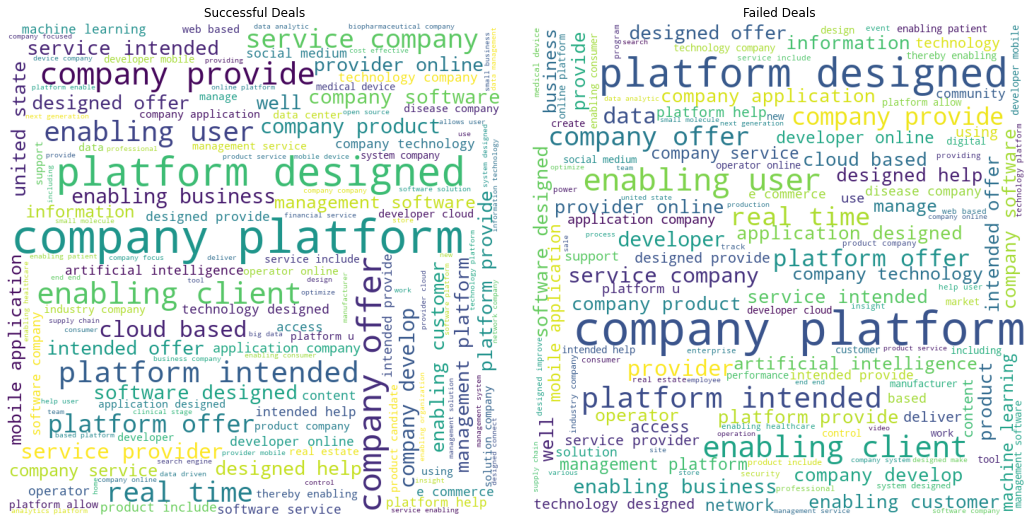

In [ ]:
plt.figure(figsize = (15, 20), facecolor = None)
plt.subplot(1,2,1)
plt.imshow(succ_cloud)
plt.title("Successful Deals")
plt.axis("off")
#plt.tight_layout(pad = 0)

#plt.figure(figsize = (8, 8), facecolor = None)
plt.subplot(1,2,2)
plt.imshow(fail_cloud)
plt.title("Failed Deals")
plt.axis("off")
plt.tight_layout(pad = 3)
plt.show()

#### Clustering on Description
- Clustering based on TF-IDF
- Assign cluster labels to the descriptions 
- Visualize the clustering in 2D (IPCA)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [ ]:
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
X_d = vectorizer.fit_transform(text_features['description'])

In [ ]:
X_d.shape

(69466, 13022)

In [ ]:
# Choose a cluster number: find the elbow
def find_k_plot(min_cluster, max_cluster, data):
  """
  Plot number of clusters vs. sum of squared distances
  """
  dist = []
  Ks = range(min_cluster, max_cluster+1)
  for k in Ks:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(data)
    dist.append(km.inertia_)
  plt.plot(Ks, dist)
  plt.xlabel('Number of Clusters')
  plt.ylabel('Sum of Squared Distances')
  plt.show()

In [ ]:
#find_k_plot(3, 15, X_d)

In [ ]:
k = 15
kmeans_desc = KMeans(n_clusters=k, init='k-means++')
kmeans_desc.fit(X_d)
text_features['describe_labels'] = kmeans_desc.labels_

In [ ]:
def get_top_keywords(vec_data, clusters, vectorizer, n):
    """
    vec_data: vectorized text data
    clusters: cluster labels corresponding to the vec_data
    vectorizer: tf-idf vectorizer
    n: number of words to return for each cluster
    returns the top n keywords for each centroid of the KMeans
    """
    df = pd.DataFrame(vec_data.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = vectorizer.get_feature_names_out() # access tf-idf terms
    cluster_map = {}
    for i,r in df.iterrows():
      
        print('\nCluster {}'.format(i))
        # for each row of the dataframe, find the n terms that have the highest tf idf score
        keywords = ','.join([terms[t] for t in np.argsort(r)[-n:]])
        print(keywords) 
        cluster_map[i] = keywords
    return cluster_map
            

In [ ]:
# out of ram
#cluster_map = get_top_keywords(X_d, text_features['describe_labels'], vectorizer, 10)

In [ ]:
# visualization
# use IPCA: more memory efficient 
# PCA has out of ram issue
from sklearn.decomposition import IncrementalPCA
ipca_d = IncrementalPCA(n_components=2, batch_size=200)
# let the fit function itself divide the data
vecs_d = ipca_d.fit_transform(X_d)

Text(0.5, 1.0, 'Clustering of Descriptions')

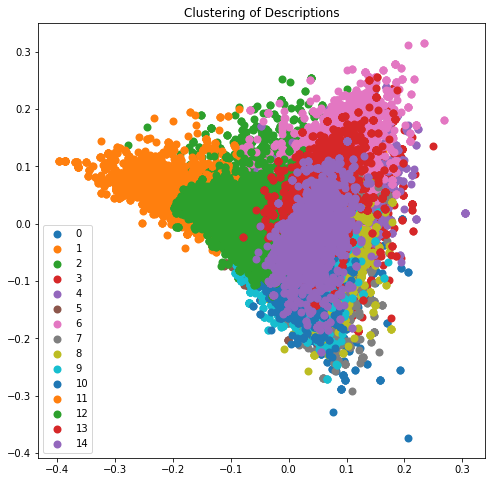

In [ ]:
y = text_features['describe_labels']
plt.figure(figsize=(8, 8))
for i , target_name in zip(list(range(k)), y):
  plt.scatter(vecs_d[y == i, 0],
              vecs_d[y == i, 1],
              lw = 2,
              label = i)
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("Clustering of Descriptions")
  

#### Clustering on Keywords
- Clustering based on TF-IDF (set as 20 clusters)
- Check the top keywords for each label: well clustered sub-industry 
- Assign cluster labels to each 'keywords' text
- Visualize the clusters in 2D (IPCA)

In [ ]:
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
X_k = vectorizer.fit_transform(text_features['keywords'])

In [ ]:
X_k.shape

(69466, 5569)

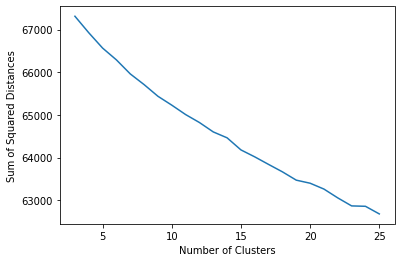

In [ ]:
find_k_plot(3, 25, X_k)

In [ ]:
k = 20
kmeans_kw = KMeans(n_clusters=k, random_state=42)
kmeans_kw.fit(X_k)
text_features['keywords_labels'] = kmeans_kw.labels_

In [ ]:
# different results each run
cluster_map = get_top_keywords(X_k, kmeans_kw.labels_, vectorizer, 5)


Cluster 0
analysis,software,platform,analytics,data

Cluster 1
digital,social,customer,platform,marketing

Cluster 2
platform,digital,social,medium,content

Cluster 3
web,platform,software,mobile,application

Cluster 4
platform,service,delivery,food,product

Cluster 5
processing,card,financial,platform,payment

Cluster 6
system,software,technology,service,platform

Cluster 7
audio,digital,streaming,platform,music

Cluster 8
service,optical,wireless,networking,network

Cluster 9
treatment,surgical,technology,medical,device

Cluster 10
protection,network,software,cyber,security

Cluster 11
service,marketplace,shopping,platform,online

Cluster 12
medical,patient,care,health,healthcare

Cluster 13
social,online,mobile,gaming,game

Cluster 14
disease,treatment,discovery,pharmaceutical,drug

Cluster 15
content,sharing,platform,streaming,video

Cluster 16
mobile,marketing,platform,medium,advertising

Cluster 17
software,wireless,messaging,service,communication

Cluster 18
therapeutic,therapy

In [ ]:
# visualization in 2d
from sklearn.decomposition import IncrementalPCA
ipca_k = IncrementalPCA(n_components=2, batch_size=200)
# let the fit function itself divide the data
vecs_k = ipca_k.fit_transform(X_k)

Text(0.5, 1.0, 'Clusters of Keywords')

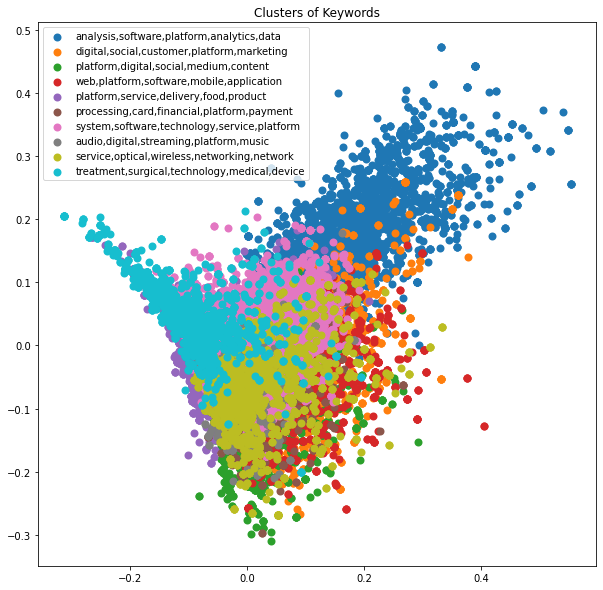

In [ ]:
# visualize 10 of the clusters
y = text_features['keywords_labels']
plt.figure(figsize=(10, 10))
for i in range(10):
  plt.scatter(vecs_k[y == i, 0],
              vecs_k[y == i, 1],
              lw = 2,
              label = cluster_map[i])
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("Clusters of Keywords")

#### Keyword & Description Length

In [ ]:
text_features['keyword_len'] = text_features.apply(lambda r: len(r.keywords), axis=1)
text_features['description_len'] = text_features.apply(lambda r: len(r.description), axis=1)

In [ ]:
# save text_features
path3 = '/content/drive/My Drive/text_features2.csv'
text_features.to_csv(path3)

In [ ]:
# load data
path3 = '/content/drive/My Drive/text_features2.csv'
text_features = pd.read_csv(path3, index_col=0)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Focus on Software
- distribution of success/fail
- success rate by deal type 2
- time length between two deals
- deal size change
- by deal type 2

In [ ]:
# labels that have 'software' as one of their top 5 keywords
software_sub = [l for l in list(text_features['keywords_labels'].unique()) if 'software' in cluster_map[l]]
len(software_sub)

6

In [ ]:
software_sub

[0, 13, 8, 1, 6, 10]

In [ ]:
sw_eda = text_features[text_features['keywords_labels'].isin(software_sub)]
sw_eda

companyid            companyname  dealno     dealid    dealdate  \
4      100037-26  Reflection Technology     1.0  40183-39T  1990-08-01   
5      100037-26  Reflection Technology     1.0  40183-39T  1990-08-01   
6      100038-25          SpectroVision     1.0  40266-91T  1987-09-01   
7      100038-25          SpectroVision     1.0  40266-91T  1987-09-01   
9      100039-24              ThreeCore     1.0  40276-99T  2001-02-15   
...          ...                    ...     ...        ...         ...   
69624   99990-37                Encepta     1.0  39947-86T  2014-01-01   
69625   99991-90           CardioMetrix     1.0  39956-95T  2006-01-04   
69626   99991-90           CardioMetrix     1.0  39956-95T  2006-01-04   
69627   99991-99            Alta Energy     1.0  39938-95T  2011-12-23   
69628   99999-73           RMH Sciences     2.0  47209-33T  2013-08-01   

       dealsize dealstatus dealsizestatus  raisedtodate  totalinvestedcapital  \
4      3.300000  Completed         Actual      3.300000              3.300000   
5      3.300000  Completed         Actual      3.300000              3.300000   
6      0.150000  Completed         Actual      0.150000              0.150000   
7      0.150000  Completed         Actual      0.150000              0.150000   
9      2.200000  Completed         Actual      2.200000              2.200000   
...         ...        ...            ...           ...                   ...   
69624       NaN  Completed            NaN           NaN                   NaN   
69625  2.750000  Completed         Actual      2.750000              2.750000   
69626  2.750000  Completed         Actual      2.750000              2.750000   
69627  1.132817  Completed         Actual      1.132817              1.132817   
69628  0.050000  Completed         Actual      0.550000              0.050000   

       ...    fundcountry                             preferredindustry  \
4      ...  United States               Healthcare Devices and Supplies   
5      ...  United States               Healthcare Devices and Supplies   
6      ...  United States   Pharmaceuticals and Biotechnology, Software   
7      ...  United States               Healthcare Devices and Supplies   
9      ...  United States                                      Software   
...    ...            ...                                           ...   
69624  ...         Canada  Healthcare, Information Technology, Software   
69625  ...  United States               Healthcare Devices and Supplies   
69626  ...  United States       Communications and Networking, Software   
69627  ...  United States                                      Software   
69628  ...  United States                                    Healthcare   

       preferredverticals months_between competitiveness investor_quality  \
4           Manufacturing           52.0             NaN         0.028221   
5                     NaN           52.0             NaN         0.005521   
6                     TMT            6.0             NaN         0.058282   
7           Manufacturing            6.0             NaN         0.028221   
9                     TMT           22.0             NaN         0.028221   
...                   ...            ...             ...              ...   
69624                 TMT            NaN             NaN         0.004294   
69625       Life Sciences            NaN             NaN         0.017178   
69626  Manufacturing, TMT            NaN             NaN         0.013497   
69627                 TMT            NaN             NaN         0.006748   
69628                 TMT            NaN             NaN         0.125767   

      describe_labels keywords_labels keyword_len description_len  
4                   3               0          42             125  
5                   3               0          42             125  
6                   3               0          41             158  
7                   3               0          

##### a) Distribution of success/fail

In [ ]:
status = pd.DataFrame(sw_eda['success'].value_counts()).reset_index()
fig = px.pie(status, values='success', names=['sucess','failure'],title='Success Distribution')
fig.show()

##### b) Time length between two deals

In [ ]:
sw_eda['months_between'].describe()

count    19110.000000
mean        16.324071
std         10.764186
min          1.000000
25%          8.000000
50%         14.000000
75%         22.000000
max         54.000000
Name: months_between, dtype: float64

In [ ]:
fig = go.Figure(data=[go.Histogram(x=sw_eda['months_between'], cumulative_enabled=True, histnorm='percent')]) 
fig.update_xaxes(title_text='Month Between')
fig.update_yaxes(title_text='Percentage')
fig.update_layout(title='Percentage of Deals by Time Between Two Deals')
fig.show()

##### c) Deal size change




In [ ]:
sw_dealsize_change = sw_eda[sw_eda['follow_dealsize'] != 'None']
sw_dealsize_change['sizechange'] = sw_dealsize_change['follow_dealsize'].astype('float')-sw_dealsize_change['dealsize']
sw_dealsize_change['sizechange'].describe()

<ipython-input-301-a895a4477ff6>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



count    15535.000000
mean         5.367038
std         32.386801
min      -1387.863200
25%         -0.250000
50%          2.600000
75%          7.999997
max        847.999997
Name: sizechange, dtype: float64

##### d) Success rate, number of deals, total/average deal amounts by
 - subindustry in Software
 - subindustry and deal type 2 

In [ ]:
sw_eda['top_keywords'] = sw_eda.apply(lambda x: cluster_map[x.keywords_labels],axis=1)

In [ ]:
sw_query1 = """
SELECT
  keywords_labels,
  top_keywords,
  100.0*SUM(success)/COUNT(*) AS 'success_rate(%)',
  COUNT(*) AS num_deals,
  SUM(dealsize) AS total_deal,
  AVG(dealsize) AS avg_deal
FROM sw_eda 
GROUP BY keywords_labels
ORDER BY 'success_rate(%)' DESC
"""
sw_check1 = mysql(sw_query1)
sw_check1

keywords_labels                                 top_keywords  \
0               13             social,online,mobile,gaming,game   
1               10   protection,network,software,cyber,security   
2                8  service,optical,wireless,networking,network   
3                6  system,software,technology,service,platform   
4                1   digital,social,customer,platform,marketing   
5                0    analysis,software,platform,analytics,data   

   success_rate(%)  num_deals     total_deal   avg_deal  
0        66.859997       6207   59593.352577  10.590608  
1        63.380282       2272   19596.132201   9.512686  
2        64.976959       1736   22771.808188  14.241281  
3        62.282298       3847   32013.102508   9.225678  
4        68.910256       2184   30168.678057  14.730800  
5        59.070890      26111  282115.570975  12.240349

In [ ]:
sw_query = """
SELECT
  keywords_labels,
  dealtype2,
  top_keywords,
  100.0*SUM(success)/COUNT(*) AS 'success_rate(%)',
  COUNT(*) AS num_deals,
  SUM(dealsize) AS total_deal,
  AVG(dealsize) AS avg_deal
FROM sw_eda 
GROUP BY keywords_labels, dealtype2
HAVING dealtype2 != 'None'
ORDER BY 'success_rate(%)' DESC
"""
sw_check = mysql(sw_query)
sw_check

keywords_labels              dealtype2  \
0                 0  Acquisition Financing   
1                 0     Angel (individual)   
2                 0       Recapitalization   
3                 0             Seed Round   
4                 0               Series A   
..              ...                    ...   
65               13               Series D   
66               13               Series E   
67               13               Series F   
68               13               Series G   
69               13               Series I   

                                 top_keywords  success_rate(%)  num_deals  \
0   analysis,software,platform,analytics,data        84.000000         25   
1   analysis,software,platform,analytics,data        49.152542         59   
2   analysis,software,platform,analytics,data        88.888889          9   
3   analysis,software,platform,analytics,data        48.399612       7217   
4   analysis,software,platform,analytics,data        53.452116       6735   
..                                        ...              ...        ...   
65           social,online,mobile,gaming,game        93.486590        261   
66           social,online,mobile,gaming,game        93.918919        148   
67           social,online,mobile,gaming,game       100.000000         94   
68           social,online,mobile,gaming,game        96.551724         29   
69           social,online,mobile,gaming,game       100.000000          2   

      total_deal   avg_deal  
0     743.435286  53.102520  
1      23.185075   0.493299  
2     578.710000  82.672857  
3   19458.662489   3.013110  
4   68380.526002  10.503921  
..           ...        ...  
65   5394.310287  21.405993  
66   3213.998796  22.165509  
67   6730.620303  75.624947  
68   1641.638924  58.629962  
69     26.000000  13.000000  

[70 rows x 7 columns]

### Location
- Look at total number of deals, total/average deal size, competitivenes by states
- visualize on an US map

In [ ]:
# get geospatial data
usmap = geopandas.read_file("https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json")

In [ ]:
deal_inv_fund_comp['hqstate_province'] = deal_inv_fund_comp['hqstate_province'].astype(str)

In [ ]:
deal_inv_fund_comp['hqstate_province'].isnull().sum()

0

In [ ]:
state_query = """
SELECT
  hqstate_province as state,
  COUNT(dealsize) AS deal_num,
  SUM(dealsize) AS total_deal_amt,
  AVG(dealsize) AS avg_deal_amt,
  AVG(competitiveness) AS avg_competitive
FROM deal_inv_fund_comp 
GROUP BY hqstate_province
HAVING hqstate_province != 'None'
ORDER BY total_deal_amt DESC
"""
state = mysql(state_query)
state

state  deal_num  total_deal_amt  avg_deal_amt  avg_competitive
0         California     27797   401174.223321     14.432285         1.570186
1      Massachusetts      5648    98252.000379     17.395892         1.506156
2           New York      6536    66022.671409     10.101388         1.377268
3              Texas      2368    29657.348239     12.524218         1.255019
4         Washington      2102    26570.175831     12.640426         1.682948
..               ...       ...             ...           ...              ...
82         CoyoacÃ¡n         1        0.276032      0.276032              NaN
83             Yukon         1        0.020000      0.020000              NaN
84  San Luis PotosÃ­         0             NaN           NaN         1.000000
85    Miguel Hidalgo         0             NaN           NaN              NaN
86                CP         0             NaN           NaN              NaN

[87 rows x 5 columns]

In [ ]:
state_dict = state.set_index('state').to_dict('index')

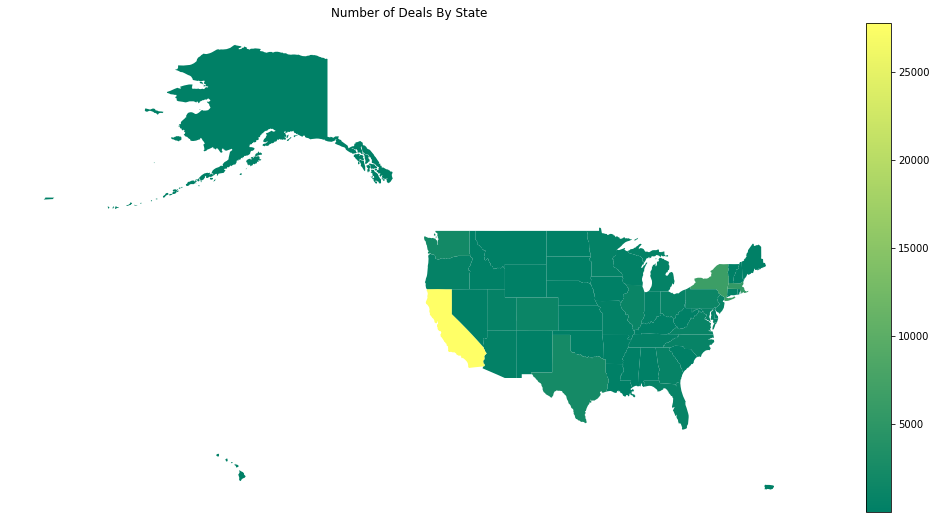

In [ ]:
usmap['deal_num'] = usmap['name'].apply(lambda x: state_dict.get(x).get('deal_num'))
usmap.plot(figsize=(20, 9), column='deal_num', legend=True, cmap='summer')

plt.axis('off')
plt.title('Number of Deals By State')
plt.show()

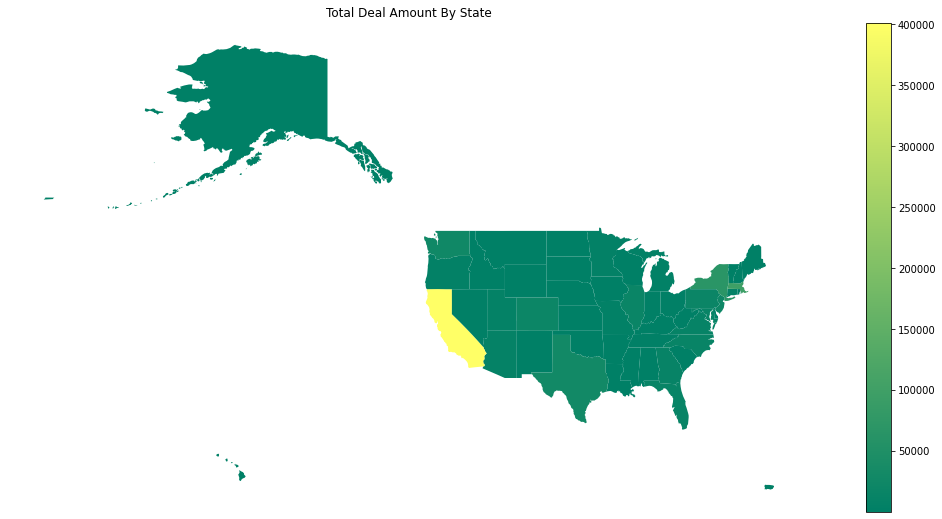

In [ ]:
usmap['total_deal_amt'] = usmap['name'].apply(lambda x: state_dict.get(x).get('total_deal_amt'))
usmap.plot(figsize=(20, 9), column='total_deal_amt', legend=True, cmap='summer')

plt.axis('off')
plt.title('Total Deal Amount By State')
plt.show()

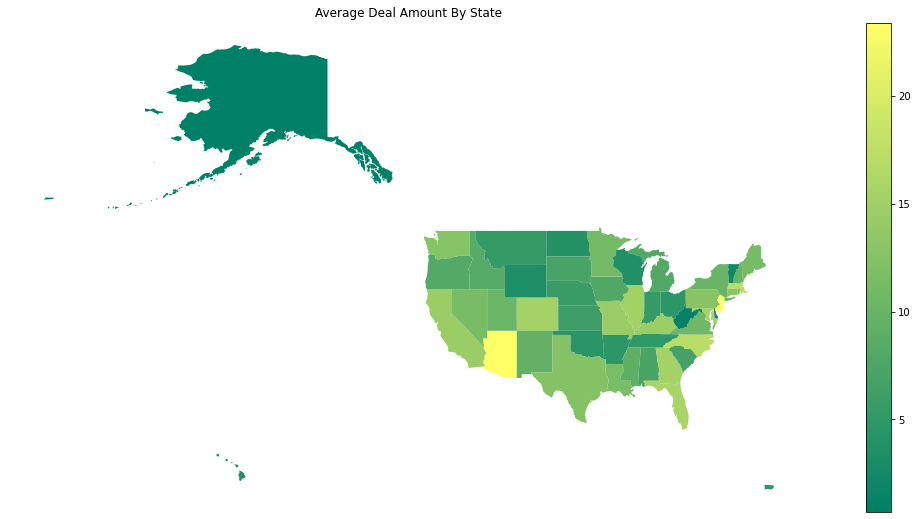

In [ ]:
usmap['avg_deal_amt'] = usmap['name'].apply(lambda x: state_dict.get(x).get('avg_deal_amt'))
usmap.plot(figsize=(20, 9), column='avg_deal_amt', legend=True, cmap='summer')

plt.axis('off')
plt.title('Average Deal Amount By State')
plt.show()

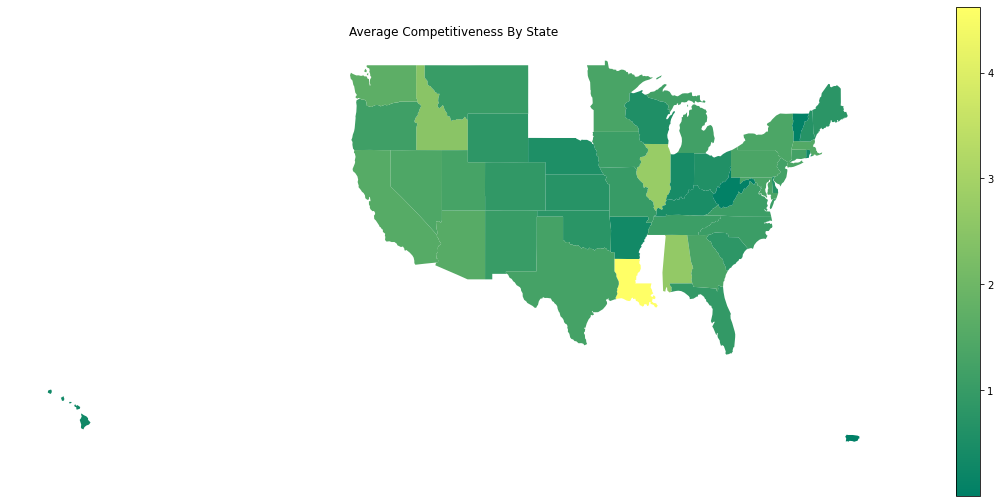

In [ ]:
usmap['avg_competitive'] = usmap['name'].apply(lambda x: state_dict.get(x).get('avg_competitive'))
usmap.plot(figsize=(20, 9), column='avg_competitive', legend=True, cmap='summer')

plt.axis('off')
plt.title('Average Competitiveness By State')
plt.show()

In [ ]:
# Sort by average deal amount
usmap[['name', 'deal_num', 'total_deal_amt', 'avg_deal_amt', 'avg_competitive']].sort_values(by=['avg_deal_amt'], ascending=False)

name  deal_num  total_deal_amt  avg_deal_amt  \
2                Arizona       345     8067.585480     23.384306   
30            New Jersey       968    22342.859275     23.081466   
21         Massachusetts      5648    98252.000379     17.395892   
33        North Carolina       788    13548.674829     17.193750   
9                Florida       804    12668.634004     15.757007   
20              Maryland       826    12875.405984     15.587659   
5               Colorado      1232    18921.726960     15.358545   
10               Georgia       757    11566.899243     15.279920   
13              Illinois      1140    17215.341818     15.101177   
17              Kentucky        98     1426.548498     14.556617   
4             California     27797   401174.223321     14.432285   
25              Missouri       241     3442.607155     14.284677   
6            Connecticut       499     6479.798194     12.985568   
38          Pennsylvania      1405    17957.116466     12.780866   
47            Washington      2102    26570.175831     12.640426   
43                 Texas      2368    29657.348239     12.524218   
18             Louisiana        54      628.933097     11.646909   
28                Nevada       144     1641.288539     11.397837   
39          Rhode Island        67      760.024539     11.343650   
19                 Maine        57      637.895024     11.191141   
23             Minnesota       468     5111.014011     10.920970   
46              Virginia       885     9468.288319     10.698631   
8   District of Columbia       222     2333.856839     10.512869   
44                  Utah       635     6478.931425     10.203042   
32              New York      6536    66022.671409     10.101388   
29         New Hampshire       170     1691.323451      9.948961   
31            New Mexico       102      962.896093      9.440158   
24           Mississippi        22      200.208402      9.100382   
12                 Idaho        46      383.514060      8.337262   
37                Oregon       632     5154.005367      8.155072   
22              Michigan       455     3637.657302      7.994851   
15                  Iowa        67      533.931610      7.969129   
0                Alabama        63      461.501126      7.325415   
41          South Dakota         5       35.281260      7.056252   
40        South Carolina        98      668.874977      6.825255   
16                Kansas        62      376.612010      6.074387   
27              Nebraska        49      285.876586      5.834216   
26               Montana        37      198.927605      5.376422   
14               Indiana       330     1769.260271      5.361395   
42             Tennessee       406     2045.796756      5.038908   
51           Puerto Rico         9       42.815000      4.757222   
3               Arkansas        33      156.534122      4.743458   
35                  Ohio       660     3070.793093      4.652717   
36              Oklahoma       102      445.550987      4.368147   
34          North Dakota         8       32.691870      4.086484   
11                Hawaii        22       82.318738      3.741761   
49             Wisconsin       261      963.187107      3.690372   
7               Delaware       319     1107.342575      3.471293   
50               Wyoming        34      113.752179      3.345652   
45               Vermont        51      120.052146      2.353964   
48         West Virginia        23       26.393250      1.147533   
1                 Alaska         4        2.895000      0.723750   

    avg_competitive  
2          1.580111  
30         1.227012  
21         1.506156  
33         1.073512  
9          0.935809  
20         1.331825  
5          0.905712  
10         1.352634  
13         2.757647  
17         0.480524  
4          1.570186  
25         1.001569  
6          1.223626  
38         1.360955  
47         1.682948  
43         1.255019  
18         4.622588  
28         1.422730

# Model
- Classification: predict on **'success'**
- Regression: predict on
  - **'months_between'**
  - **'follow_dealsize'**

## Preprocessing

### Drop Non-features
Drop columns that are not useful in model training section.

In [ ]:
text_features.shape[0]

69466

Check Deal Currency

In [ ]:
# check native currency of deal
text_features['nativecurrencyofdeal'].value_counts()

US Dollars (USD)                     68011
Canadian Dollars (CAD)                 843
Euros (EUR)                            232
Mexicano Peso (MXN)                    146
British Pounds (GBP)                   115
India Rupees (INR)                      19
Russian Ruble (RUB)                     10
Chinese Yuan RMB (CNY)                   9
Brazil Real (BRL)                        8
Norwegian Krone (NOK)                    7
Australian Dollars (AUD)                 7
Swiss Francs (CHF)                       6
Singapore Dollar (SGD)                   6
Japanese Yen (JPY)                       6
Israeli Shekels (ILS)                    6
Swedish Krona (SEK)                      5
Chilean Peso (CLP)                       3
Polish Zloty (PLN)                       3
Danish Kroner (DKK)                      3
Philippine Peso (PHP)                    2
Moroccan dirham (MAD)                    2
Zimbabwe Dollar (ZWN)                    2
South-Korean Won (KRW)                   2
Nigerian na

In [ ]:
# only a few rows of deals are in foreign currency
# drop deals in foreign currency
text_features = text_features[text_features['nativecurrencyofdeal']=='US Dollars (USD)']

In [ ]:
pred_cols = ['success', 'months_between', 'follow_dealsize']

In [ ]:
# columns to drop
# business status shows current status, which shouldn't be used
cols_drop = ['companyid', 'companyname','dealid','competitiveness', 
        'linkedinprofileurl', 'employees', 'firstfinancingsizestatus', 
        'firstfinancingsize', 'preferredindustry', 'hqlocation', 
        'hqaddressline1', 'hqcity', 'hqpostcode', 'hqcountry', 
        'hqglobalregion', 'hqglobalsubregion', 'investorid', 
        'investorfundid', 'investorfundname', 'investorwebsite', 'fundid'
        'dealsynopsis', 'nativecurrencyofdeal', 'businessstatus','sitelocation',
        'ceopbid', 'ceo','ceobiography', 'lastupdated','follow_dealid', 
        'description', 'keywords','website', 'investorname', 'fundid',
        'closedate','domiciles','fundlocation','fundcity','dealsy', 
        'dealsynopsis','ownershipstatus','lastupdated','preferredverticals']
# for other columns with missing values, drop rows with missing values
remain_cols = [c for c in text_features.columns if c not in cols_drop]
feat_cols = [c for c in remain_cols if c not in pred_cols]

In [ ]:
train = text_features[remain_cols]
train

dealno    dealdate  dealsize dealstatus dealsizestatus  raisedtodate  \
0         1.0  2012-12-03  0.800000  Completed         Actual      0.800000   
1         1.0  2015-04-09  2.200000  Completed         Actual      2.200000   
2         1.0  2015-04-09  2.200000  Completed         Actual      2.200000   
3         1.0  2015-04-09  2.200000  Completed         Actual      2.200000   
4         1.0  1990-08-01  3.300000  Completed         Actual      3.300000   
...       ...         ...       ...        ...            ...           ...   
69623     1.0  2001-01-01       NaN  Completed            NaN           NaN   
69625     1.0  2006-01-04  2.750000  Completed         Actual      2.750000   
69626     1.0  2006-01-04  2.750000  Completed         Actual      2.750000   
69627     1.0  2011-12-23  1.132817  Completed         Actual      1.132817   
69628     2.0  2013-08-01  0.050000  Completed         Actual      0.550000   

       totalinvestedcapital        dealtype   dealtype2        dealclass  ...  \
0                  0.800000      Seed Round  Seed Round  Venture Capital  ...   
1                  2.200000      Seed Round  Seed Round  Venture Capital  ...   
2                  2.200000      Seed Round  Seed Round  Venture Capital  ...   
3                  2.200000      Seed Round  Seed Round  Venture Capital  ...   
4                  3.300000  Early Stage VC        None  Venture Capital  ...   
...                     ...             ...         ...              ...  ...   
69623                   NaN  Early Stage VC        None  Venture Capital  ...   
69625              2.750000  Later Stage VC    Series A  Venture Capital  ...   
69626              2.750000  Later Stage VC    Series A  Venture Capital  ...   
69627              1.132817  Early Stage VC    Series A  Venture Capital  ...   
69628              0.050000  Early Stage VC        None  Venture Capital  ...   

      fundsizegroup           fundtype  fundstate_province     fundcountry  \
0           0 - 99M  Venture - General            Illinois   United States   
1           0 - 99M  Venture - General             England  United Kingdom   
2           0 - 99M  Venture - General            New York   United States   
3           0 - 99M  Venture - General            New York   United States   
4           0 - 99M  Venture - General       Massachusetts   United States   
...             ...                ...                 ...             ...   
69623       0 - 99M  Venture - General            Virginia   United States   
69625       0 - 99M  Venture - General           Minnesota   United States   
69626       0 - 99M  Venture - General            Michigan   United States   
69627   100M - 249M  Venture - General          California   United States   
69628       0 - 99M  Venture - General        Pennsylvania   United States   

       months_between investor_quality  describe_labels keywords_labels  \
0                24.0         0.009816               12              16   
1                11.0         0.004908                7              12   
2                11.0         0.065031                7              12   
3                11.0         0.020245                7              12   
4                52.0         0.028221                3               6   
...               ...              ...              ...             ...   
69623             NaN         0.003067               11              19   
69625             NaN         0.017178                3               6   
69626             NaN         0.013497                3               6   
69627             NaN         0.006748               14               6   
69628             NaN         0.125767                5               6   

      keyword_len description_len  
0             134             248  
1             152             334  
2             152             334  
3             152             334  
4              42             125  
...           ...             .

In [ ]:
# check missing values
pd.DataFrame(train.isnull().sum()).sort_values(by=0,ascending=False).head(20)

0
months_between           37736
dealsizestatus            6957
totalinvestedcapital      6609
dealsize                  6564
fundsize                  6401
fundsizegroup             6401
raisedtodate              5784
fundstate_province        4412
follow_dealsize           3322
totalraised               3186
vintage                   2052
yearfounded               1663
hqstate_province           242
fundcountry                 46
investors                    9
financingstatus              3
firstfinancingdealclass      1
dealclass                    1
investor_quality             0
fundtype                     0

In [ ]:
# drop rows with missing values
train = train.dropna(subset=feat_cols)
train.isnull().sum()

dealno                         0
dealdate                       0
dealsize                       0
dealstatus                     0
dealsizestatus                 0
raisedtodate                   0
totalinvestedcapital           0
dealtype                       0
dealtype2                      0
dealclass                      0
addon                          0
financingstatus                0
investors                      0
follow_dealsize             1914
totalraised                    0
universe                       0
yearfounded                    0
primaryindustrysector          0
primaryindustrygroup           0
primaryindustrycode            0
hqstate_province               0
firstfinancingdate             0
firstfinancingdealtype         0
firstfinancingdealclass        0
firstfinancingstatus           0
success                        0
investorstatus                 0
isleadinvestor                 0
fundno                         0
vintage                        0
fundstatus

### Convert Data Types

Date features

In [ ]:
# convert to datetime
train['dealdate'] = pd.to_datetime(train['dealdate'])
# extract features from dealdate
train['dealdate_year'] = train['dealdate'].dt.year
train['dealdate_month'] = train['dealdate'].dt.month
train['dealdate_week'] = train['dealdate'].dt.week

<ipython-input-13-dd1d4befeb53>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['dealdate'] = pd.to_datetime(train['dealdate'])
<ipython-input-13-dd1d4befeb53>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['dealdate_year'] = train['dealdate'].dt.year
<ipython-input-13-dd1d4befeb53>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

In [ ]:
# first financing date
train['firstfinancingdate'] = pd.to_datetime(train['firstfinancingdate'])
train['firstfinancing_year'] = train['firstfinancingdate'].dt.year
train['firstfinancing_month'] = train['firstfinancingdate'].dt.month

<ipython-input-14-137115ee2948>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['firstfinancingdate'] = pd.to_datetime(train['firstfinancingdate'])
<ipython-input-14-137115ee2948>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['firstfinancing_year'] = train['firstfinancingdate'].dt.year
<ipython-input-14-137115ee2948>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [ ]:
# drop dealdate
train = train.drop(['dealdate','firstfinancingdate'],axis=1)

In [ ]:
# fundno
import re
def extract_avg_number(s):
  """
  Return a list of all numbers in string s 
  """
  return np.mean([int(c) for c in re.findall(r'\b\d+\b', s)])

train['fundno'] = train.apply(lambda x: extract_avg_number(x.fundno), axis=1)

In [ ]:
# Categorical features
# to do one-hot encoding
cat_feat = ['dealtype','dealclass','isleadinvestor', 'fundcategory','sbicfund',
         'fundtype']
# to do label encoding
lab_feat = ['fundsizegroup','dealtype2','dealstatus','fundstatus','hqstate_province','fundstate_province', 
      'fundcountry', 'dealsizestatus','addon','financingstatus',
      'universe','firstfinancingdealtype','firstfinancingdealclass',
      'firstfinancingstatus', 'investorstatus','primaryindustrysector','primaryindustrygroup', 
       'primaryindustrycode']

# Numerical feaetures
# to scale
num_feat = ['dealno','dealsize','raisetodate','totalinvestedcapital',
         'dealtype','dealclass','dealdate_year','dealdate_month',
         'dealdate_week', 'fundno','vintage','fundinvestments','fundsize',
         'keyword_len','description_len','dealdate_year','dealdate_month','dealdate_week']

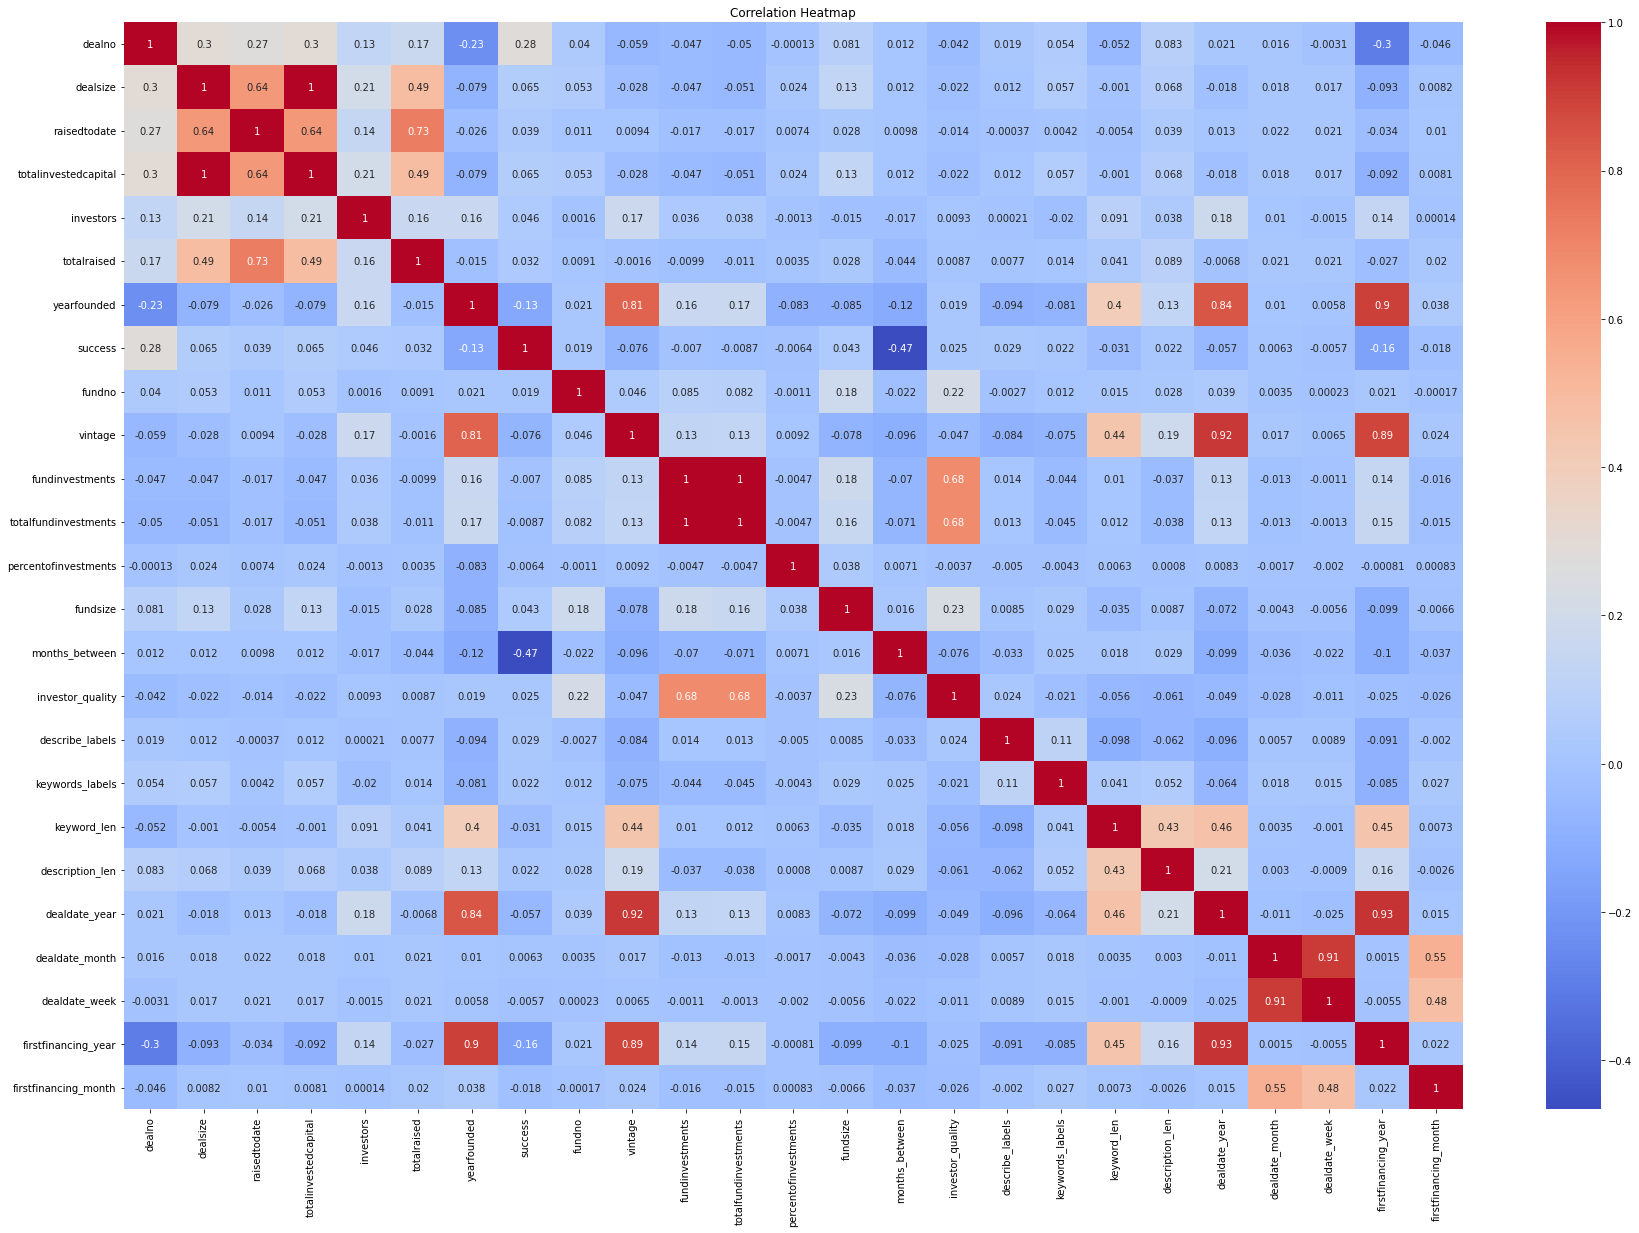

In [ ]:
# check correlation
plt.figure(figsize = (30,20))
sns.heatmap(train.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# drop columns with high correlations
train = train.drop(['yearfounded','vintage','dealdate_week','firstfinancing_year','totalfundinvestments'], axis=1)

In [ ]:
print("The training dataset now contains {} rows and {} columns.".format(train.shape[0], train.shape[1]))

The training dataset now contains 49787 rows and 45 columns.


### Convert Caegorical Features

In [ ]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
for f in lab_feat:
  train[f] = LabelEncoder().fit_transform(train[f])

# One-hot encoding
labeled_train = pd.get_dummies(train, columns = cat_feat, prefix=cat_feat)
labeled_train.head(5)

dealno  dealsize  dealstatus  dealsizestatus  raisedtodate  \
0     1.0      0.80           0               0          0.80   
1     1.0      2.20           0               0          2.20   
2     1.0      2.20           0               0          2.20   
3     1.0      2.20           0               0          2.20   
6     1.0      0.15           0               0          0.15   

   totalinvestedcapital  dealtype2  addon  financingstatus  investors  ...  \
0                  0.80          4      0                8        5.0  ...   
1                  2.20          4      0                8        7.0  ...   
2                  2.20          4      0                8        7.0  ...   
3                  2.20          4      0                8        7.0  ...   
6                  0.15          2      0                8        2.0  ...   

  fundtype_Real Estate Debt  fundtype_Real Estate Distressed  \
0                         0                                0   
1                         0                                0   
2                         0                                0   
3                         0                                0   
6                         0                                0   

   fundtype_Real Estate Opportunistic  fundtype_Real Estate Value Added  \
0                                   0                                 0   
1                                   0                                 0   
2                                   0                                 0   
3                                   0                                 0   
6                                   0                                 0   

   fundtype_Restructuring/Turnaround  fundtype_Secondaries  \
0                                  0                     0   
1                                  0                     0   
2                                  0                     0   
3                                  0                     0   
6                                  0                     0   

   fundtype_Venture - General  fundtype_Venture Capital - Early Stage  \
0                           1                                       0   
1                           1                                       0   
2                           1                                       0   
3                           1                                       0   
6                           1                                       0   

   fundtype_Venture Capital - Later Stage  fundtype_Venture Debt  
0                                       0                      0  
1                                       0                      0  
2                                       0                      0  
3                                       0                      0  
6                                       0                      0  

[5 rows x 102 columns]

### Train-Test Split & Resampling

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

# split the features and predictions
feat_cols = [c for c in labeled_train.columns if c not in pred_cols]
features = labeled_train[feat_cols]
success = labeled_train['success']
follow_dealsize = labeled_train['follow_dealsize']
months_between = labeled_train['months_between']

# The two class labels can be considered balanced after redefining success
# oversample
#print("The count before oversampling: {}".format(Counter(success)))
#features_rs, success_rs = SMOTE(sampling_strategy=1).fit_resample(features, success)
#print("The count after oversampling: {}".format(Counter(success_rs)))

# split train/test set for success status
x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(features, success, test_size=0.2, random_state=42)

### PCA: Reduce feature dimension

The first 49 principal components explains over 80% of the variance.


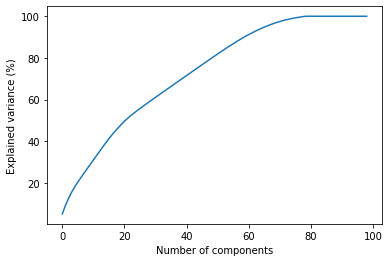

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Apply standardization
ss = StandardScaler().fit(x_train_s)
x_train_ssc = np.nan_to_num(ss.transform(x_train_s),1.0)
x_test_ssc = np.nan_to_num(ss.transform(x_test_s), 1.0)

# Apply PCA
pca = PCA().fit(x_train_ssc)
x_train_s_pca = pca.transform(x_train_ssc)
x_test_s_pca = pca.transform(x_test_ssc)

# Print explained variances in percentage
#print("Explained variances in percentage:")
#print(pca.explained_variance_ratio_*100)
#print()

# Plot cumulative explained
cumsum = np.cumsum(pca.explained_variance_ratio_*100)
n_comp = next((i for i in range(len(cumsum)) if cumsum[i] > 80))
print("The first {} principal components explains over 80% of the variance.".format(n_comp))
plt.plot(np.cumsum(pca.explained_variance_ratio_*100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")
plt.show()

In [ ]:
pca = PCA(n_components=n_comp).fit(x_train_ssc)
x_train_s_pca = pca.transform(x_train_ssc)
x_test_s_pca = pca.transform(x_test_ssc)

In [ ]:
print("Shape of training data before applying PCA: ", x_train_s.shape)
print("Shape of training data after applying PCA: ", x_train_s_pca.shape)

Shape of training data before applying PCA:  (39829, 99)
Shape of training data after applying PCA:  (39829, 49)


## Classification: Predict the next deal's success

Summary:
- PCA transformed data
  - reduce 99 features to 49
  - advantages: reduce multicolinearity and computational complexity
  - disadvantages: features are reconstructed and hence can't be interpreted; lose some information
  - **model performance** (accuracy)
    - SVM: training: 65.75% | test: 64.21% 
    - RF: training: 68.2% | test: 70%
- Original data:
  - **model performance** (accuracy)
    - AdaBoost: training: 69.56% | test: 69%
    - NN: training: 75.24% | test: 71% 
    - RF: training: 81.13% | test: 84%



(For previous definition of success

- deal **success**: 
    - for each past deal, there exists a following round of completed deal; 
    - or for the most recent deal, the company isn't out of business, and it has not been more than 36 months since the last deal date
  - deal **failure**:
    - for a most recent deal, there hasn't been a successful next round of deal for over 36 months


Model Performance Summary:
- PCA transformed data
  - advantages: reduce multicolinearity and computational complexity
  - disadvantages: features are reconstructed and hence can't be interpreted; lose some information
  - **model performance** (accuracy)
    - SVM: training: 89.87% | test: 89.87%  
    - RF: training: 92.84% | test: 94%
    - AdaBoost: training: 85.79% | test: 86%
- Original data:
  - **model performance** (accuracy)
    - NN: training: 94.67% | test: 94% 
    - RF: training: 97.51% | test: 98%
)

### Support Vector Classification
See below for: 
- train & test accuracy
- confusion matrix 
- precision/recall, F1 score
- test data samples: check n random samples in test dataset containing:
  - feature values
  - true label
  - prediction
  - probability of success/fail

In [ ]:
# SVM
from sklearn.svm import SVC
# Building a Support Vector Machine on train data
svc = SVC(C=1.0, kernel='rbf', probability=True)
svc.fit(x_train_s_pca, y_train_s)
 
prediction = svc.predict(x_test_s_pca)
# check the accuracy on the training and test set
print("The training accuracy is {}".format(svc.score(x_train_s_pca, y_train_s)))
print("The test accuracy is {}".format(svc.score(x_test_s_pca, y_test_s)))


The training accuracy is 0.6575359662557433
The test accuracy is 0.6420968065876682


SVM:\
The training accuracy is 0.6575359662557433\
The test accuracy is 0.6420968065876682

In [ ]:
test_prob = svc.predict_proba(x_test_s_pca)
test_prob

array([[0.56168617, 0.43831383],
       [0.31846188, 0.68153812],
       [0.60780506, 0.39219494],
       ...,
       [0.33820559, 0.66179441],
       [0.2894616 , 0.7105384 ],
       [0.28729328, 0.71270672]])

In [ ]:
def get_sample(n, x_test, y_test, pred, prob):
  """
  For classification:
  Return n random samples in test data with true labels, predictions, and probabilities

  For regression: 
  prob = []]
  """
  # join on index
  test = x_test.join(y_test)
  test['prediction'] = pred
  if len(prob)>0:
    test['prob_fail'] = prob[:,0]
    test['prob_success'] = prob[:,1]
  display(test.sample(n=n))

Test Data Sample

In [ ]:
get_sample(5, x_test_s, y_test_s, prediction, test_prob)

dealno  dealsize  dealstatus  dealsizestatus  raisedtodate  \
27417     1.0  1.500000           0               0      1.500000   
28255     1.0  1.974998           0               0      1.974998   
473       1.0  1.200000           0               0      1.200000   
26556     1.0  0.725000           0               0      0.725000   
3922      1.0  4.026849           0               0      4.026849   

       totalinvestedcapital  dealtype2  addon  financingstatus  investors  \
27417              1.500000          4      0                8        3.0   
28255              1.974998          5      0                8        1.0   
473                1.200000          4      0                8       14.0   
26556              0.725000          2      0                8        2.0   
3922               4.026849          4      0                8        5.0   

       ...  fundtype_Restructuring/Turnaround  fundtype_Secondaries  \
27417  ...                                  0                     0   
28255  ...                                  0                     0   
473    ...                                  0                     0   
26556  ...                                  0                     0   
3922   ...                                  0                     0   

       fundtype_Venture - General  fundtype_Venture Capital - Early Stage  \
27417                           1                                       0   
28255                           1                                       0   
473                             1                                       0   
26556                           1                                       0   
3922                            0                                       1   

       fundtype_Venture Capital - Later Stage  fundtype_Venture Debt  success  \
27417                                       0                      0        1   
28255                                       0                      0        0   
473                                         0                      0        0   
26556                                       0                      0        1   
3922                                        0                      0        1   

       prediction  prob_fail  prob_success  
27417           0   0.658894      0.341106  
28255           1   0.445627      0.554373  
473             1   0.368249      0.631751  
26556           1   0.414943      0.585057  
3922            1   0.366997      0.633003  

[5 rows x 103 columns]

### Random Forest Classification
See below for:
- Classification on PCA transformed data
  - train/test accuracy
  - precision/recall, F1 score

- Classification on original data
  - train/test accuracy
  - precision/recall, F1 score
  - feature importance: check top n important features
  - test data samples: check n random samples in test dataset containing:
    - feature values
    - true label
    - prediction
    - probability of success/fail

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameters and use grid search cross validation to find 
# the best set of paramter for random forest classifier
params = {
    "n_estimators": [50, 100, 200],
    "max_depth": [80, 160, 320]
}
rf_gs = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params, n_jobs=-1, cv=3).fit(x_train_s_pca, y_train_s)

print("The best parameters are {}".format(rf_gs.best_params_))
print("The training accuracy of the best parameters is {}".format(rf_gs.best_score_))

The best parameters are {'max_depth': 320, 'n_estimators': 200}
The training accuracy of the best parameters is 0.682040783579076


The best parameters are {'max_depth': 80, 'n_estimators': 200}\
The training accuracy of the best parameters is 0.9283900943622166

Confusion Matrix



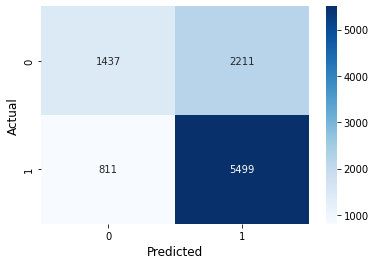


Classification Metrics

              precision    recall  f1-score   support

           0       0.64      0.39      0.49      3648
           1       0.71      0.87      0.78      6310

    accuracy                           0.70      9958
   macro avg       0.68      0.63      0.64      9958
weighted avg       0.69      0.70      0.68      9958



In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_pred = rf_gs.best_estimator_.predict(x_test_s_pca)

# Calculate and plot confusion matrix
rf_matrix = confusion_matrix(y_test_s, y_pred)

print("Confusion Matrix\n")
sns.heatmap(rf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual',fontsize=12)
plt.show()

# Report classification metrics
rf_report = classification_report(y_test_s, y_pred)

print("\nClassification Metrics\n")
print(rf_report)

Random Forest can handle high dimensional data, and it's scale invariant. Let's try with original data with 101 features. 

In [ ]:
# on the original data (without scaling or PCA)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameters and use grid search cross validation to find 
# the best set of paramter for random forest classifier
params = {
    "n_estimators": [50, 100, 200],
    "max_depth": [80, 160, 320]
}
rf2_gs = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params, n_jobs=-1, cv=3).fit(x_train_s, y_train_s)

print("The best parameters are {}".format(rf2_gs.best_params_))
print("The training accuracy of the best parameters is {}".format(rf2_gs.best_score_))

The best parameters are {'max_depth': 320, 'n_estimators': 200}
The training accuracy of the best parameters is 0.8112681604787761


Confusion Matrix



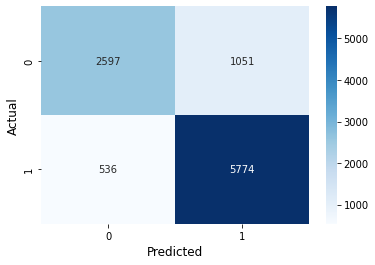


Classification Metrics

              precision    recall  f1-score   support

           0       0.83      0.71      0.77      3648
           1       0.85      0.92      0.88      6310

    accuracy                           0.84      9958
   macro avg       0.84      0.81      0.82      9958
weighted avg       0.84      0.84      0.84      9958



In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_pred = rf2_gs.best_estimator_.predict(x_test_s)

# Calculate and plot confusion matrix
rf_matrix = confusion_matrix(y_test_s, y_pred)

print("Confusion Matrix\n")
sns.heatmap(rf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual',fontsize=12)
plt.show()

# Report classification metrics
rf2_report = classification_report(y_test_s, y_pred)

print("\nClassification Metrics\n")
print(rf2_report)

One good thing about using original features versus transformed ones is that we can check feature importances. 


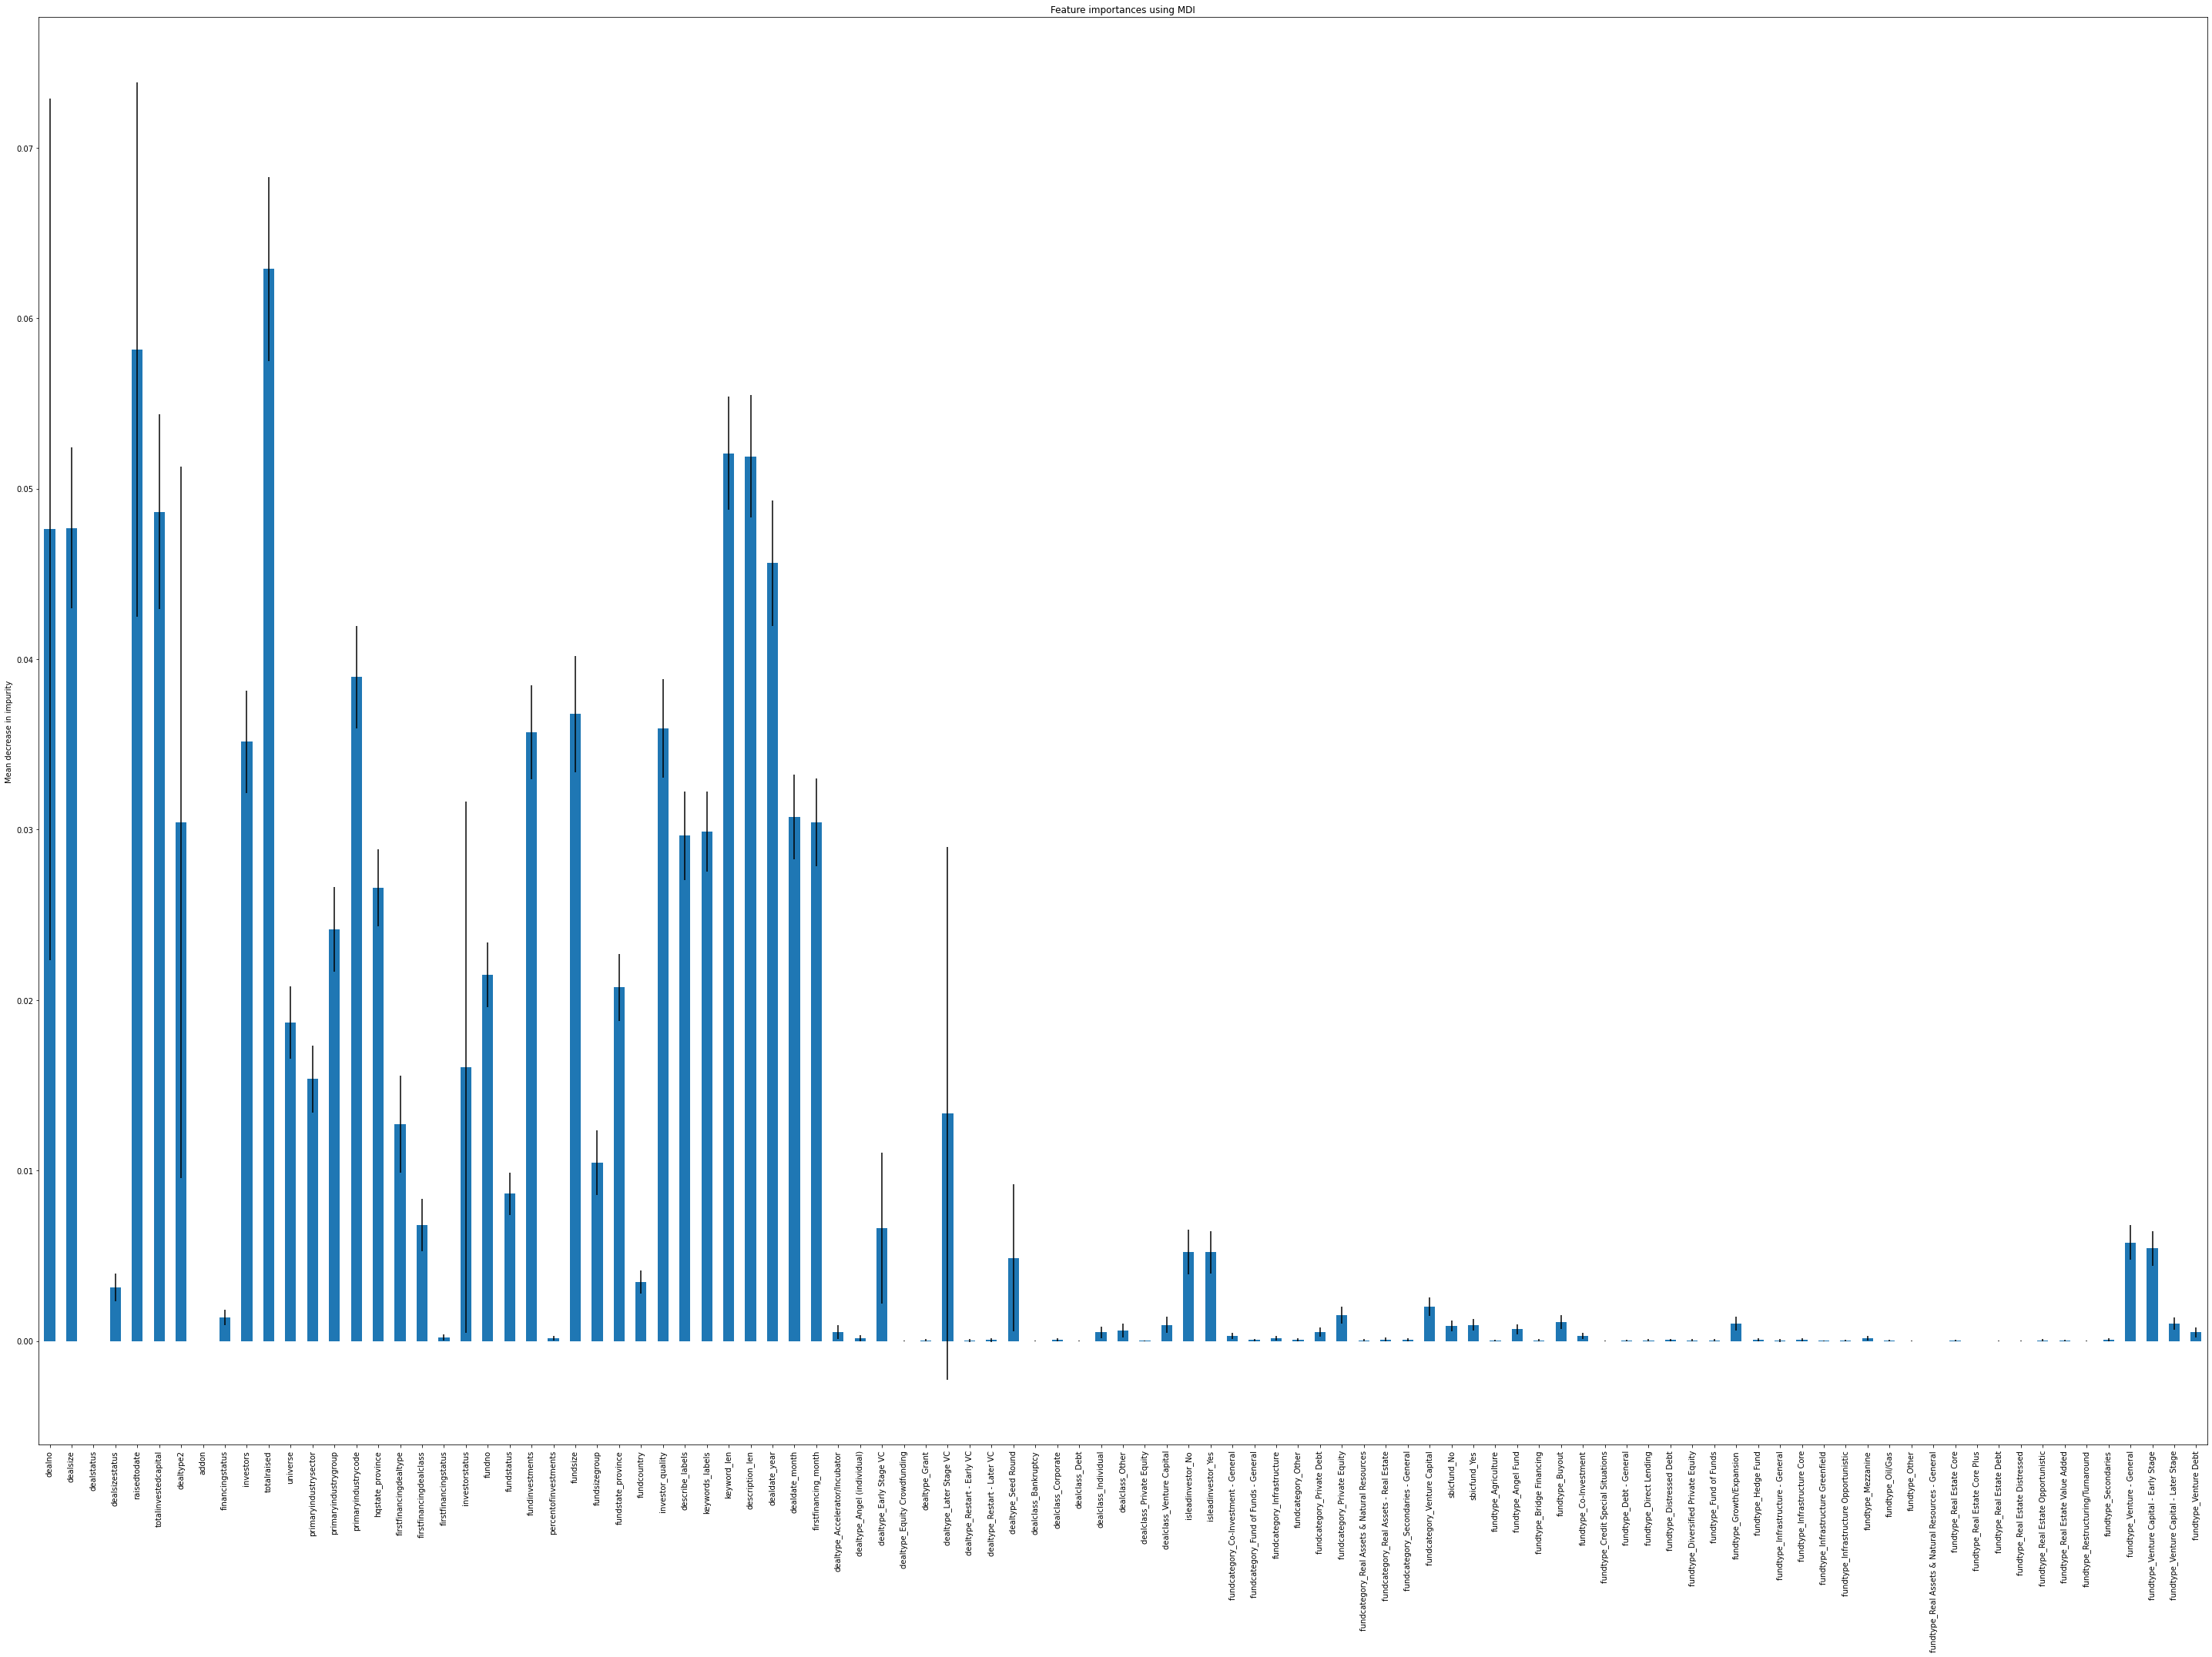

In [ ]:
importances = rf2_gs.best_estimator_.feature_importances_
# calculate standard deviation of feature importances
std = np.std([tree.feature_importances_ for tree in rf2_gs.best_estimator_.estimators_], axis=0)
forest_importances = pd.Series(importances, index=x_train_s.columns)

fig, ax = plt.subplots(figsize=(40,30))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
# Check top n important features 
def check_top(importances, x_train, n):
  """
  Plot top n feature with feature importance
  and return a dataframe with the data
  """
  importance_df = pd.DataFrame(importances, columns=['importance'])
  importance_df['feature'] = x_train.columns
  top = importance_df.sort_values(by=['importance'],ascending=False).head(n)
  display(top)

  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=top['importance'], y=top['feature'])
  #Add chart labels
  plt.title('Random Forest Feature Importance in MDI')
  plt.xlabel('Feature Importance')
  plt.ylabel('Features')


importance               feature
10    0.062882           totalraised
4     0.058159          raisedtodate
31    0.052079           keyword_len
32    0.051898       description_len
5     0.048642  totalinvestedcapital
1     0.047689              dealsize
0     0.047626                dealno
33    0.045633         dealdate_year
14    0.038943   primaryindustrycode
24    0.036775              fundsize
28    0.035931      investor_quality
22    0.035718       fundinvestments
9     0.035147             investors
34    0.030737        dealdate_month
35    0.030430  firstfinancing_month
6     0.030429             dealtype2
30    0.029886       keywords_labels
29    0.029643       describe_labels
15    0.026596      hqstate_province
13    0.024153  primaryindustrygroup

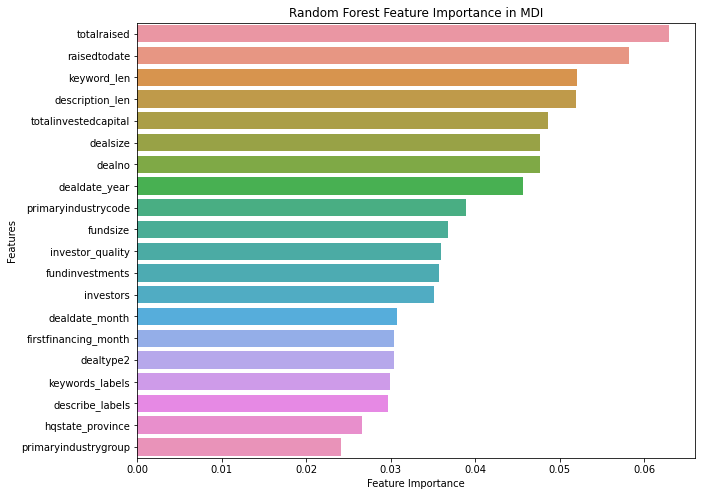

In [ ]:
check_top(importances, x_train_s, 20)

The above feature importance is calculated as:
- Gini Importance or Mean Decrease in Impurity (MDI) calculates each feature importance as the sum over the number of splits (across all tress) that include the feature, proportionally to the number of samples it splits.
- Not as explicit as coefficients in linear regression.

In [ ]:
test_prob = rf2_gs.best_estimator_.predict_proba(x_test_s)
test_prob

array([[0.61 , 0.39 ],
       [0.23 , 0.77 ],
       [0.835, 0.165],
       ...,
       [0.205, 0.795],
       [0.17 , 0.83 ],
       [0.095, 0.905]])

In [ ]:
get_sample(5, x_test_s, y_test_s, y_pred, test_prob)

dealno   dealsize  dealstatus  dealsizestatus  raisedtodate  \
15321     1.0   4.000000           0               0      4.000000   
34388     1.0   3.000000           0               1      3.000000   
1473      1.0   3.999991           0               0      3.999991   
30136     1.0   1.300000           0               0      1.300000   
33662     6.0  20.016000           0               0    161.156000   

       totalinvestedcapital  dealtype2  addon  financingstatus  investors  \
15321              4.000000          4      0                8        2.0   
34388              3.000000          5      0                8        1.0   
1473               3.999991          5      0                8        1.0   
30136              1.300000          4      0                8        7.0   
33662             20.016000          5      0                8        5.0   

       ...  fundtype_Restructuring/Turnaround  fundtype_Secondaries  \
15321  ...                                  0                     0   
34388  ...                                  0                     0   
1473   ...                                  0                     0   
30136  ...                                  0                     0   
33662  ...                                  0                     0   

       fundtype_Venture - General  fundtype_Venture Capital - Early Stage  \
15321                           1                                       0   
34388                           0                                       1   
1473                            0                                       1   
30136                           1                                       0   
33662                           1                                       0   

       fundtype_Venture Capital - Later Stage  fundtype_Venture Debt  success  \
15321                                       0                      0        1   
34388                                       0                      0        1   
1473                                        0                      0        0   
30136                                       0                      0        1   
33662                                       0                      0        0   

       prediction  prob_fail  prob_success  
15321           1      0.205         0.795  
34388           1      0.460         0.540  
1473            0      0.500         0.500  
30136           1      0.290         0.710  
33662           1      0.430         0.570  

[5 rows x 103 columns]

### AdaBoost Classification
- train/test accuracy
- precision/recall, F1 score

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
params = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 1]
}
abc_gs = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=params, n_jobs=-1, cv=3).fit(x_train_s, y_train_s)

print("The best parameters are {}".format(abc_gs.best_params_))
print("The training accuracy of the best parameters is {}".format(abc_gs.best_score_))

The best parameters are {'learning_rate': 1, 'n_estimators': 200}
The training accuracy of the best parameters is 0.695648957913772


AdaBoost:\
The best parameters are {'learning_rate': 1, 'n_estimators': 200}\
The training accuracy of the best parameters is 0.695648957913772

Confusion Matrix



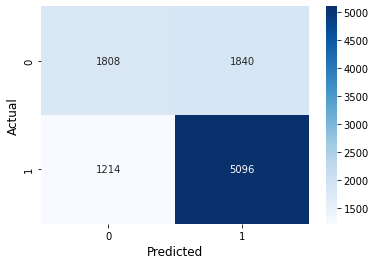


Classification Metrics

              precision    recall  f1-score   support

           0       0.60      0.50      0.54      3648
           1       0.73      0.81      0.77      6310

    accuracy                           0.69      9958
   macro avg       0.67      0.65      0.66      9958
weighted avg       0.68      0.69      0.69      9958



In [ ]:
y_pred = abc_gs.best_estimator_.predict(x_test_s)

# Calculate and plot confusion matrix
rf_matrix = confusion_matrix(y_test_s, y_pred)

print("Confusion Matrix\n")
sns.heatmap(rf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual',fontsize=12)
plt.show()

# Report classification metrics
rf_report = classification_report(y_test_s, y_pred)

print("\nClassification Metrics\n")
print(rf_report)

### MLP
- train/test accuracy
- precision/recall, F1 score
- plot: loss & accuracy vs. training epochs
- test data samples: check n random samples in test dataset containing:
    - feature values
    - true label
    - prediction
    - probability of success/fail

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
from torch.utils.data import Dataset, DataLoader
class Data(Dataset):
  def __init__(self, X_train, y_train):
    # need to convert float64 to float32 else 
    # will get the following error
    # RuntimeError: expected scalar type Double but found Float
    self.X = torch.from_numpy(X_train.astype(np.float32))
    # need to convert float64 to Long else 
    # will get the following error
    # RuntimeError: expected scalar type Long but found Float
    self.y = torch.from_numpy(y_train).type(torch.LongTensor)
    self.len = self.X.shape[0]
  
  def __getitem__(self, index):
    return self.X[index], self.y[index]
  def __len__(self):
    return self.len

In [ ]:
class BinaryClassification(nn.Module):
    def __init__(self, n_input, n_hidden, n_out):
        super(BinaryClassification, self).__init__()
        self.layer_1 = nn.Linear(n_input, n_hidden*2) 
        self.layer_2 = nn.Linear(n_hidden*2, n_hidden)
        self.layer_out = nn.Linear(n_hidden, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(n_hidden*2)
        self.batchnorm2 = nn.BatchNorm1d(n_hidden)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [ ]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

In [ ]:
def train(model, epochs=200):
  losses = []
  accs = []
  optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
  model.train()
  loss_fct = nn.BCEWithLogitsLoss()
  for epoch in range(1, epochs+1):
    train_loss = 0.0
    train_acc = 0.0
    for i, data in enumerate(trainloader):
      inputs, targets = data
      inputs, targets = inputs.to(device), targets.to(device)
      optimizer.zero_grad()
      output = model(inputs)
      loss = loss_fct(output, targets.unsqueeze(1).float())
      acc = binary_acc(output, targets.unsqueeze(1).float())
      loss.backward()
      optimizer.step()
      train_loss += loss.item()
      train_acc += acc.item()
    losses.append(train_loss/len(trainloader))
    accs.append(train_acc/len(trainloader))
    print(f'Epoch {epoch+0:03}: | Loss: {train_loss/len(trainloader):.5f} | Acc: {train_acc/len(trainloader):.3f}')
  return losses, accs

In [ ]:
# use scaled data without PCA
traindata = Data(x_train_ssc, y_train_s.to_numpy())
n_input = x_train_ssc.shape[1]
n_hidden = n_input//4
n_out = 1
trainloader = torch.utils.data.DataLoader(traindata, batch_size=100, shuffle=True, num_workers=2)

In [ ]:
nn_s = BinaryClassification(n_input, n_hidden, n_out).to(device)
losses, accs = train(nn_s)

Epoch 001: | Loss: 0.59448 | Acc: 65.173
Epoch 002: | Loss: 0.58013 | Acc: 66.664
Epoch 003: | Loss: 0.57526 | Acc: 66.870
Epoch 004: | Loss: 0.57107 | Acc: 67.476
Epoch 005: | Loss: 0.56711 | Acc: 67.784
Epoch 006: | Loss: 0.56426 | Acc: 68.203
Epoch 007: | Loss: 0.56223 | Acc: 68.195
Epoch 008: | Loss: 0.55826 | Acc: 68.521
Epoch 009: | Loss: 0.55655 | Acc: 68.629
Epoch 010: | Loss: 0.55397 | Acc: 69.010
Epoch 011: | Loss: 0.55178 | Acc: 68.995
Epoch 012: | Loss: 0.54916 | Acc: 69.190
Epoch 013: | Loss: 0.54680 | Acc: 69.358
Epoch 014: | Loss: 0.54289 | Acc: 69.521
Epoch 015: | Loss: 0.54207 | Acc: 69.759
Epoch 016: | Loss: 0.54065 | Acc: 69.752
Epoch 017: | Loss: 0.53976 | Acc: 70.153
Epoch 018: | Loss: 0.53850 | Acc: 69.947
Epoch 019: | Loss: 0.53436 | Acc: 70.388
Epoch 020: | Loss: 0.53448 | Acc: 70.446
Epoch 021: | Loss: 0.53317 | Acc: 70.469
Epoch 022: | Loss: 0.52972 | Acc: 70.704
Epoch 023: | Loss: 0.52908 | Acc: 70.910
Epoch 024: | Loss: 0.52585 | Acc: 70.972
Epoch 025: | Los

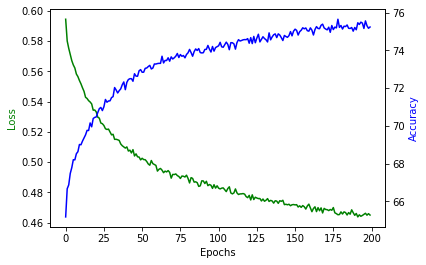

In [ ]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(losses, 'g-')
ax2.plot(accs, 'b-')

ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='g')
ax2.set_ylabel('Accuracy', color='b')

plt.show()


In [ ]:
#testdata = Data(x_test_s_pca, y_test_s.to_numpy())
testdata = Data(x_test_ssc, y_test_s.to_numpy())
testloader = torch.utils.data.DataLoader(testdata, batch_size=1, num_workers=2)

In [ ]:
nn_s.eval()
predictions = []
probs = []
with torch.no_grad():
  for data in testloader:
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    prob = torch.sigmoid(nn_s(inputs))
    outputs = torch.round(prob)
    #labels == outputs.mean() = torch.round(outputs)
    predictions.append(outputs.cpu().numpy())
    probs.append(prob)
predictions = [a.squeeze().tolist() for a in predictions]
probs = [p.squeeze().tolist() for p in probs]
#print(f'Accuracy of the network on the {len(testdata)} test data: {100 * correct // total} %')

Confusion Matrix



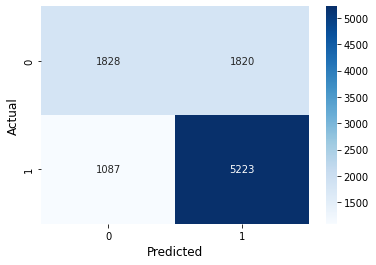


Classification Metrics

              precision    recall  f1-score   support

           0       0.63      0.50      0.56      3648
           1       0.74      0.83      0.78      6310

    accuracy                           0.71      9958
   macro avg       0.68      0.66      0.67      9958
weighted avg       0.70      0.71      0.70      9958



In [ ]:
# Calculate and plot confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
nn_matrix = confusion_matrix(y_test_s, predictions)

print("Confusion Matrix\n")
sns.heatmap(nn_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual',fontsize=12)
plt.show()

# Report classification metrics
nn_report = classification_report(y_test_s, predictions)

print("\nClassification Metrics\n")
print(nn_report)

In [ ]:
probs_arr = np.array([[1-p, p] for p in probs])

In [ ]:
probs
get_sample(5, x_test_s, y_test_s, predictions, probs_arr)

dealno   dealsize  dealstatus  dealsizestatus  raisedtodate  \
40917     2.0   2.000000           0               0      2.000000   
46247     1.0   0.772632           0               0      0.772632   
24097     1.0   8.000000           0               0      8.000000   
46035     3.0  10.693670           0               0     28.476392   
1785      1.0   3.000000           0               0      3.000000   

       totalinvestedcapital  dealtype2  addon  financingstatus  investors  \
40917              2.000000          4      0                8        8.0   
46247              0.772632          4      0                8        2.0   
24097              8.000000          2      0                8        2.0   
46035             10.693670          7      0                8        8.0   
1785               3.000000          5      0                8        2.0   

       ...  fundtype_Restructuring/Turnaround  fundtype_Secondaries  \
40917  ...                                  0                     0   
46247  ...                                  0                     0   
24097  ...                                  0                     0   
46035  ...                                  0                     0   
1785   ...                                  0                     0   

       fundtype_Venture - General  fundtype_Venture Capital - Early Stage  \
40917                           1                                       0   
46247                           1                                       0   
24097                           1                                       0   
46035                           1                                       0   
1785                            1                                       0   

       fundtype_Venture Capital - Later Stage  fundtype_Venture Debt  success  \
40917                                       0                      0        1   
46247                                       0                      0        0   
24097                                       0                      0        1   
46035                                       0                      0        1   
1785                                        0                      0        1   

       prediction  prob_fail  prob_success  
40917         1.0   0.076983      0.923017  
46247         1.0   0.426589      0.573411  
24097         1.0   0.052283      0.947717  
46035         1.0   0.007229      0.992771  
1785          0.0   0.653170      0.346830  

[5 rows x 103 columns]

## Regression: Predict the next deal size
For each of the models below
- Random Forest (highest R square)
- AdaBoost
- Gradient Boosting

can check
- R square of train/test data
- MAE, MSE, RMSE
- feature importance
- test data samples

In [ ]:
# drop the last deals
temp = labeled_train.dropna(subset=['follow_dealsize'])
train_ds = temp[temp['follow_dealsize'] != 'None']
feat_cols = [c for c in train_ds.columns if c not in pred_cols]
features = train_ds[feat_cols]
follow_dealsize = train_ds['follow_dealsize'].astype('float')

# spit train/test set for follow_dealsize
x_train_ds, x_test_ds, y_train_ds, y_test_ds = train_test_split(features, follow_dealsize, test_size=0.2, random_state=42)

print("The training data used to predict the next deal size contains {} rows and {} columns".format(features.shape[0], features.shape[1]))

The training data used to predict the next deal size contains 20574 rows and 99 columns


### Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

params = {
    "n_estimators": [50, 100, 200],
    "max_depth": [80, 160, 320]
}
rf_gs = GridSearchCV(estimator=RandomForestRegressor(), param_grid=params, n_jobs=-1, cv=3).fit(x_train_ds, y_train_ds)

print("The best parameters are {}".format(rf_gs.best_params_))

/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



The best parameters are {'max_depth': 160, 'n_estimators': 100}


The R-square of train data is 0.9643183981398938
The R-square of test data is 0.6305866963518163
The MAE is 4.5599864719101175
The MSE is 578.4684642753091
The RMSE is 24.0513713595568


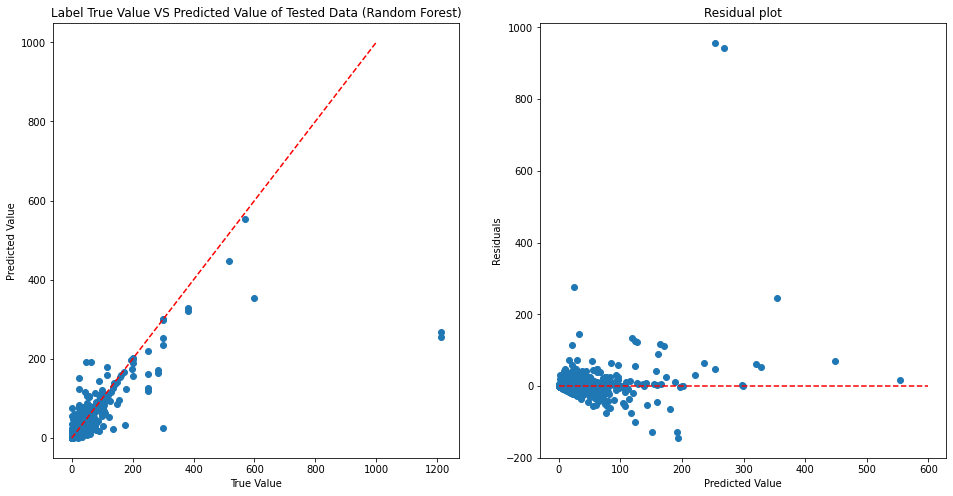

In [ ]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
y_pred_ds = rf_gs.best_estimator_.predict(x_test_ds)

print("The R-square of train data is {}".format(rf_gs.score(x_train_ds, y_train_ds)))
print("The R-square of test data is {}".format(rf_gs.score(x_test_ds, y_test_ds)))
# Different error measures
print("The MAE is {}".format(mean_absolute_error(y_test_ds, y_pred_ds)))
print("The MSE is {}".format(mean_squared_error(y_test_ds, y_pred_ds)))
print("The RMSE is {}".format(np.sqrt(mean_squared_error(y_test_ds, y_pred_ds))))

# Plot test label and prediction result
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
ax1.scatter(y_test_ds, y_pred_ds)
ax1.set_title('Label True Value VS Predicted Value of Tested Data (Random Forest)')
ax1.set_xlabel('True Value')
ax1.set_ylabel('Predicted Value')
# Add y = x to the plot 
x_comp =[x for x in range(0, 1000)]
y_comp = x_comp
ax1.plot(x_comp, y_comp, color='r', ls = '--')

# Residual plot
residuals = y_test_ds-y_pred_ds
ax2.scatter(y_pred_ds,residuals)
ax2.set_xlabel("Predicted Value")
ax2.set_ylabel("Residuals")
ax2.set_title("Residual plot")
x_comp =[x for x in range(0,600)]
y_comp = [0 for x in x_comp]
ax2.plot(x_comp, y_comp, color='r', ls = '--')
plt.show()


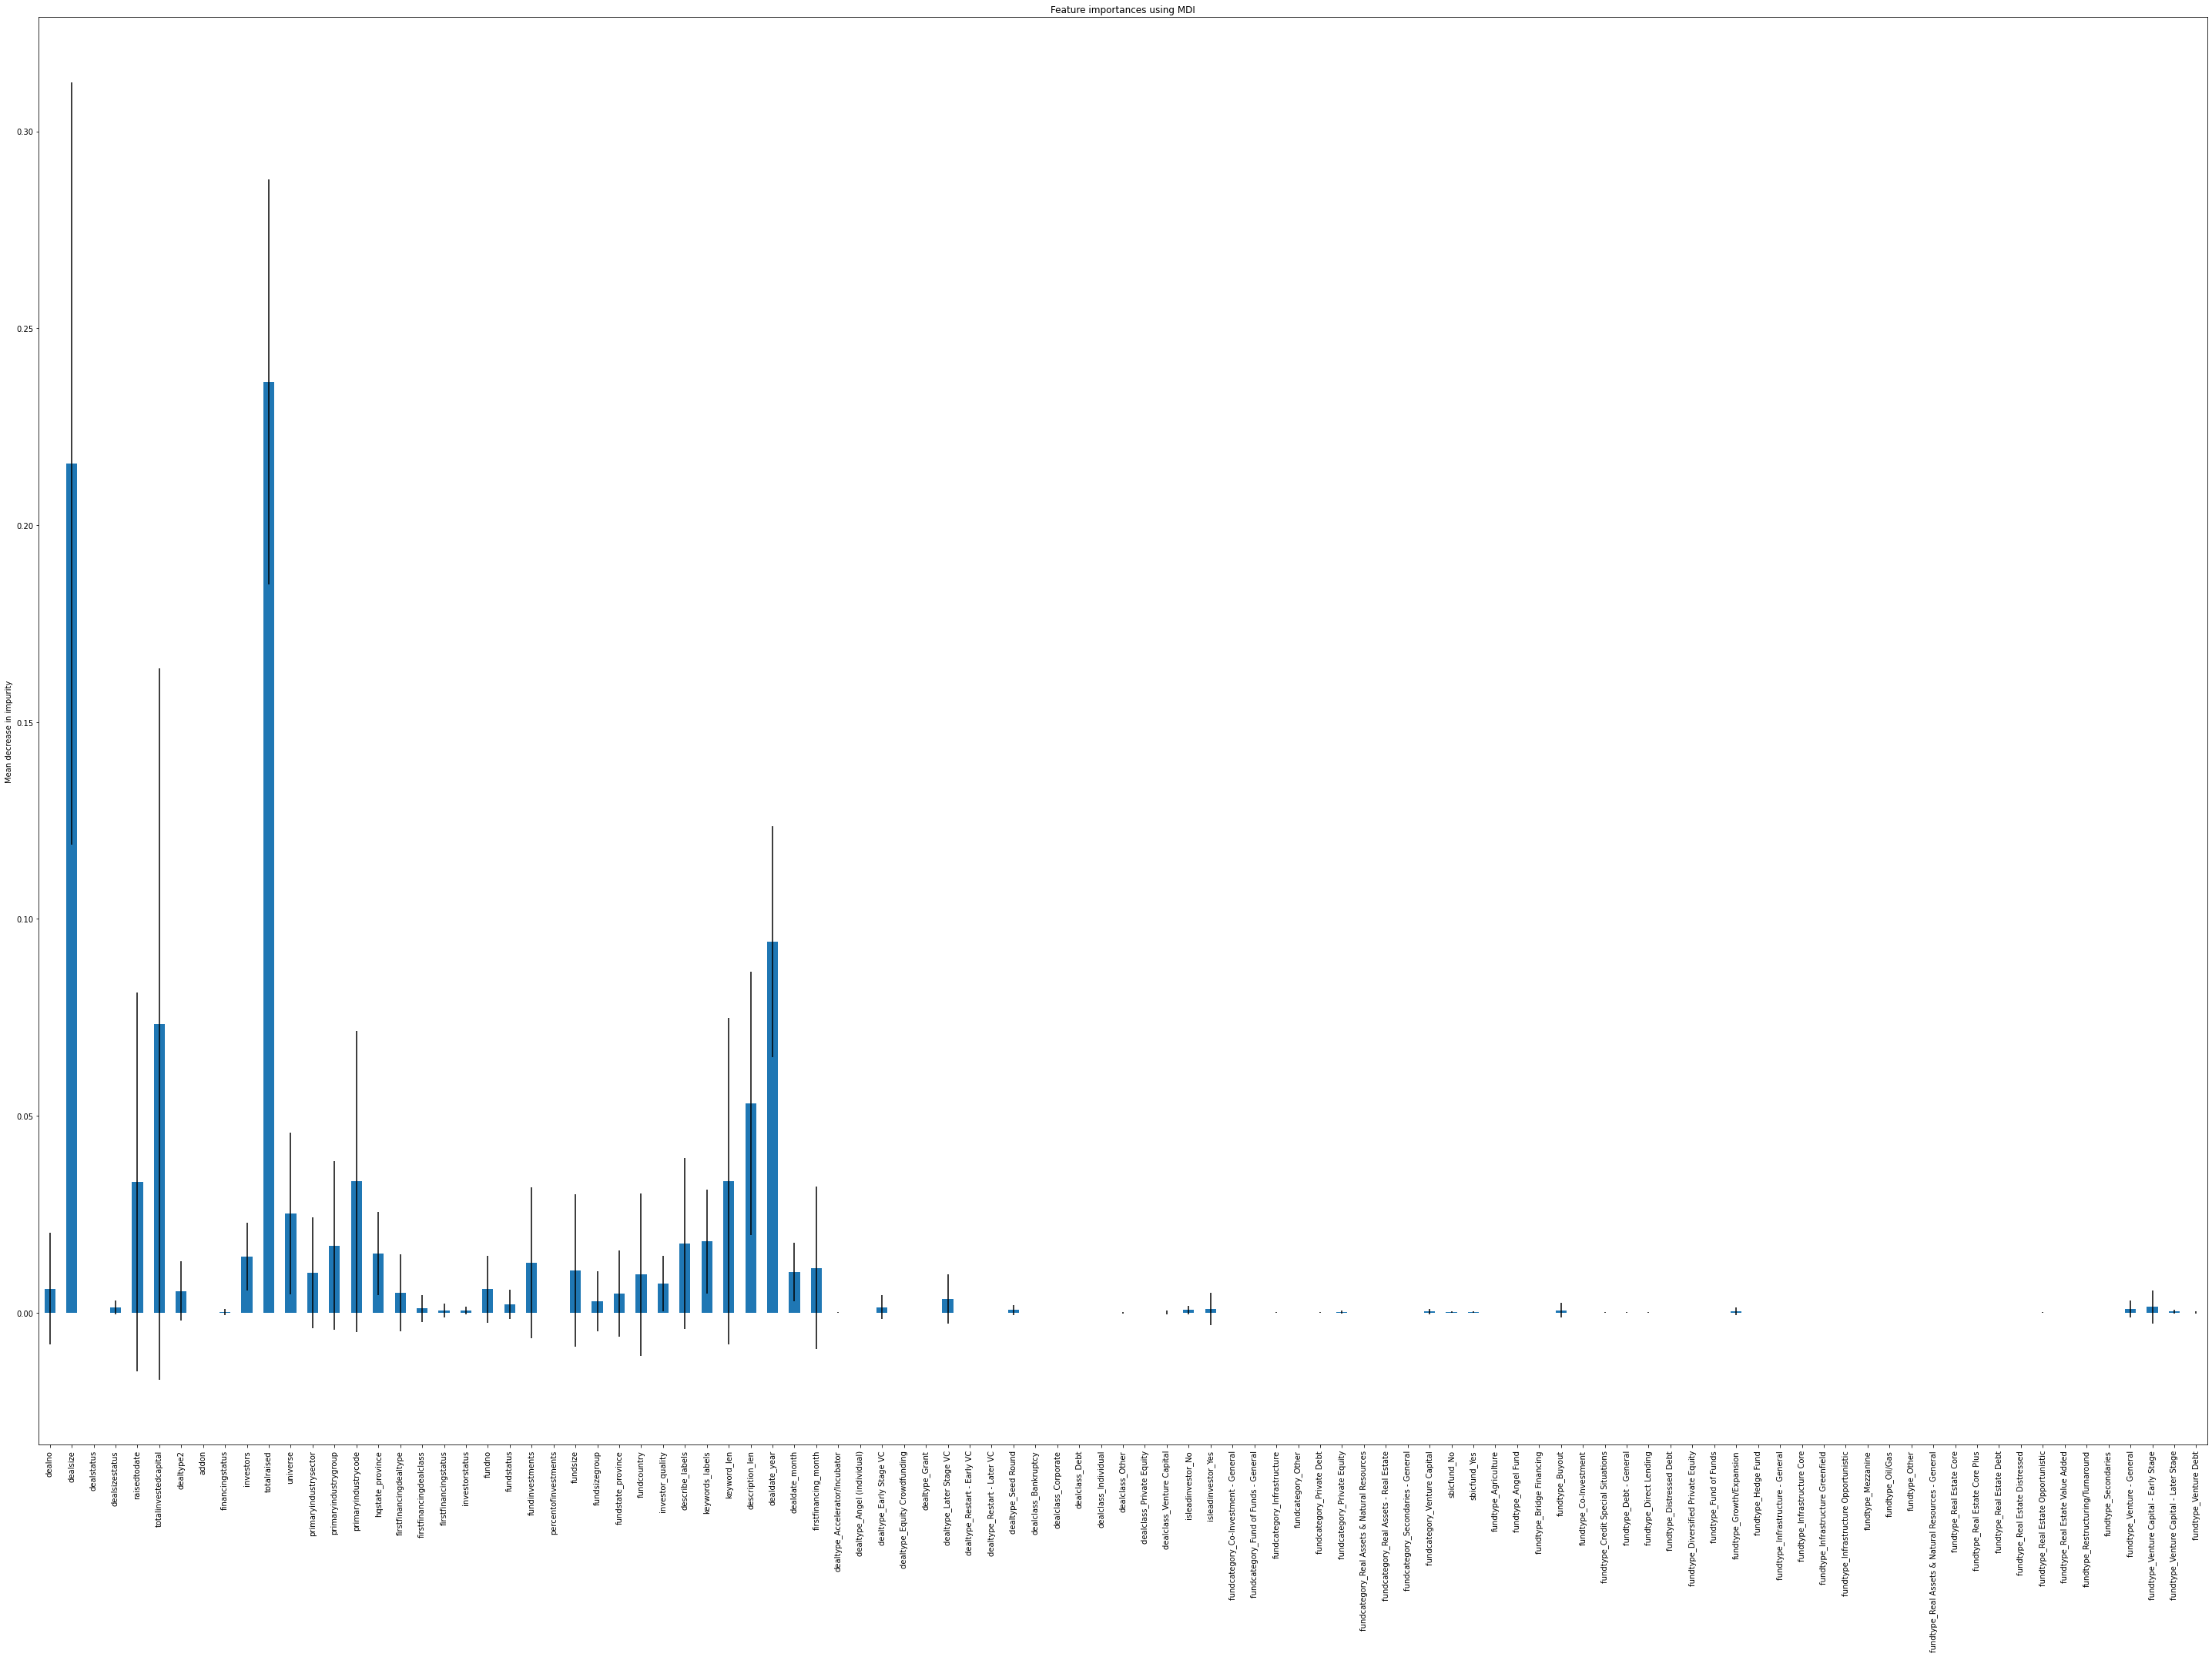

In [ ]:
importances = rf_gs.best_estimator_.feature_importances_
# calculate standard deviation of feature importances
std = np.std([tree.feature_importances_ for tree in rf_gs.best_estimator_.estimators_], axis=0)
forest_importances = pd.Series(importances, index=x_train_ds.columns)

fig, ax = plt.subplots(figsize=(40,30))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

importance               feature
10    0.236355           totalraised
1     0.215697              dealsize
33    0.094227         dealdate_year
5     0.073275  totalinvestedcapital
32    0.053147       description_len
31    0.033400           keyword_len
14    0.033390   primaryindustrycode
4     0.033200          raisedtodate
11    0.025148              universe
30    0.018059       keywords_labels
29    0.017568       describe_labels
13    0.017049  primaryindustrygroup
15    0.015026      hqstate_province
9     0.014244             investors
22    0.012607       fundinvestments

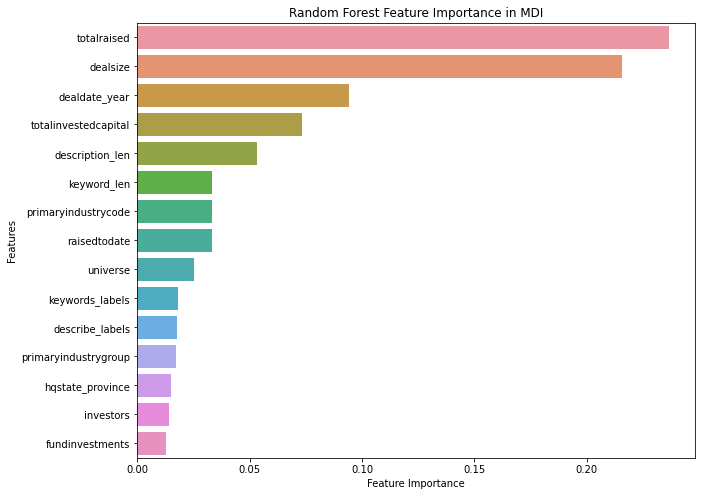

In [ ]:
check_top(importances, x_train_ds, 15)

Test Data Sample

In [ ]:
get_sample(5, x_test_ds, y_test_ds, y_pred_ds, [])

dealno   dealsize  dealstatus  dealsizestatus  raisedtodate  \
16604     1.0  55.000000           0               0     55.000000   
16917     1.0   3.000000           0               0      3.000000   
15526     1.0  27.301906           0               0     27.301906   
4443      1.0   0.345880           0               0      0.345880   
18547     1.0   3.000000           0               0      3.000000   

       totalinvestedcapital  dealtype2  addon  financingstatus  investors  \
16604             55.000000          5      0                8        7.0   
16917              3.000000          4      0                8        4.0   
15526             27.301906          5      0                8        6.0   
4443               0.345880          4      0                8        2.0   
18547              3.000000          5      0                8        3.0   

       ...  fundtype_Real Estate Opportunistic  \
16604  ...                                   0   
16917  ...                                   0   
15526  ...                                   0   
4443   ...                                   0   
18547  ...                                   0   

       fundtype_Real Estate Value Added  fundtype_Restructuring/Turnaround  \
16604                                 0                                  0   
16917                                 0                                  0   
15526                                 0                                  0   
4443                                  0                                  0   
18547                                 0                                  0   

       fundtype_Secondaries  fundtype_Venture - General  \
16604                     0                           0   
16917                     0                           1   
15526                     0                           1   
4443                      0                           1   
18547                     0                           1   

       fundtype_Venture Capital - Early Stage  \
16604                                       1   
16917                                       0   
15526                                       0   
4443                                        0   
18547                                       0   

       fundtype_Venture Capital - Later Stage  fundtype_Venture Debt  \
16604                                       0                      0   
16917                                       0                      0   
15526                                       0                      0   
4443                                        0                      0   
18547                                       0                      0   

       follow_dealsize  prediction  
16604        12.500000   18.238536  
16917         2.500000    2.412634  
15526         6.533458    7.058983  
4443          3.224101    4.200025  
18547         5.162000    6.172137  

[5 rows x 101 columns]

### AdaBoost Regression

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
params = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 1]
}
abc_gs = GridSearchCV(estimator=AdaBoostRegressor(), param_grid=params, n_jobs=-1, cv=3).fit(x_train_ds, y_train_ds)

print("The best parameters are {}".format(abc_gs.best_params_))

The best parameters are {'learning_rate': 0.01, 'n_estimators': 200}


The R-square of train data is 0.603774455339487
The R-square of test data is 0.5545100251584996
The MAE is 9.702123774350351
The MSE is 697.5977828942378
The RMSE is 26.41207645934408


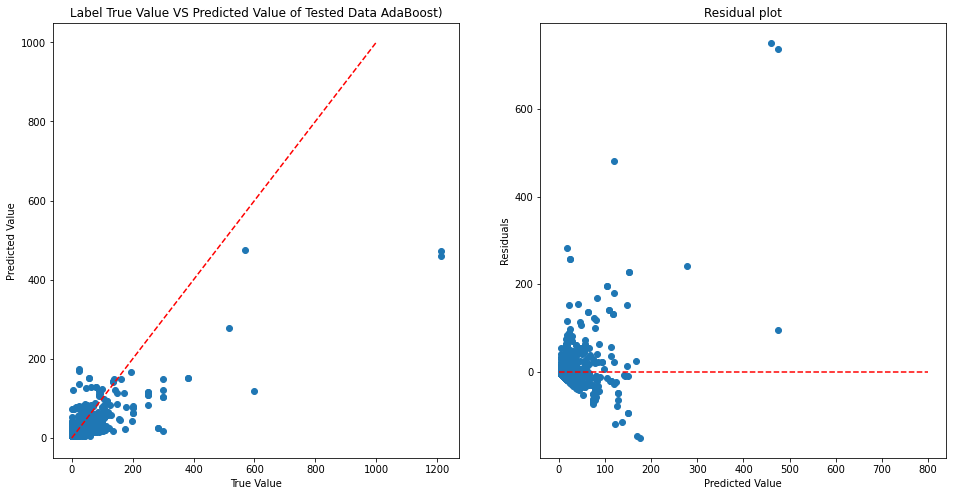

In [ ]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
y_pred_ds = abc_gs.best_estimator_.predict(x_test_ds)
print("The R-square of train data is {}".format(abc_gs.score(x_train_ds, y_train_ds)))
print("The R-square of test data is {}".format(abc_gs.score(x_test_ds, y_test_ds)))
# Different error measures
print("The MAE is {}".format(mean_absolute_error(y_test_ds, y_pred_ds)))
print("The MSE is {}".format(mean_squared_error(y_test_ds, y_pred_ds)))
print("The RMSE is {}".format(np.sqrt(mean_squared_error(y_test_ds, y_pred_ds))))

# Plot test label and prediction result
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
ax1.scatter(y_test_ds, y_pred_ds)
ax1.set_title('Label True Value VS Predicted Value of Tested Data AdaBoost)')
ax1.set_xlabel('True Value')
ax1.set_ylabel('Predicted Value')
# Add y = x to the plot 
x_comp =[x for x in range(0,1000)]
y_comp = x_comp
ax1.plot(x_comp, y_comp, color='r', ls = '--')

# Residual plot
residuals = y_test_ds-y_pred_ds
ax2.scatter(y_pred_ds,residuals)
ax2.set_xlabel("Predicted Value")
ax2.set_ylabel("Residuals")
ax2.set_title("Residual plot")
x_comp =[x for x in range(0,800)]
y_comp = [0 for x in x_comp]
ax2.plot(x_comp, y_comp, color='r', ls = '--')
plt.show()


Test Data Sample

In [ ]:
get_sample(5, x_test_ds, y_test_ds, y_pred_ds, [])

dealno     dealsize  dealstatus  dealsizestatus  raisedtodate  \
17421     1.0  1412.180000           0               0   1412.180000   
19682     1.0     6.000000           0               0      6.000000   
1547      1.0     5.700001           0               0      5.700001   
13544     1.0     0.250000           0               0      0.250000   
3333      1.0     2.011011           0               0      2.011011   

       totalinvestedcapital  dealtype2  addon  financingstatus  investors  \
17421           1412.180000          5      0                8        5.0   
19682              6.000000          5      0                8       10.0   
1547               5.700001          4      0                8        6.0   
13544              0.250000          5      0                8        2.0   
3333               2.011011          5      0                8        6.0   

       ...  fundtype_Real Estate Opportunistic  \
17421  ...                                   0   
19682  ...                                   0   
1547   ...                                   0   
13544  ...                                   0   
3333   ...                                   0   

       fundtype_Real Estate Value Added  fundtype_Restructuring/Turnaround  \
17421                                 0                                  0   
19682                                 0                                  0   
1547                                  0                                  0   
13544                                 0                                  0   
3333                                  0                                  0   

       fundtype_Secondaries  fundtype_Venture - General  \
17421                     0                           0   
19682                     0                           0   
1547                      0                           1   
13544                     0                           1   
3333                      0                           1   

       fundtype_Venture Capital - Early Stage  \
17421                                       0   
19682                                       1   
1547                                        0   
13544                                       0   
3333                                        0   

       fundtype_Venture Capital - Later Stage  fundtype_Venture Debt  \
17421                                       0                      0   
19682                                       0                      0   
1547                                        0                      0   
13544                                       0                      0   
3333                                        0                      0   

       follow_dealsize  prediction  
17421        24.316800  175.491105  
19682         4.500000   15.977028  
1547          1.499999    8.729170  
13544         4.999979    5.573996  
3333          3.999983    5.383742  

[5 rows x 101 columns]

### Gradient Boosting Regression

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200), "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 1]}
gb_gs = GridSearchCV(estimator = GradientBoostingRegressor(max_features='sqrt'), 
param_grid = param_test2 ,n_jobs=-1, cv=3)
gb_gs.fit(x_train_ds,y_train_ds)
print("The best parameters are {}".format(gb_gs.best_params_))

The best parameters are {'learning_rate': 0.1, 'max_depth': 15, 'min_samples_split': 200, 'n_estimators': 200}


The R-square of train data is 0.9629286695045436
The R-square of test data is 0.5961550713955541
The MAE is 6.325920612788978
The MSE is 632.3853346593847
The RMSE is 25.14727290700494


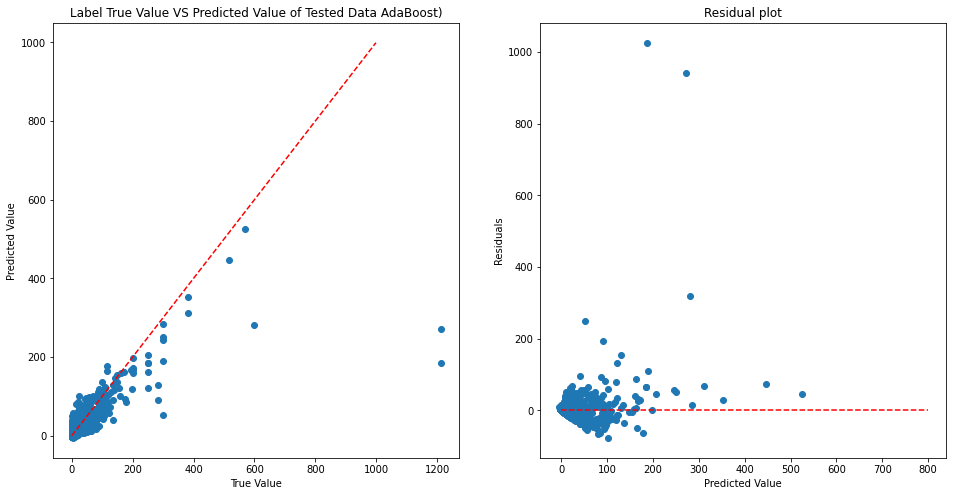

In [ ]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
y_pred_ds = gb_gs.best_estimator_.predict(x_test_ds)
print("The R-square of train data is {}".format(gb_gs.score(x_train_ds, y_train_ds)))
print("The R-square of test data is {}".format(gb_gs.score(x_test_ds, y_test_ds)))
#Different error measures
print("The MAE is {}".format(mean_absolute_error(y_test_ds, y_pred_ds)))
print("The MSE is {}".format(mean_squared_error(y_test_ds, y_pred_ds)))
print("The RMSE is {}".format(np.sqrt(mean_squared_error(y_test_ds, y_pred_ds))))

# Plot test label and prediction result
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
ax1.scatter(y_test_ds, y_pred_ds)
ax1.set_title('Label True Value VS Predicted Value of Tested Data AdaBoost)')
ax1.set_xlabel('True Value')
ax1.set_ylabel('Predicted Value')
# Add y = x to the plot 
x_comp =[x for x in range(0,1000)]
y_comp = x_comp
ax1.plot(x_comp, y_comp, color='r', ls = '--')

# Residual plot
residuals = y_test_ds-y_pred_ds
ax2.scatter(y_pred_ds,residuals)
ax2.set_xlabel("Predicted Value")
ax2.set_ylabel("Residuals")
ax2.set_title("Residual plot")
x_comp =[x for x in range(0,800)]
y_comp = [0 for x in x_comp]
ax2.plot(x_comp, y_comp, color='r', ls = '--')
plt.show()

Test Data Sample

In [ ]:
get_sample(5, x_test_ds, y_test_ds, y_pred_ds, [])

dealno   dealsize  dealstatus  dealsizestatus  raisedtodate  \
8846      1.0   1.002696           0               0      1.002696   
29704     1.0   4.000000           0               0      4.000000   
2506      1.0   1.450001           0               0      1.450001   
21254     1.0  25.750000           0               0     25.750000   
11478     1.0   5.000000           0               0      5.000000   

       totalinvestedcapital  dealtype2  addon  financingstatus  investors  \
8846               1.002696          5      0                8        4.0   
29704              4.000000          5      0                8        2.0   
2506               1.450001          4      0                8        9.0   
21254             25.750000          5      0                8        6.0   
11478              5.000000          5      0                8        7.0   

       ...  fundtype_Real Estate Opportunistic  \
8846   ...                                   0   
29704  ...                                   0   
2506   ...                                   0   
21254  ...                                   0   
11478  ...                                   0   

       fundtype_Real Estate Value Added  fundtype_Restructuring/Turnaround  \
8846                                  0                                  0   
29704                                 0                                  0   
2506                                  0                                  0   
21254                                 0                                  0   
11478                                 0                                  0   

       fundtype_Secondaries  fundtype_Venture - General  \
8846                      0                           1   
29704                     0                           0   
2506                      0                           0   
21254                     0                           1   
11478                     0                           0   

       fundtype_Venture Capital - Early Stage  \
8846                                        0   
29704                                       1   
2506                                        1   
21254                                       0   
11478                                       1   

       fundtype_Venture Capital - Later Stage  fundtype_Venture Debt  \
8846                                        0                      0   
29704                                       0                      0   
2506                                        0                      0   
21254                                       0                      0   
11478                                       0                      0   

       follow_dealsize  prediction  
8846          0.013874    3.585092  
29704         8.000000    6.823653  
2506          1.000000    0.666601  
21254         5.535199   14.751821  
11478        15.000000   11.956137  

[5 rows x 101 columns]

## Regression: Predict months between two deals

In [ ]:
# drop the last deals
train_mb = labeled_train.dropna(subset=['months_between'])
feat_cols = [c for c in train_mb.columns if c not in pred_cols]
features = train_mb[feat_cols]
months_between = train_mb['months_between'].astype('float')

# spit train/test set for follow_dealsize
x_train_mb, x_test_mb, y_train_mb, y_test_mb = train_test_split(features, months_between, test_size=0.2, random_state=42)

print("The training data used to predict number of months between two deals contains {} rows and {} columns".format(features.shape[0], features.shape[1]))

The training data used to predict number of months between two deals contains 22488 rows and 99 columns


### Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

params = {
    "n_estimators": [100, 200, 300],
    "max_depth": [80, 160, 320],
    'min_samples_leaf': [3, 4, 5]
}
rf_gs = GridSearchCV(estimator=RandomForestRegressor(), param_grid=params, n_jobs=-1, cv=3).fit(x_train_mb, y_train_mb)

print("The best parameters are {}".format(rf_gs.best_params_))

The best parameters are {'max_depth': 160, 'min_samples_leaf': 3, 'n_estimators': 300}


The R-square of train data is 0.8562262069835138
The R-square of test data is 0.4516287545406502
The MAE is 5.492098923360149
The MSE is 59.27835129638565
The RMSE is 7.6992435535178165


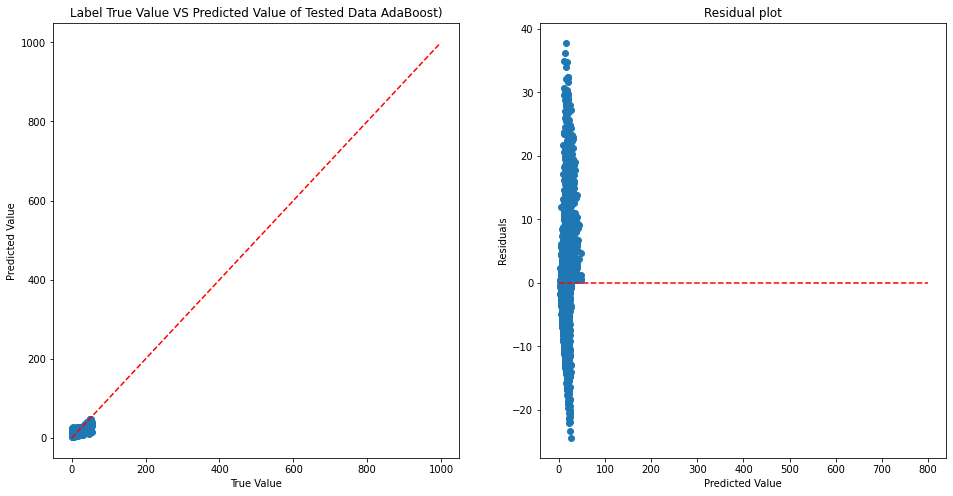

In [ ]:
y_pred_mb = rf_gs.best_estimator_.predict(x_test_mb)
print("The R-square of train data is {}".format(rf_gs.score(x_train_mb, y_train_mb)))
print("The R-square of test data is {}".format(rf_gs.score(x_test_mb, y_test_mb)))
#Different error measures
print("The MAE is {}".format(mean_absolute_error(y_test_mb, y_pred_mb)))
print("The MSE is {}".format(mean_squared_error(y_test_mb, y_pred_mb)))
print("The RMSE is {}".format(np.sqrt(mean_squared_error(y_test_mb, y_pred_mb))))

# Plot test label and prediction result
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
ax1.scatter(y_test_mb, y_pred_mb)
ax1.set_title('Label True Value VS Predicted Value of Tested Data AdaBoost)')
ax1.set_xlabel('True Value')
ax1.set_ylabel('Predicted Value')
# Add y = x to the plot 
x_comp =[x for x in range(0,1000)]
y_comp = x_comp
ax1.plot(x_comp, y_comp, color='r', ls = '--')

# Residual plot
residuals = y_test_mb-y_pred_mb
ax2.scatter(y_pred_mb,residuals)
ax2.set_xlabel("Predicted Value")
ax2.set_ylabel("Residuals")
ax2.set_title("Residual plot")
x_comp =[x for x in range(0,800)]
y_comp = [0 for x in x_comp]
ax2.plot(x_comp, y_comp, color='r', ls = '--')
plt.show()

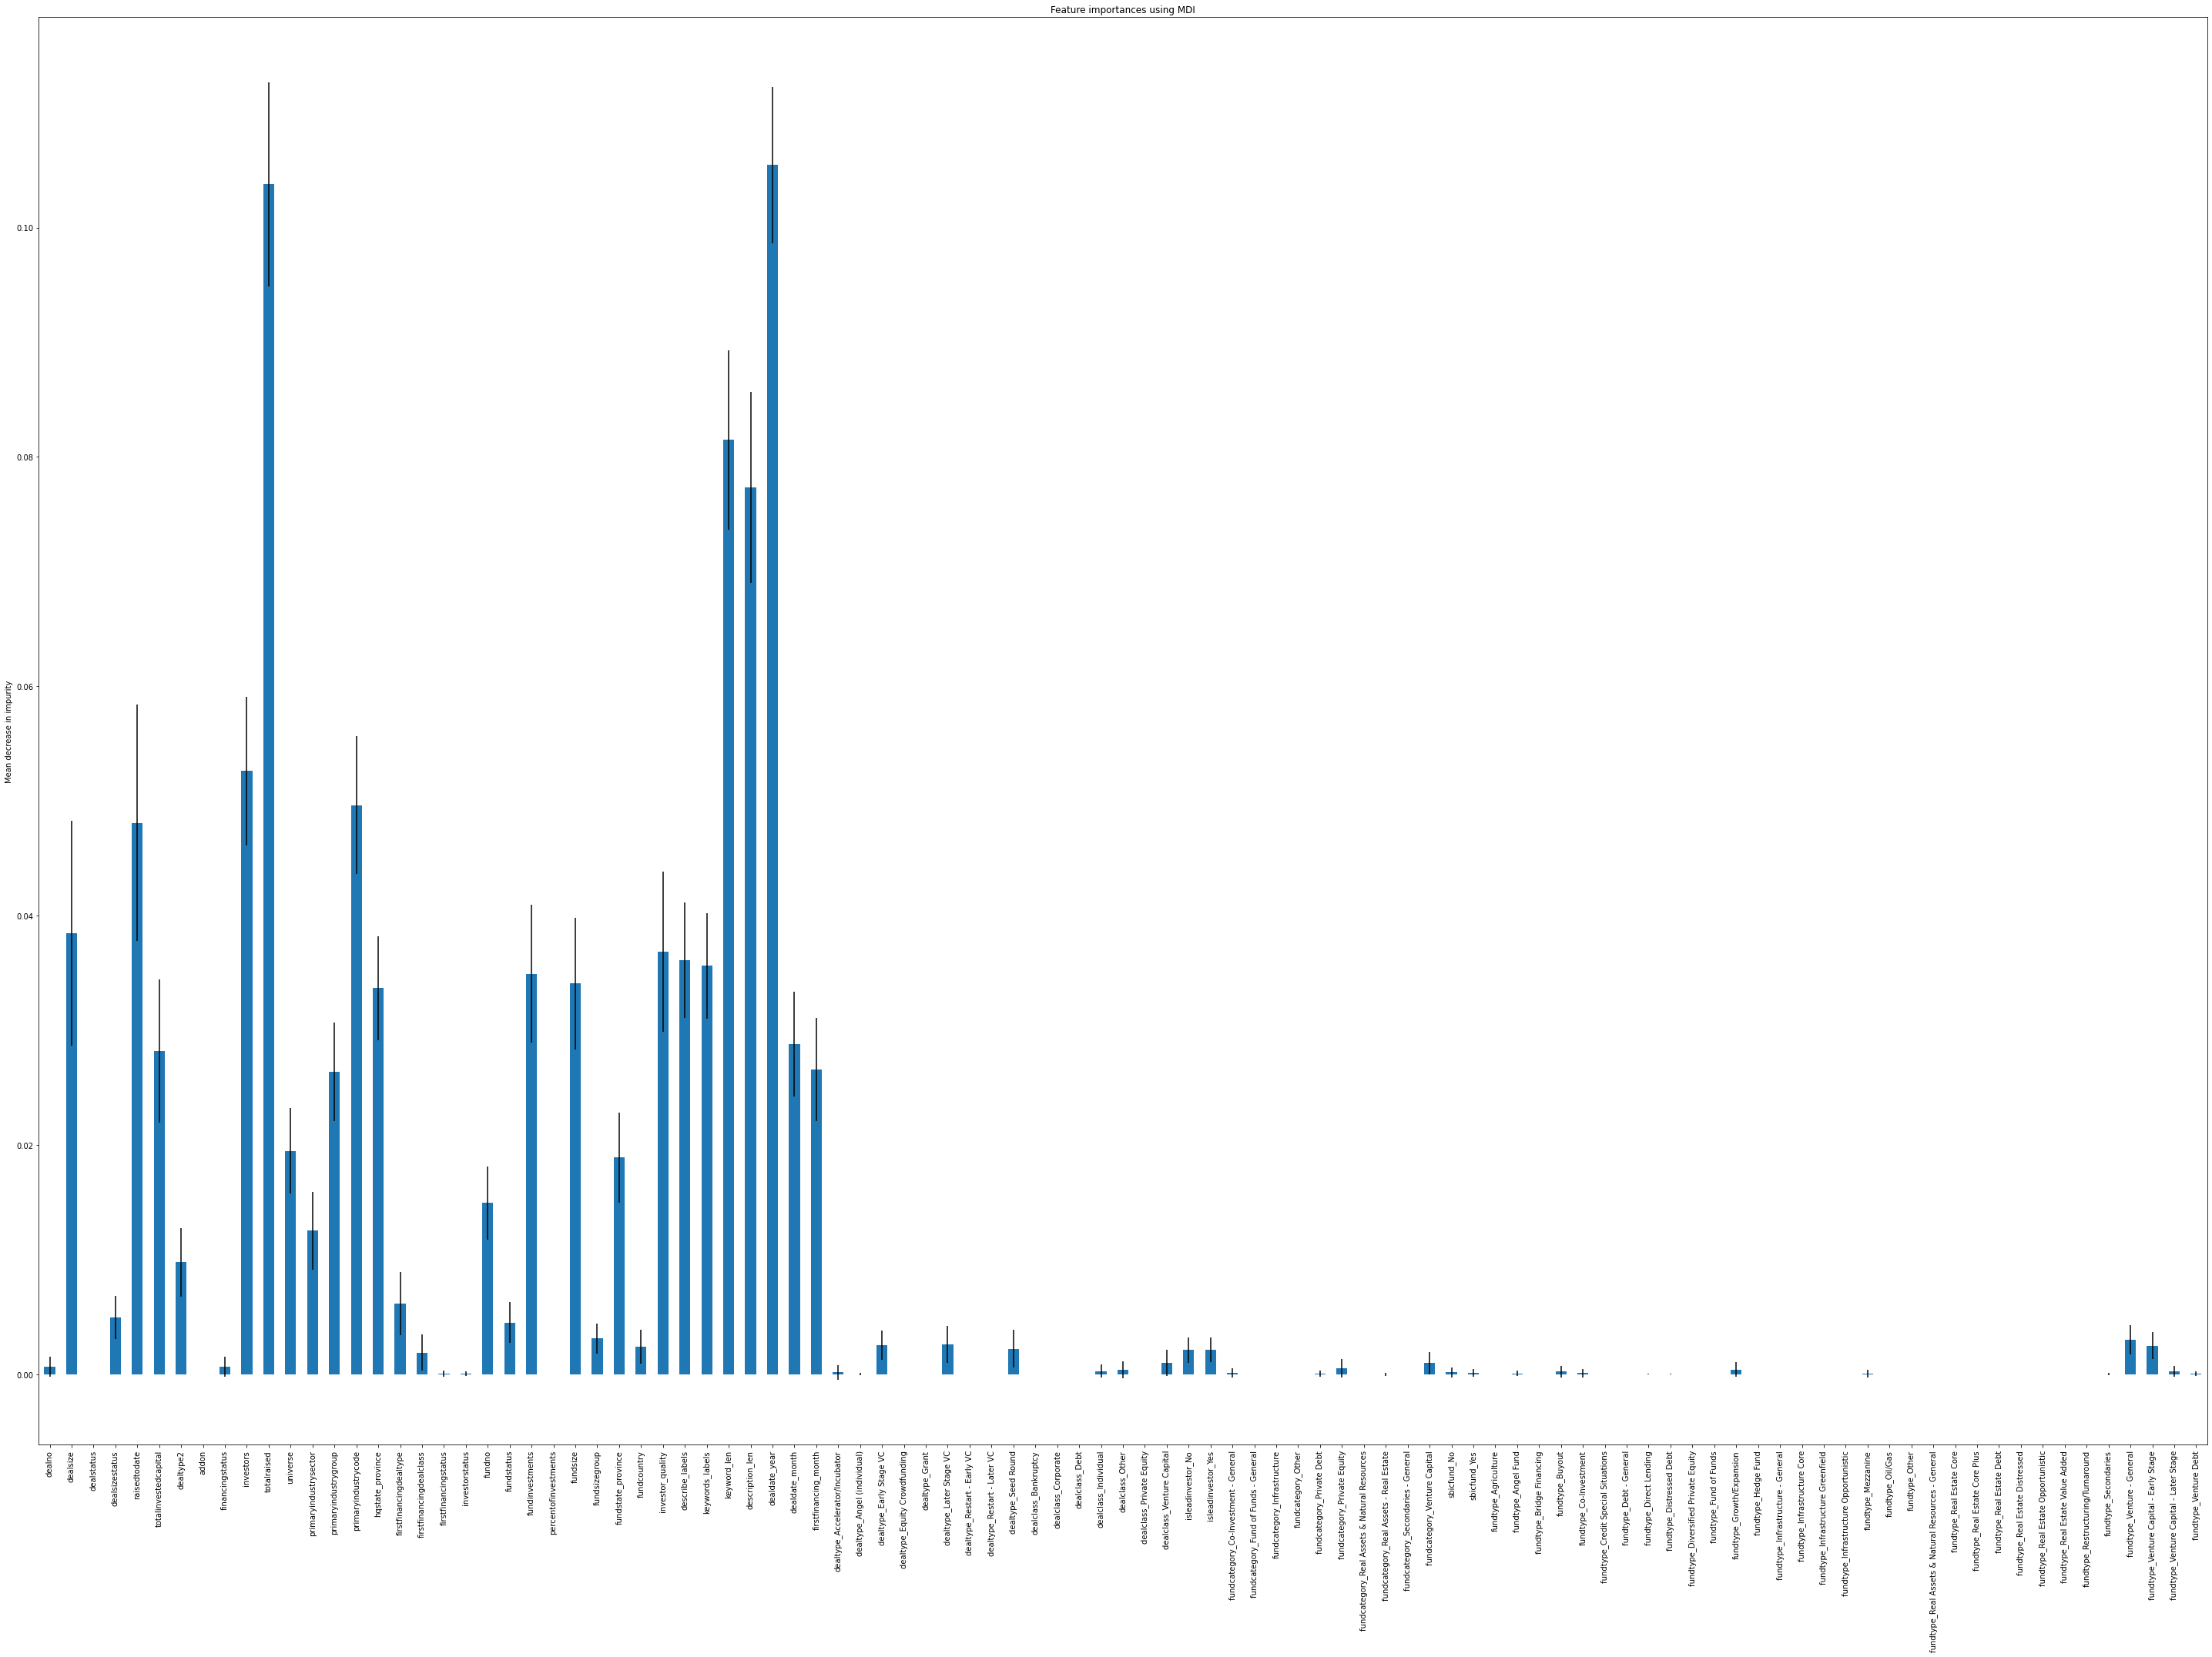

In [ ]:
importances = rf_gs.best_estimator_.feature_importances_
# calculate standard deviation of feature importances
std = np.std([tree.feature_importances_ for tree in rf_gs.best_estimator_.estimators_], axis=0)
forest_importances = pd.Series(importances, index=x_train_ds.columns)

fig, ax = plt.subplots(figsize=(40,30))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

importance              feature
33    0.105450        dealdate_year
10    0.103763          totalraised
31    0.081482          keyword_len
32    0.077344      description_len
9     0.052603            investors
14    0.049633  primaryindustrycode
4     0.048083         raisedtodate
1     0.038470             dealsize
28    0.036847     investor_quality
29    0.036118      describe_labels
30    0.035633      keywords_labels
22    0.034924      fundinvestments
24    0.034074             fundsize
15    0.033669     hqstate_province
34    0.028804       dealdate_month

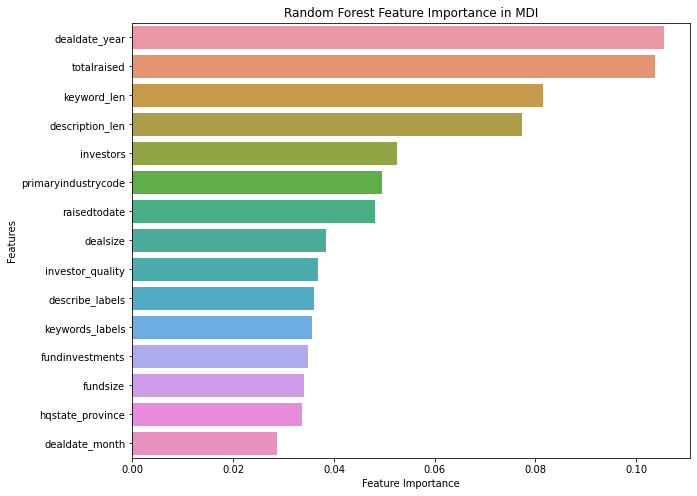

In [ ]:
check_top(importances, x_train_mb, 15)

Test Data Samples

In [ ]:
get_sample(5, x_test_mb, y_test_mb, y_pred_mb, [])

dealno    dealsize  dealstatus  dealsizestatus  raisedtodate  \
13664     1.0   20.000000           0               0     20.000000   
29276     1.0    8.169890           0               0      8.169890   
12286     1.0  200.000000           0               0    200.000000   
24371     1.0    1.094997           0               0      1.094997   
11269     1.0    1.500000           0               0      1.500000   

       totalinvestedcapital  dealtype2  addon  financingstatus  investors  \
13664             20.000000          2      0                8        1.0   
29276              8.169890          5      0                8        2.0   
12286            200.000000          5      0                8        9.0   
24371              1.094997          5      0                8       17.0   
11269              1.500000          4      0                8        6.0   

       ...  fundtype_Real Estate Opportunistic  \
13664  ...                                   0   
29276  ...                                   0   
12286  ...                                   0   
24371  ...                                   0   
11269  ...                                   0   

       fundtype_Real Estate Value Added  fundtype_Restructuring/Turnaround  \
13664                                 0                                  0   
29276                                 0                                  0   
12286                                 0                                  0   
24371                                 0                                  0   
11269                                 0                                  0   

       fundtype_Secondaries  fundtype_Venture - General  \
13664                     0                           1   
29276                     0                           1   
12286                     0                           1   
24371                     0                           1   
11269                     0                           1   

       fundtype_Venture Capital - Early Stage  \
13664                                       0   
29276                                       0   
12286                                       0   
24371                                       0   
11269                                       0   

       fundtype_Venture Capital - Later Stage  fundtype_Venture Debt  \
13664                                       0                      0   
29276                                       0                      0   
12286                                       0                      0   
24371                                       0                      0   
11269                                       0                      0   

       months_between  prediction  
13664            30.0   18.301786  
29276             3.0   19.144788  
12286            12.0   11.235731  
24371            10.0   12.930001  
11269            23.0   20.539063  

[5 rows x 101 columns]

### Gradient Boosting Regression

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200), "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 1]}
gb_gs = GridSearchCV(estimator = GradientBoostingRegressor(max_features='sqrt'), 
param_grid = param_test2 ,n_jobs=-1, cv=3)
gb_gs.fit(x_train_mb,y_train_mb)
print("The best parameters are {}".format(gb_gs.best_params_))

The best parameters are {'learning_rate': 0.1, 'max_depth': 15, 'min_samples_split': 200, 'n_estimators': 200}


The R-square of train data is 0.7979064950680272
The R-square of test data is 0.4114862374391953
The MAE is 5.862127697016237
The MSE is 63.617714912484686
The RMSE is 7.976071395899405


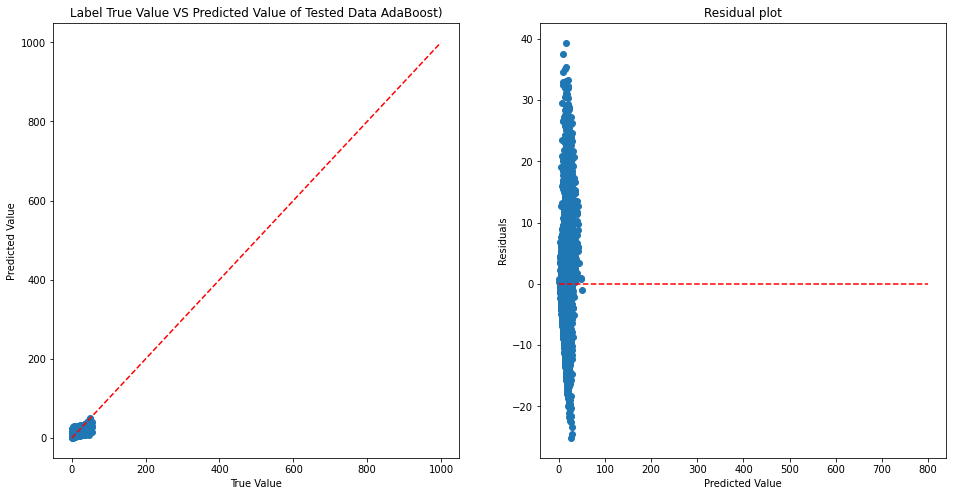

In [ ]:
y_pred_mb = gb_gs.best_estimator_.predict(x_test_mb)
print("The R-square of train data is {}".format(gb_gs.score(x_train_mb, y_train_mb)))
print("The R-square of test data is {}".format(gb_gs.score(x_test_mb, y_test_mb)))
#Different error measures
print("The MAE is {}".format(mean_absolute_error(y_test_mb, y_pred_mb)))
print("The MSE is {}".format(mean_squared_error(y_test_mb, y_pred_mb)))
print("The RMSE is {}".format(np.sqrt(mean_squared_error(y_test_mb, y_pred_mb))))

# Plot test label and prediction result
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
ax1.scatter(y_test_mb, y_pred_mb)
ax1.set_title('Label True Value VS Predicted Value of Tested Data AdaBoost)')
ax1.set_xlabel('True Value')
ax1.set_ylabel('Predicted Value')
# Add y = x to the plot 
x_comp =[x for x in range(0,1000)]
y_comp = x_comp
ax1.plot(x_comp, y_comp, color='r', ls = '--')

# Residual plot
residuals = y_test_mb-y_pred_mb
ax2.scatter(y_pred_mb,residuals)
ax2.set_xlabel("Predicted Value")
ax2.set_ylabel("Residuals")
ax2.set_title("Residual plot")
x_comp =[x for x in range(0,800)]
y_comp = [0 for x in x_comp]
ax2.plot(x_comp, y_comp, color='r', ls = '--')
plt.show()

# References

[1] https://medium.com/mlearning-ai/text-clustering-with-tf-idf-in-python-c94cd26a31e7

[2] https://scikit-learn.org/stable/auto_examples/decomposition/plot_incremental_pca.html